# Project Directory Structure

In [2]:
# Create project directory structure 
!mkdir data
!mkdir data\raw
!mkdir data\processed
!mkdir data\synthetic
!mkdir notebooks
!mkdir src
!mkdir docs
!mkdir docs\technical
!mkdir docs\business
!mkdir dashboard

### Initialize git repository

In [5]:
!git init

Initialized empty Git repository in C:/Users/Obaidullah/Videos/AML/.git/


### create readme.md

In [8]:
%%writefile README.md
# Investment Banking AML Detection System

## Overview
This project implements an advanced Anti-Money Laundering (AML) detection system focused on the investment banking sector. It uses data analytics and machine learning to identify suspicious patterns related to:

- Trade-Based Money Laundering (TBML)
- Casino-based money laundering schemes
- Complex financing and leasing arrangements

## Project Structure
- `notebooks/`: Jupyter notebooks for analysis and model development
- `data/`: Financial transaction datasets and synthetic patterns
- `src/`: Supporting Python modules
- `dashboard/`: Interactive visualization dashboard
- `docs/`: Technical and business documentation

## Getting Started
1. Clone this repository
2. Install requirements: `pip install -r requirements.txt`
3. Run notebooks in sequence starting with `01_data_preparation.ipynb`

## Features
- Transaction anomaly detection
- Network analysis of financial relationships
- Risk scoring system
- Interactive visualization dashboard
- Narrative-driven case studies

## Technologies
- Python, Pandas, Scikit-learn
- NetworkX for relationship analysis
- Plotly & Dash for visualization
- Jupyter Notebooks for development

Writing README.md


### Requirements

In [11]:
%%writefile requirements.txt
pandas==2.0.0
numpy==1.24.3
scikit-learn==1.2.2
matplotlib==3.7.1
seaborn==0.12.2
plotly==5.14.1
dash==2.9.3
networkx==3.1
jupyter==1.0.0
nbformat>=5.7.0

Writing requirements.txt


### Create .gitignore file

In [14]:
%%writefile .gitignore
# Python
__pycache__/
*.py[cod]
*$py.class
*.so
.Python
env/
build/
develop-eggs/
dist/
downloads/
eggs/
.eggs/
lib/
lib64/
parts/
sdist/
var/
*.egg-info/
.installed.cfg
*.egg

# Jupyter Notebook
.ipynb_checkpoints

# Virtual Environment
venv/
ENV/

# Data files
data/raw/*.csv
data/raw/*.xlsx
data/processed/*.csv
data/synthetic/*.csv
*.csv
*.xlsx
*.parquet

# Credentials
.env
config.ini
*credentials*

# OS specific
.DS_Store
Thumbs.db

Writing .gitignore


# AML Detection System: Data Preparation

This notebook covers Phase 1 of our AML Detection System project focused on investment banking, including:

1. Data acquisition from public sources
2. Exploratory data analysis
3. Synthetic data generation for money laundering patterns

## Project Overview

We're building a sophisticated AML detection system for investment banking that uncovers advanced money laundering schemes through visualization and narrative-driven insights. The system will focus on detecting patterns like Trade-Based Money Laundering (TBML), casino exploitation, and complex financing arrangement"""

## Setup and Dependencies

First, we'll install and import all the necessary libraries for our analysis.

# Install required packages

In [22]:
!pip install pandas numpy matplotlib seaborn scikit-learn networkx requests plotly

Now let's import all the libraries we'll need for data acquisition and processing.

# Import libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import os
import random
from datetime import datetime, timedelta
import networkx as nx
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go

# Set random seed for reproducibility

In [29]:
np.random.seed(42)
random.seed(42)

# Configure visualizations

In [32]:
plt.style.use('ggplot')
sns.set(style="whitegrid")
%matplotlib inline

### Create Directory Structure

We'll create the necessary directory structure for our project to store the data we'll be working with.

In [52]:
# Get the current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Create necessary directories with absolute paths
data_dir = os.path.join(current_dir, 'data')
raw_dir = os.path.join(data_dir, 'raw')
processed_dir = os.path.join(data_dir, 'processed')
synthetic_dir = os.path.join(data_dir, 'synthetic')

os.makedirs(raw_dir, exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)
os.makedirs(synthetic_dir, exist_ok=True)

print(f"Created directories:")
print(f"- Raw data: {raw_dir}")
print(f"- Processed data: {processed_dir}")
print(f"- Synthetic data: {synthetic_dir}")

Current working directory: C:\Users\Obaidullah\Videos\AML
Created directories:
- Raw data: C:\Users\Obaidullah\Videos\AML\data\raw
- Processed data: C:\Users\Obaidullah\Videos\AML\data\processed
- Synthetic data: C:\Users\Obaidullah\Videos\AML\data\synthetic


## 1. Data Acquisition

In this section, we'll acquire financial transaction data from public sources, particularly focusing on FINTRAC (Financial Transactions and Reports Analysis Centre of Canada) data.

### 1.1 Download Function for FINTRAC Data

First, we'll define a function to download data from the Open Government Portal. This function will:
- Check if the file already exists locally
- Download the file if it doesn't exist
- Return the data as a DataFrame

In [40]:
def download_fintrac_data(url, save_path):
    """
    Downloads FINTRAC data from the specified URL and saves it to the given path.
    
    Args:
        url (str): URL to download the data from
        save_path (str): Path where the data will be saved
    
    Returns:
        pandas.DataFrame: The downloaded data as a DataFrame
    """
    # Check if file already exists
    if os.path.exists(save_path):
        print(f"Loading existing file from {save_path}")
        return pd.read_csv(save_path)
    
    # Download the file
    print(f"Downloading data from {url}")
    response = requests.get(url)
    
    if response.status_code == 200:
        # Save the file
        with open(save_path, 'wb') as f:
            f.write(response.content)
        print(f"Data saved to {save_path}")
        
        # Return the data as a DataFrame
        return pd.read_csv(save_path)
    else:
        print(f"Failed to download data: {response.status_code}")
        return None

### 1.2 Download FINTRAC Data

Now we'll download two key FINTRAC datasets:
1. Suspicious Transaction Reports
2. Large Cash Transaction Reports

Note: The URLs below are placeholders and would need to be replaced with actual URLs from the Open Government Portal in a real implementn.
"""

In [44]:
# URLs for FINTRAC data (example URLs - replace with actual FINTRAC data URLs)
fintrac_suspicious_transactions_url = "https://open.canada.ca/data/dataset/5e756e0c-d254-49d6-9813-a82c61b762dc/resource/f3bcc5db-68e2-454a-82a8-73bdfd99ef4e/download/fintrac-suspicious-transaction-reports.csv"
fintrac_large_cash_transactions_url = "https://open.canada.ca/data/dataset/5e756e0c-d254-49d6-9813-a82c61b762dc/resource/bafaaf6a-5b0c-4eef-9652-cad254b8d6a9/download/fintrac-large-cash-transaction-reports.csv"

# Attempt to download the data
try:
    suspicious_transactions_df = download_fintrac_data(
        fintrac_suspicious_transactions_url, 
        '../data/raw/fintrac_suspicious_transactions.csv'
    )

    large_cash_transactions_df = download_fintrac_data(
        fintrac_large_cash_transactions_url, 
        '../data/raw/fintrac_large_cash_transactions.csv'
    )
    
    # Check if data was successfully downloaded
    if suspicious_transactions_df is not None and large_cash_transactions_df is not None:
        print("Successfully downloaded FINTRAC data!")
    else:
        print("Failed to download one or more FINTRAC datasets.")
        print("Will proceed with synthetic data generation.")
except Exception as e:
    print(f"Error downloading FINTRAC data: {e}")
    print("Will proceed with synthetic data generation.")

Failed to download data: 404
Failed to download data: 404
Failed to download one or more FINTRAC datasets.
Will proceed with synthetic data generation.


## 1.3 Generate Synthetic FINTRAC-like Data

Since the real FINTRAC data might not be accessible or might have limitations, we'll create a synthetic dataset that mimics the structure and patterns of real FINTRAC data. This is particularly useful for development and testing purposes.

Our synthetic data will include:
- Temporal information (year, month)
- Sector categories (banking, securities, etc.)
- Report types (STR, LCTR, etc.)
- Geographic information (provinces, postal codes)
- Transaction counts and amounts

First, let's define a function to generate synthetic FINTRAC-like data:

In [47]:
def generate_synthetic_fintrac_data(n_records=1000):
    """
    Generates synthetic FINTRAC-like data for suspicious transaction reports.
    
    Args:
        n_records (int): Number of records to generate
        
    Returns:
        pandas.DataFrame: DataFrame containing synthetic FINTRAC-like data
    """
    # Define possible values for categorical columns
    sectors = [
        'Banking', 'Securities Dealers', 'Money Services Businesses', 
        'Life Insurance', 'Real Estate', 'Casinos', 'Accountants', 'Notaries'
    ]
    
    report_types = [
        'Suspicious Transaction Report', 'Large Cash Transaction Report',
        'Electronic Funds Transfer Report', 'Casino Disbursement Report'
    ]
    
    provinces = [
        'Ontario', 'Quebec', 'British Columbia', 'Alberta', 'Manitoba',
        'Saskatchewan', 'Nova Scotia', 'New Brunswick', 'Newfoundland and Labrador',
        'Prince Edward Island', 'Northwest Territories', 'Nunavut', 'Yukon'
    ]
    
    # Generate data with realistic distributions
    # Banking and Securities sectors have higher representation
    # STRs and LCTRs are more common than other report types
    data = {
        'Year': np.random.choice(range(2015, 2025), n_records),
        'Month': np.random.choice(range(1, 13), n_records),
        'Sector': np.random.choice(sectors, n_records, p=[0.35, 0.2, 0.15, 0.1, 0.1, 0.05, 0.03, 0.02]),
        'Report_Type': np.random.choice(report_types, n_records, p=[0.4, 0.3, 0.2, 0.1]),
        'Province': np.random.choice(provinces, n_records),
        'Count': np.random.poisson(10, n_records),  # Number of reports follows Poisson distribution
        'Amount': np.random.exponential(10000, n_records) * np.random.lognormal(0, 0.5, n_records),  # Transaction amounts follow heavy-tailed distribution
    }
    
    # Convert to DataFrame
    df = pd.DataFrame(data)
    
    # Create Date column
    df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))
    
    # Round amounts
    df['Amount'] = df['Amount'].round(2)
    
    # Additional metadata - postal code prefixes
    df['Postal_Code_Prefix'] = np.random.choice([f"{l1}{d1}{l2}" for l1 in "ABCEGHJKLMNPRSTVXY" for d1 in range(10) for l2 in "ABCEGHJKLMNPRSTVWXYZ"], n_records)
    
    return df

Now, let's generate a significant amount of synthetic data (5,000 records) to work with. We're generating a large dataset to ensure we have enough data to detect patterns and train models in later phases.

In [54]:
# Generate synthetic FINTRAC data
synthetic_fintrac_df = generate_synthetic_fintrac_data(5000)

# Save the synthetic data with absolute path
synthetic_file_path = os.path.join(synthetic_dir, 'synthetic_fintrac_data.csv')
synthetic_fintrac_df.to_csv(synthetic_file_path, index=False)

print(f"Generated {len(synthetic_fintrac_df)} synthetic FINTRAC records")
print(f"Data saved to: {synthetic_file_path}")

# Verify the file exists
if os.path.exists(synthetic_file_path):
    print(f"File successfully created! File size: {os.path.getsize(synthetic_file_path) / 1024:.2f} KB")
else:
    print("Warning: File was not created successfully")

# Display the first few rows
synthetic_fintrac_df.head()

Generated 5000 synthetic FINTRAC records
Data saved to: C:\Users\Obaidullah\Videos\AML\data\synthetic\synthetic_fintrac_data.csv
File successfully created! File size: 446.89 KB


Year  Month                     Sector                       Report_Type  \
0  2021      4         Securities Dealers     Suspicious Transaction Report   
1  2023      1  Money Services Businesses     Large Cash Transaction Report   
2  2015      7             Life Insurance     Large Cash Transaction Report   
3  2017      9                    Banking     Suspicious Transaction Report   
4  2022     12                    Banking  Electronic Funds Transfer Report   

                    Province  Count    Amount       Date Postal_Code_Prefix  
0  Newfoundland and Labrador     14  54477.58 2021-04-01                B2M  
1      Northwest Territories      6  15190.09 2023-01-01                N4T  
2                Nova Scotia      7   8596.86 2015-07-01                E4Y  
3      Northwest Territories     10  13296.63 2017-09-01                T5K  
4               Saskatchewan      8  11140.46 2022-12-01                K0Z

# Exploratory Data Analysis (EDA) for AML Detection System

### Import necessary libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta
import networkx as nx
from pathlib import Path

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

# Set random seed for reproducibility
np.random.seed(42)

### Load Synthetic Data

In [67]:
# Load synthetic data from the specified file location
import os
import pandas as pd
from pathlib import Path

# The specified file location
file_location = r"C:\Users\Obaidullah\Videos\AML\data\synthetic"
file_path = os.path.join(file_location, "fintrac_synthetic_data.csv")

try:
    df = pd.read_csv(file_path)
    print(f"Successfully loaded {len(df)} records from {file_path}")
    print(f"Data shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    
    # Check if the directory contains any CSV files
    print("Checking for CSV files in the directory...")
    csv_files = [f for f in os.listdir(file_location) if f.endswith('.csv')]
    
    if csv_files:
        print(f"Found these CSV files: {csv_files}")
        # Try loading the first CSV file found
        try:
            first_csv = os.path.join(file_location, csv_files[0])
            df = pd.read_csv(first_csv)
            print(f"Loaded {len(df)} records from {first_csv} instead")
            print(f"Data shape: {df.shape}")
        except Exception as e:
            print(f"Failed to load alternative CSV: {str(e)}")
    else:
        print("No CSV files found in the specified directory.")

Successfully loaded 5000 records from C:\Users\Obaidullah\Videos\AML\data\synthetic\fintrac_synthetic_data.csv
Data shape: (5000, 6)


### Initial data exploration

In [70]:
# Display basic information about the dataframe
print("Dataset Information:")
print(df.info())

# Display first few rows
print("\nFirst 5 records:")
display(df.head())

# Check for missing values
print("\nMissing values by column:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(df.describe(include='all').T)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      5000 non-null   object 
 1   transaction_date    5000 non-null   object 
 2   transaction_amount  5000 non-null   float64
 3   sector              5000 non-null   object 
 4   report_type         5000 non-null   object 
 5   province            5000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 234.5+ KB
None

First 5 records:


transaction_id transaction_date  transaction_amount          sector  \
0      TX-000001       2022-04-13         8906.491082         Banking   
1      TX-000002       2022-05-02          701.924764         Banking   
2      TX-000003       2022-06-01         5234.013093         Banking   
3      TX-000004       2022-07-11        59730.020481  Money Services   
4      TX-000005       2022-12-11         1476.188115  Money Services   

  report_type  province  
0         ETR   Ontario  
1         ETR   Ontario  
2         ETR    Quebec  
3        LCTR   Alberta  
4         STR  Manitoba


Missing values by column:
transaction_id        0
transaction_date      0
transaction_amount    0
sector                0
report_type           0
province              0
dtype: int64

Summary statistics:
                     count unique         top  freq         mean  \
transaction_id        5000   5000   TX-000001     1          NaN   
transaction_date      5000    365  2022-09-28    24          NaN   
transaction_amount  5000.0    NaN         NaN   NaN  6421.449051   
sector                5000      6     Banking  1744          NaN   
report_type           5000      4        LCTR  2017          NaN   
province              5000     10     Ontario  1538          NaN   

                             std       min          25%          50%  \
transaction_id               NaN       NaN          NaN          NaN   
transaction_date             NaN       NaN          NaN          NaN   
transaction_amount  11514.326481  0.474619  1197.840863  3126.239326   
sector                       N

### Analyze transaction amounts

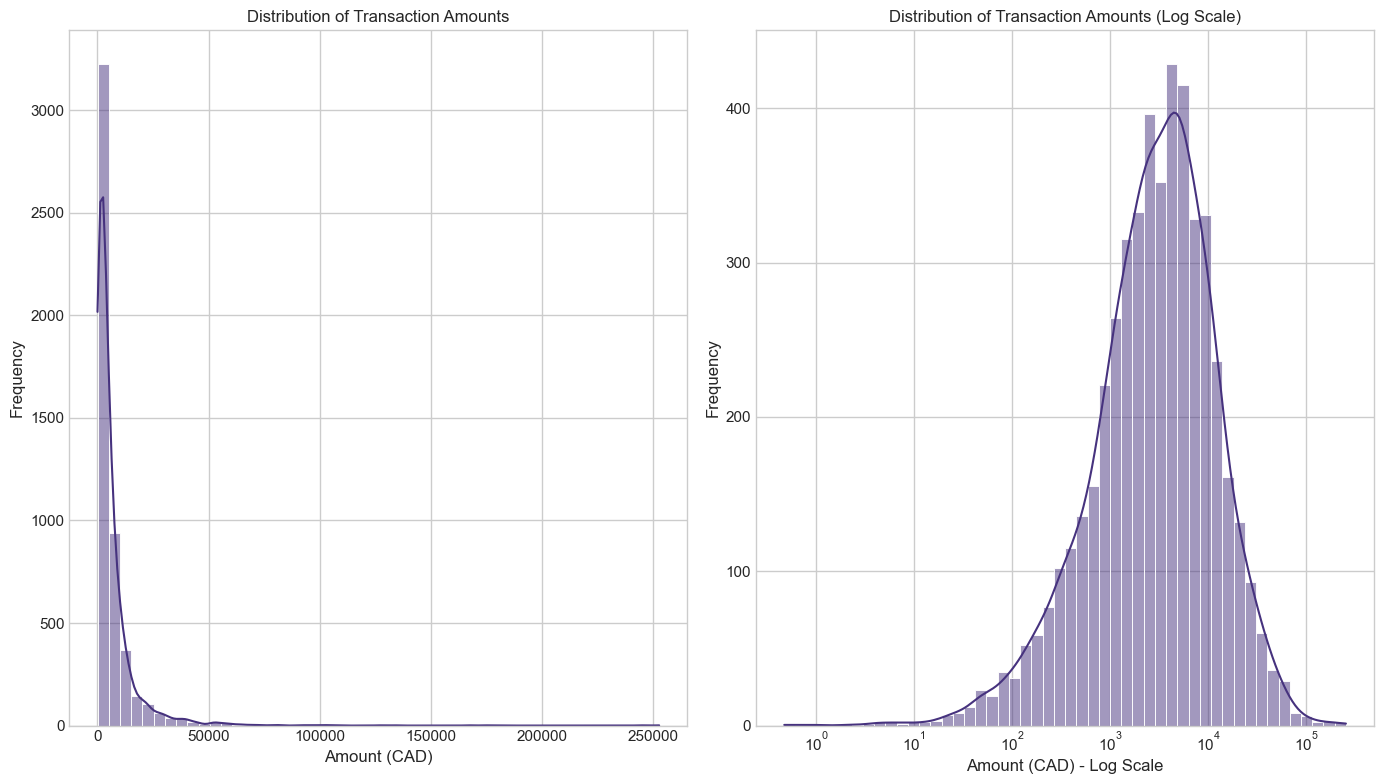

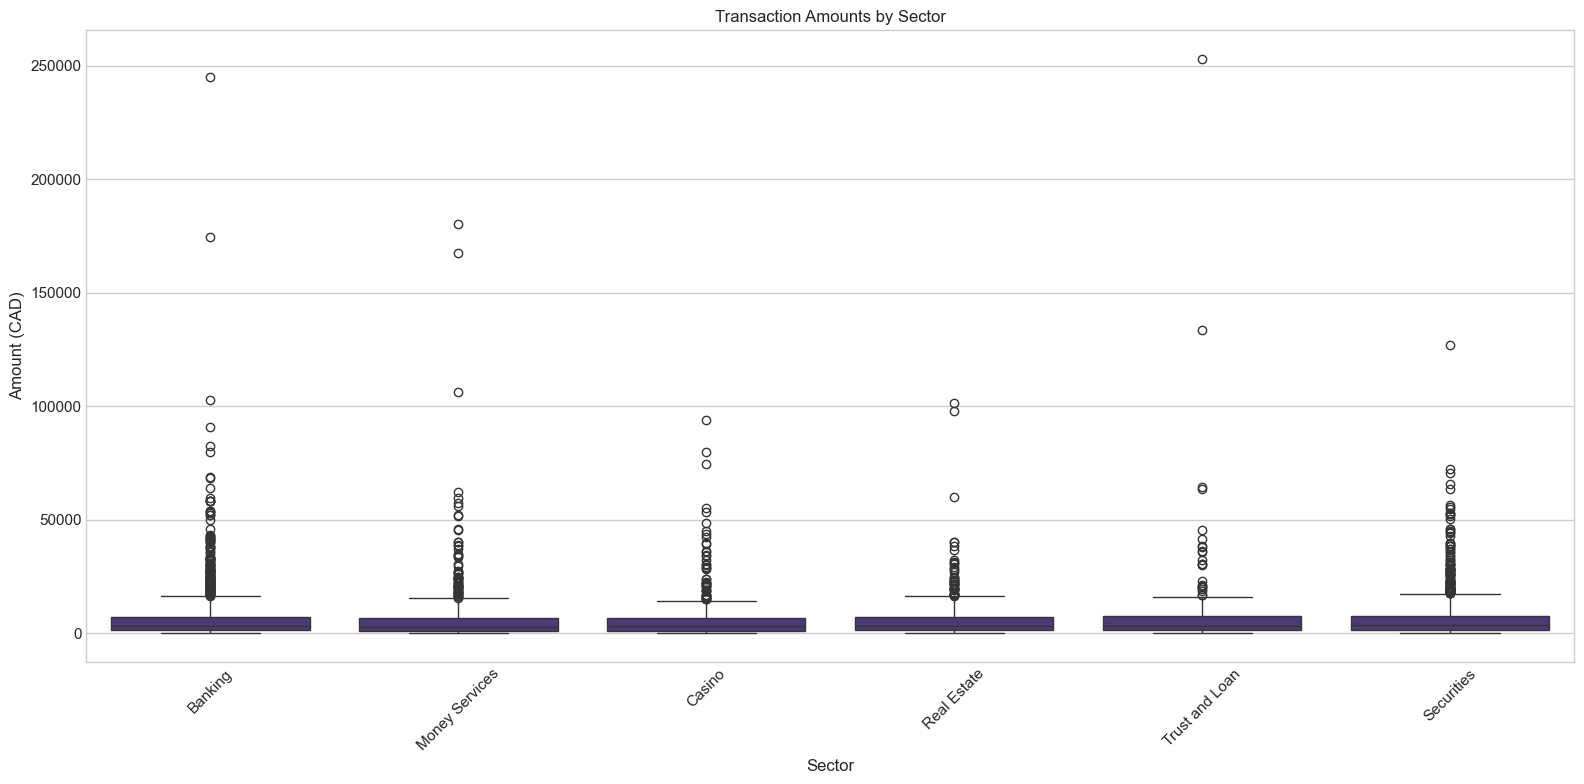

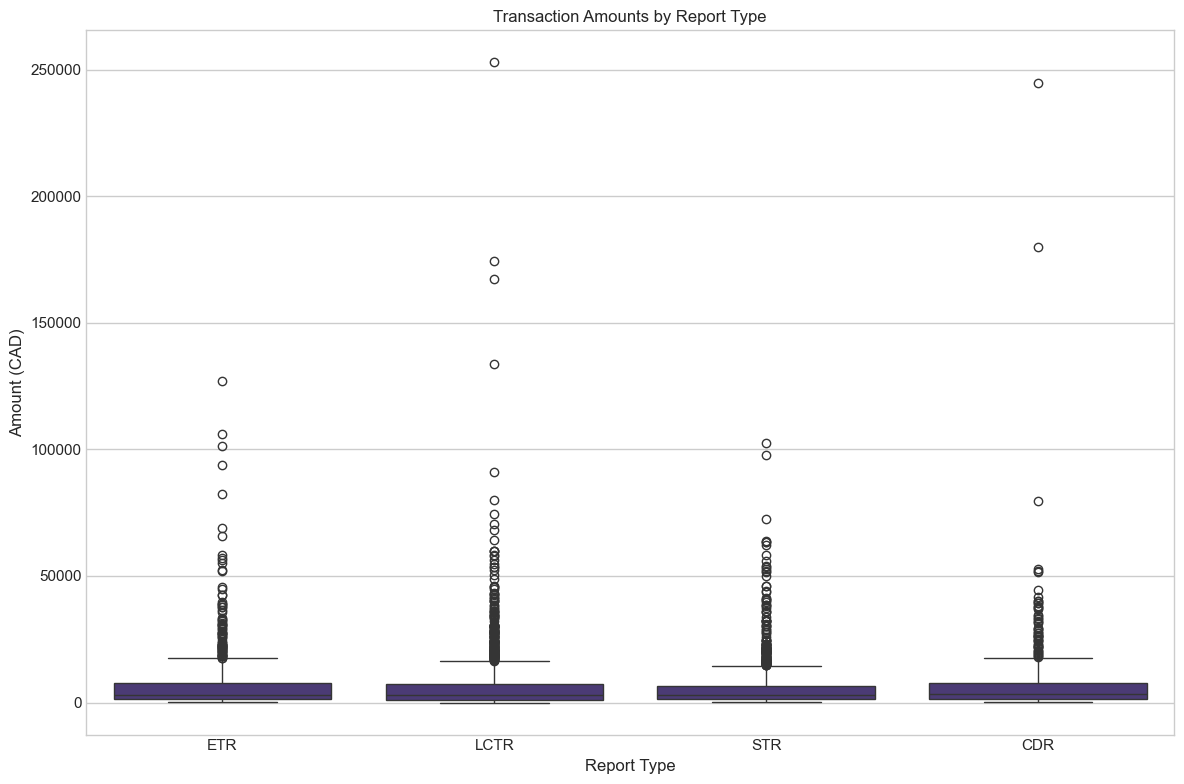

In [73]:
# Histogram of transaction amounts
plt.figure(figsize=(14, 8))

# Plot histogram on both regular and log scale
plt.subplot(1, 2, 1)
sns.histplot(df['transaction_amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount (CAD)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['transaction_amount'], bins=50, kde=True, log_scale=True)
plt.title('Distribution of Transaction Amounts (Log Scale)')
plt.xlabel('Amount (CAD) - Log Scale')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Box plot of transaction amounts by sector
plt.figure(figsize=(16, 8))
sns.boxplot(x='sector', y='transaction_amount', data=df)
plt.title('Transaction Amounts by Sector')
plt.xlabel('Sector')
plt.ylabel('Amount (CAD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Box plot of transaction amounts by report type
plt.figure(figsize=(12, 8))
sns.boxplot(x='report_type', y='transaction_amount', data=df)
plt.title('Transaction Amounts by Report Type')
plt.xlabel('Report Type')
plt.ylabel('Amount (CAD)')
plt.tight_layout()
plt.show()

### Temporal analysis

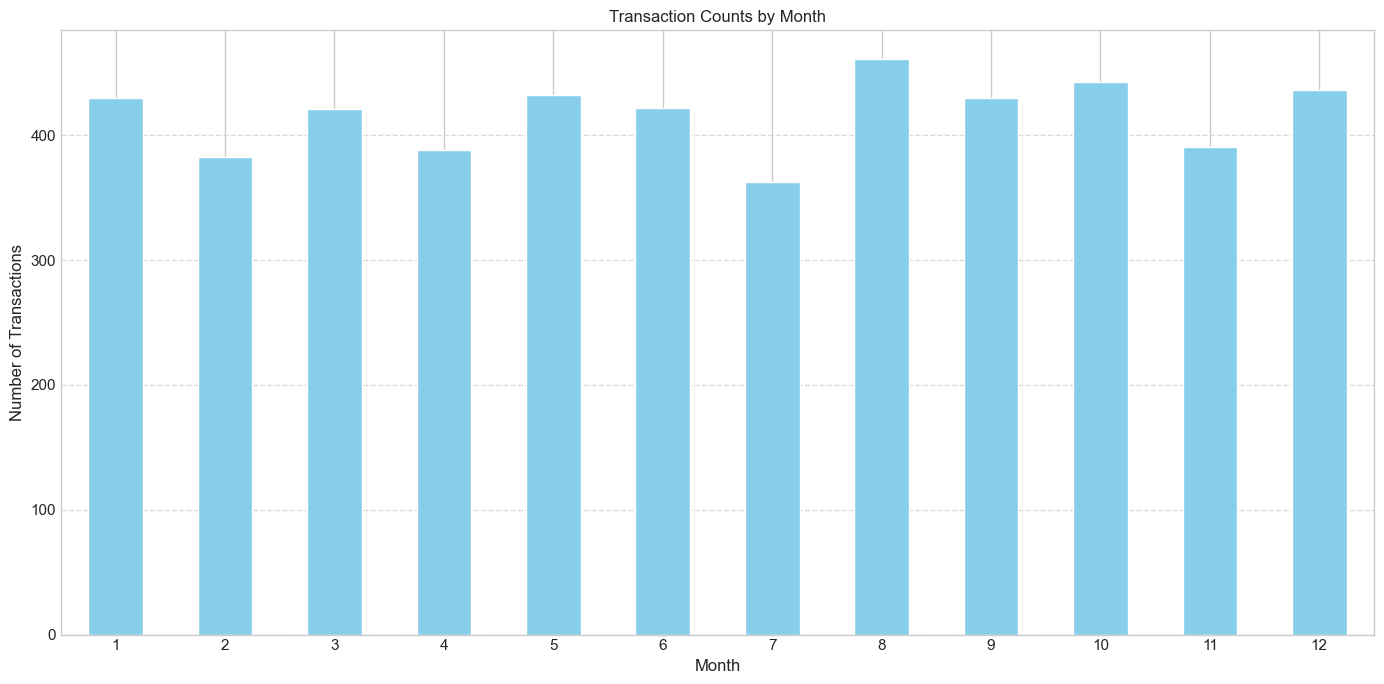

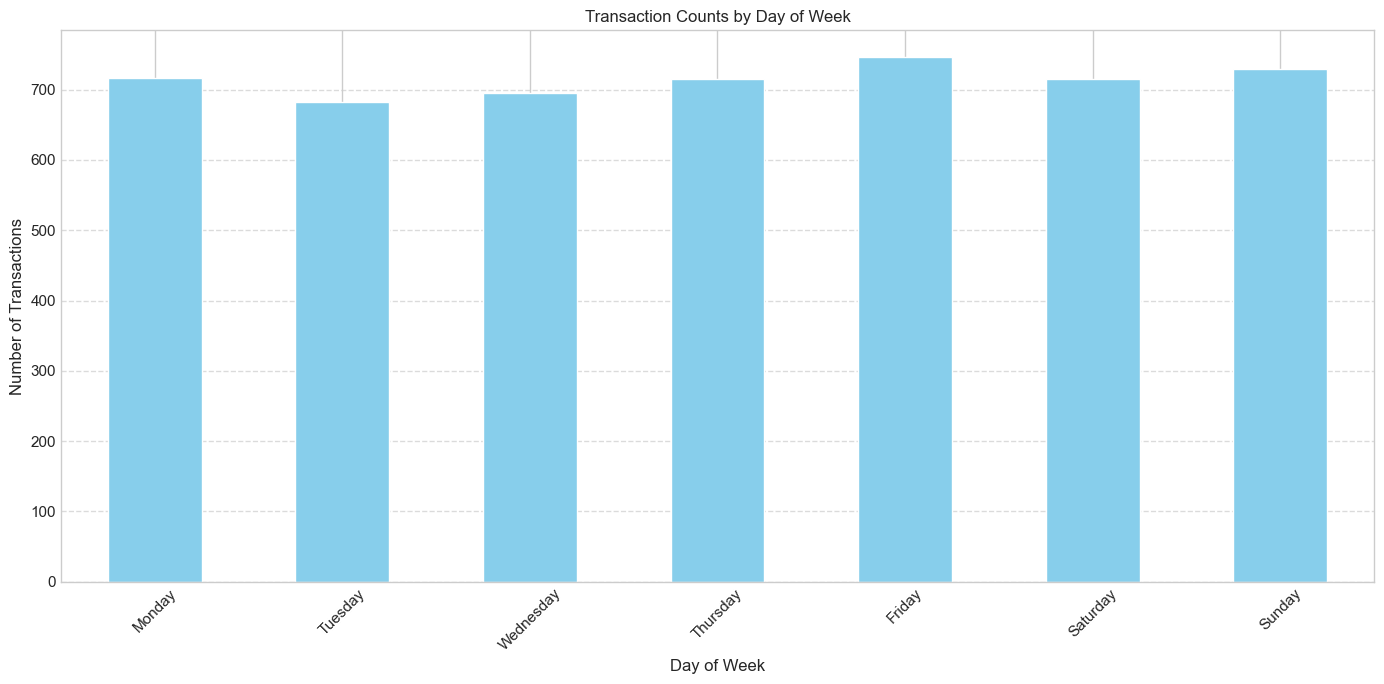

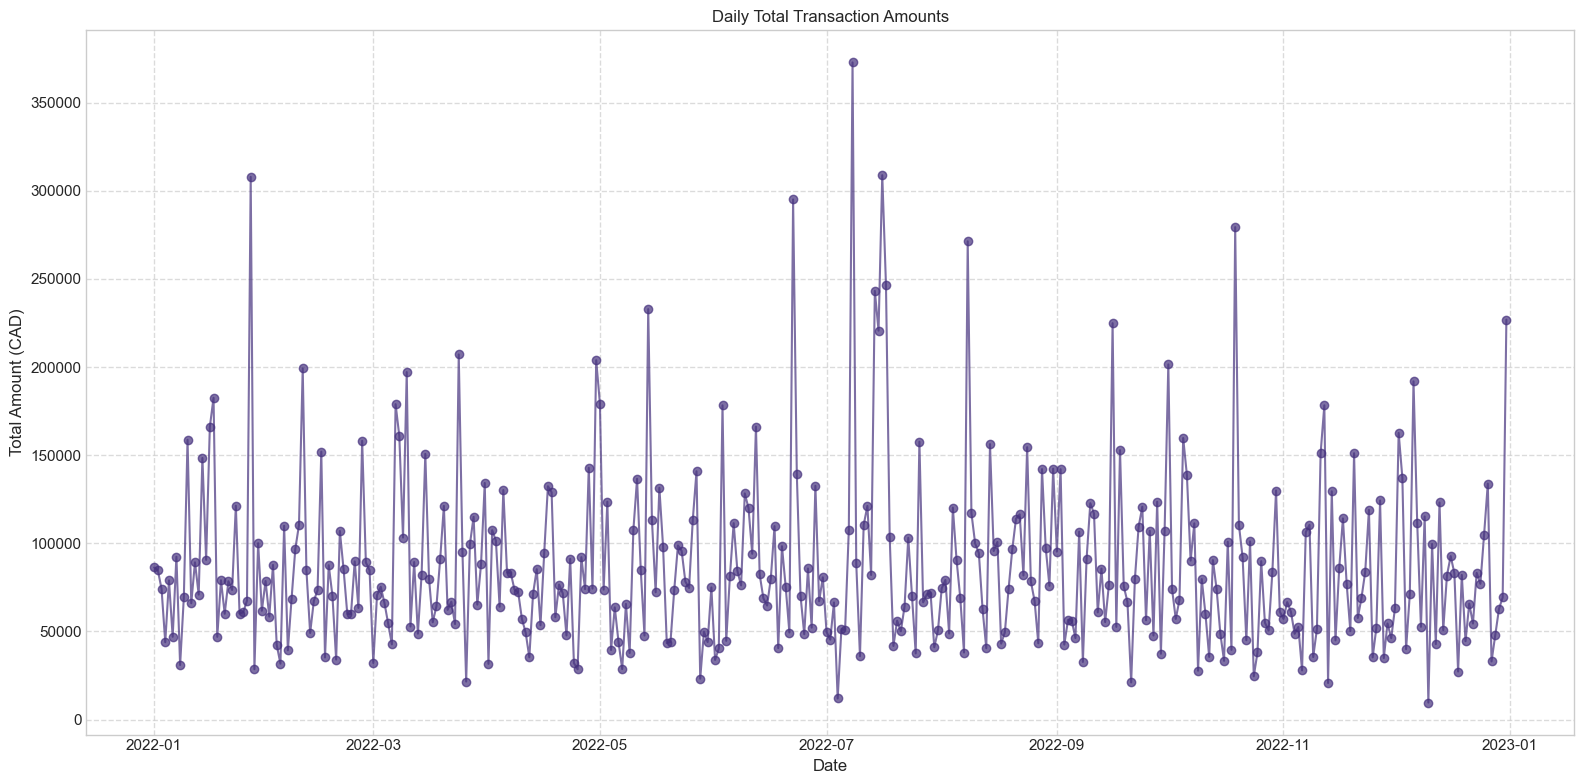

In [76]:
# Convert transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Extract year, month, day, and day of week
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month
df['day'] = df['transaction_date'].dt.day
df['day_of_week'] = df['transaction_date'].dt.dayofweek

# Plot transaction counts by month
monthly_counts = df.groupby('month').size()

plt.figure(figsize=(14, 7))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Transaction Counts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot transaction counts by day of week
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts = df.groupby('day_of_week').size()

plt.figure(figsize=(14, 7))
daily_counts.plot(kind='bar', color='skyblue')
plt.title('Transaction Counts by Day of Week')
plt.xlabel('Day of Week')
plt.xticks(ticks=range(7), labels=day_names, rotation=45)
plt.ylabel('Number of Transactions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Time series plot - daily transaction amounts
daily_amounts = df.groupby(df['transaction_date'].dt.date)['transaction_amount'].sum()

plt.figure(figsize=(16, 8))
plt.plot(daily_amounts.index, daily_amounts.values, marker='o', linestyle='-', alpha=0.7)
plt.title('Daily Total Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Total Amount (CAD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Geographic analysis

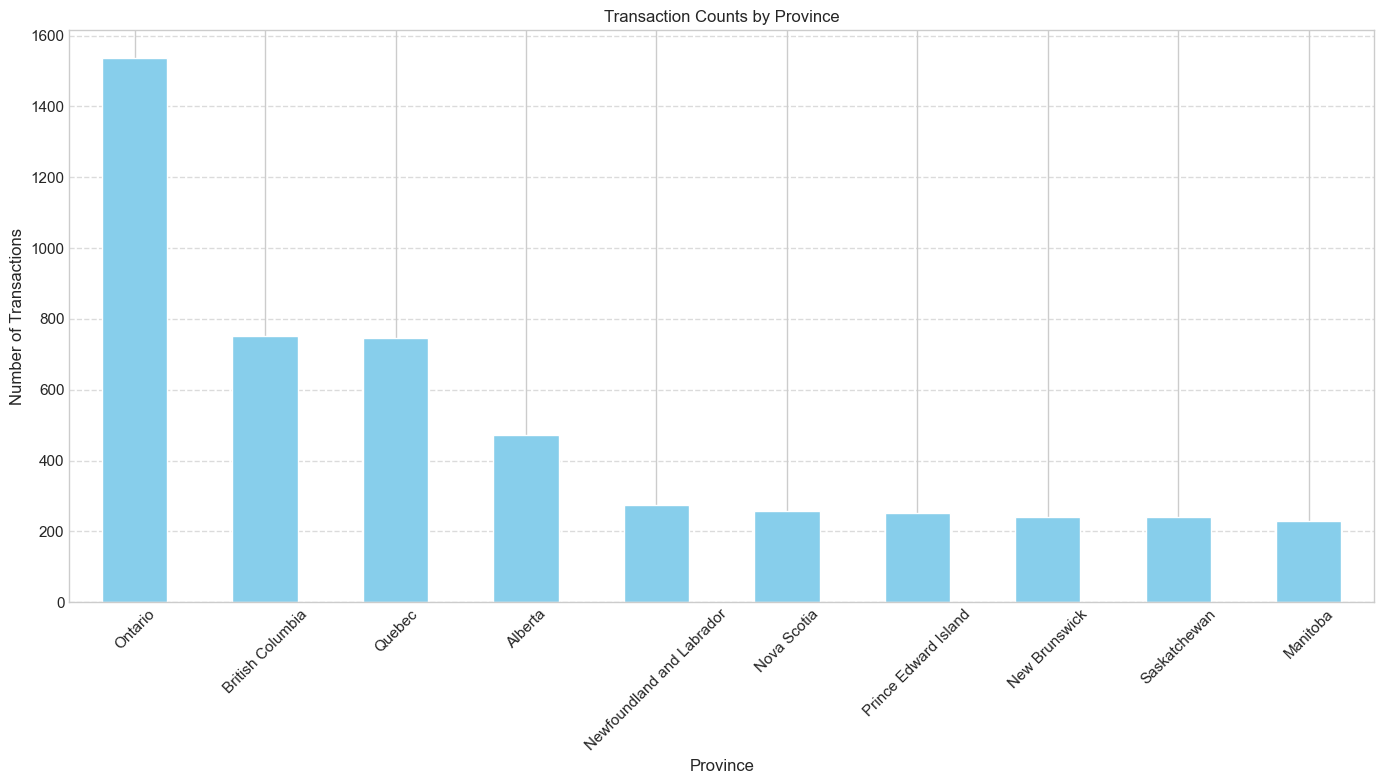

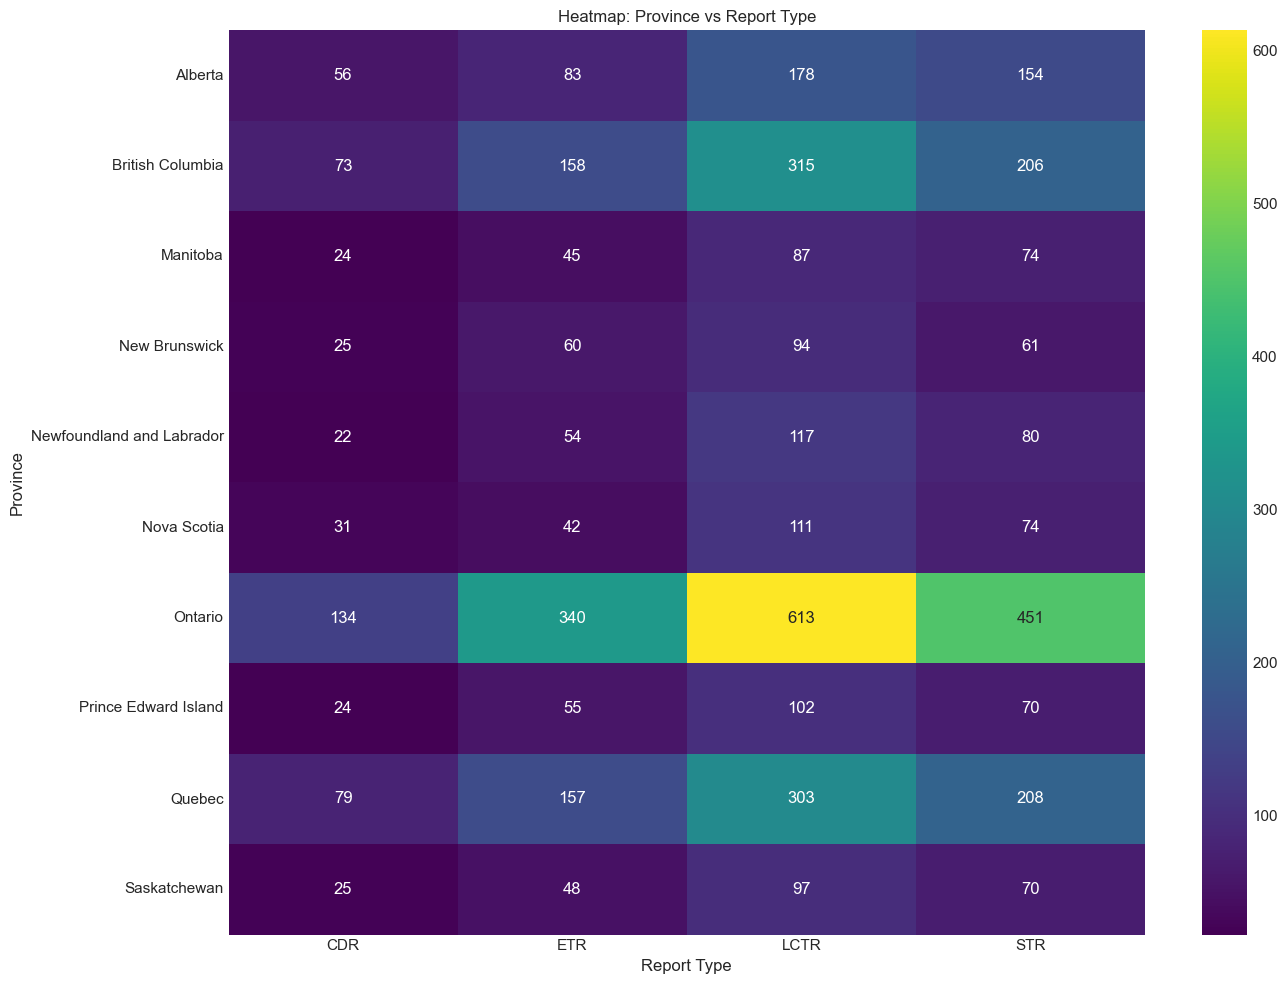

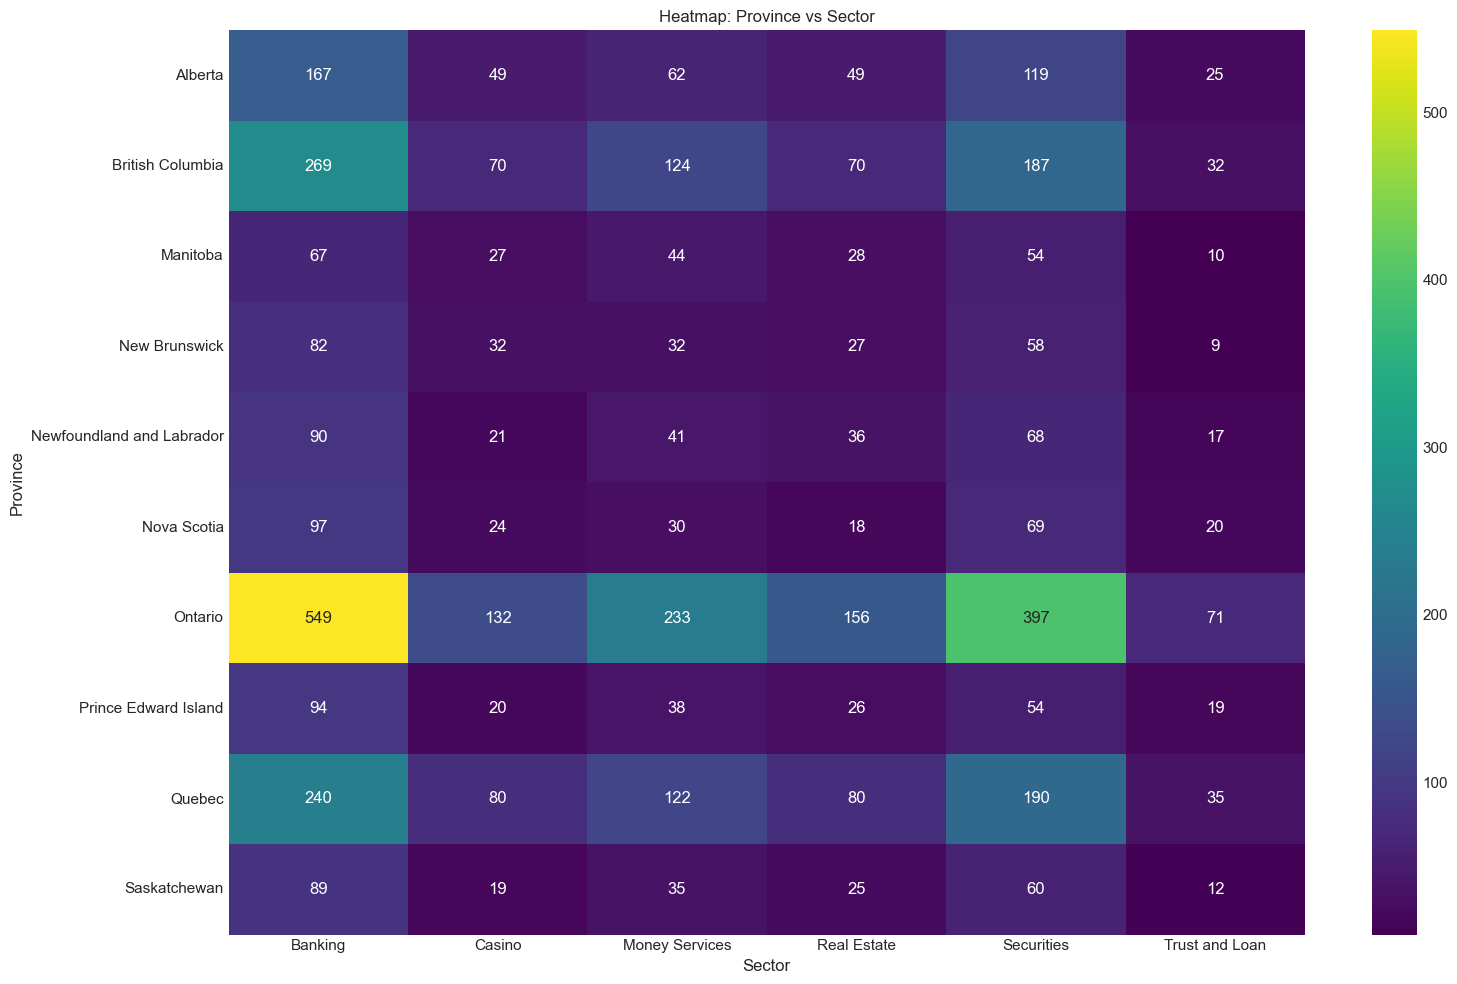

In [79]:
# Count transactions by province
province_counts = df['province'].value_counts()

plt.figure(figsize=(14, 8))
province_counts.plot(kind='bar', color='skyblue')
plt.title('Transaction Counts by Province')
plt.xlabel('Province')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Heatmap of transactions: Province vs Report Type
province_report_cross = pd.crosstab(df['province'], df['report_type'])

plt.figure(figsize=(14, 10))
sns.heatmap(province_report_cross, annot=True, cmap='viridis', fmt='d')
plt.title('Heatmap: Province vs Report Type')
plt.xlabel('Report Type')
plt.ylabel('Province')
plt.tight_layout()
plt.show()

# Heatmap of transactions: Province vs Sector
province_sector_cross = pd.crosstab(df['province'], df['sector'])

plt.figure(figsize=(16, 10))
sns.heatmap(province_sector_cross, annot=True, cmap='viridis', fmt='d')
plt.title('Heatmap: Province vs Sector')
plt.xlabel('Sector')
plt.ylabel('Province')
plt.tight_layout()
plt.show()

### Sector and report type analysis

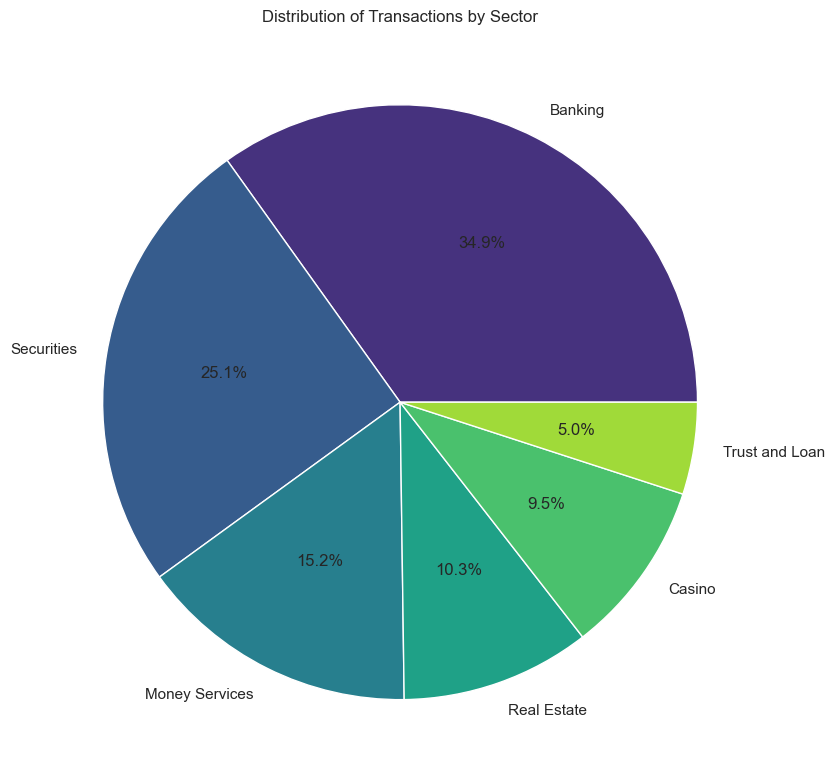

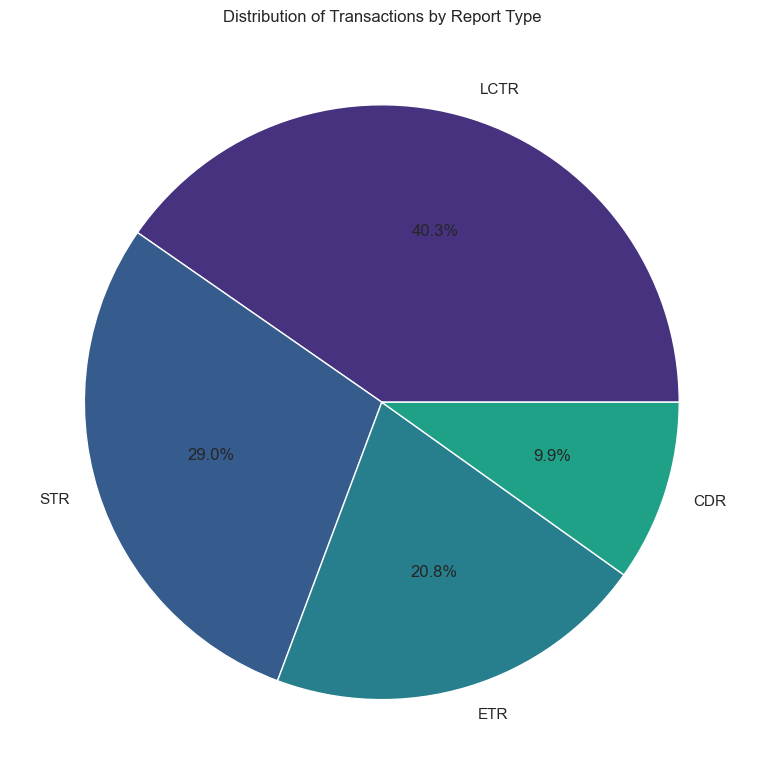

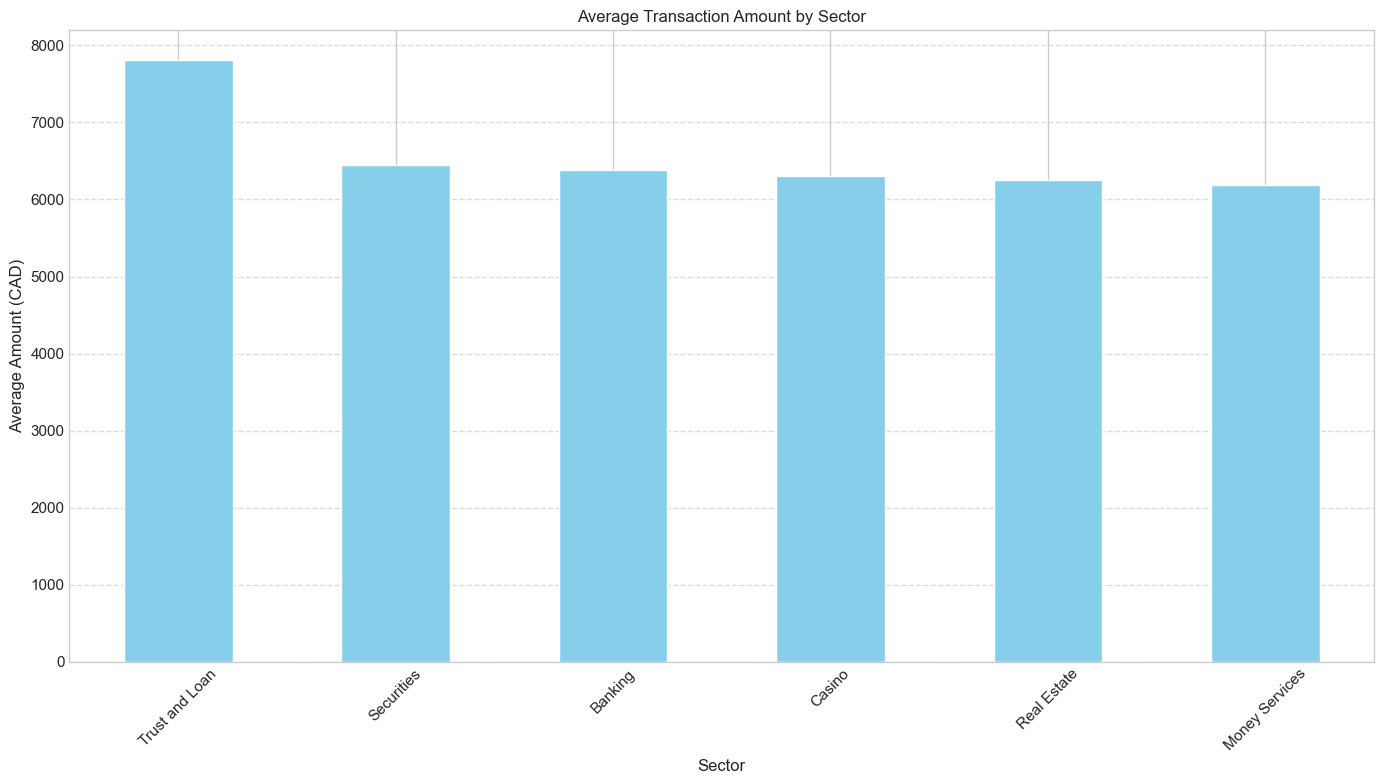

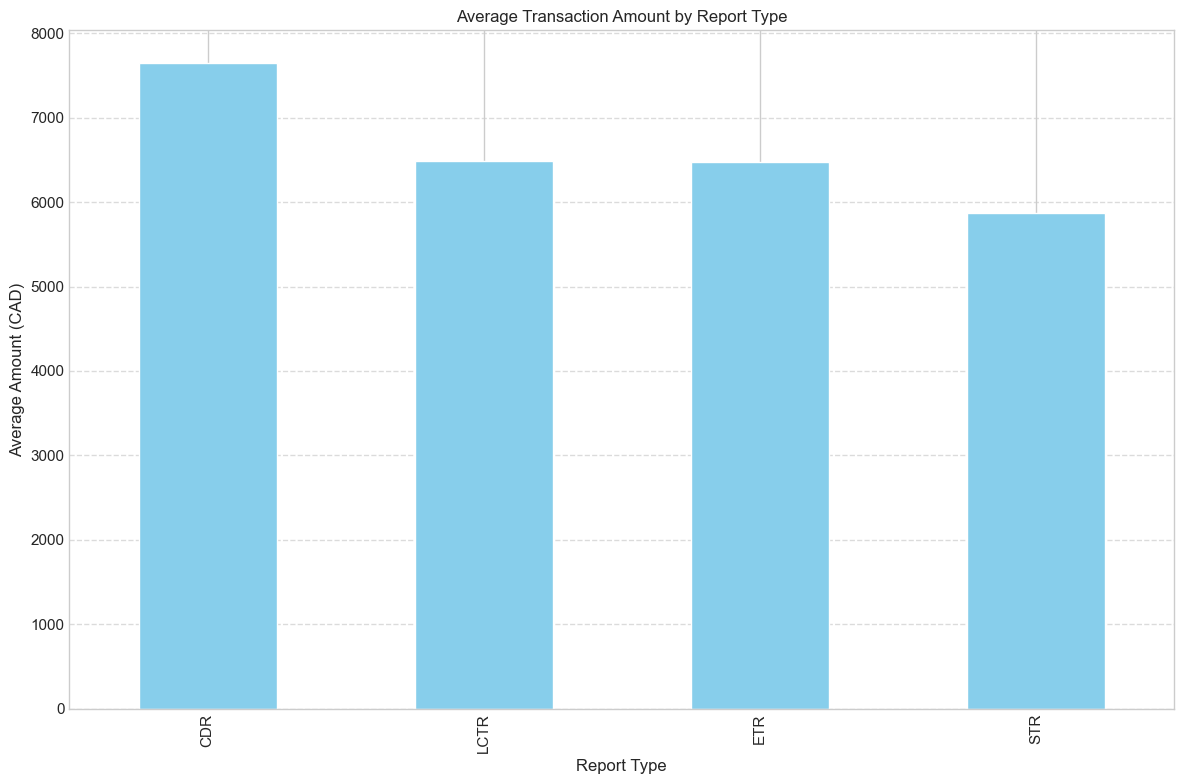

In [82]:
# Pie chart of transactions by sector
plt.figure(figsize=(12, 8))
df['sector'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Transactions by Sector')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Pie chart of transactions by report type
plt.figure(figsize=(12, 8))
df['report_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Transactions by Report Type')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Bar chart of average transaction amount by sector
avg_amount_by_sector = df.groupby('sector')['transaction_amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
avg_amount_by_sector.plot(kind='bar', color='skyblue')
plt.title('Average Transaction Amount by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Amount (CAD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Bar chart of average transaction amount by report type
avg_amount_by_report = df.groupby('report_type')['transaction_amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
avg_amount_by_report.plot(kind='bar', color='skyblue')
plt.title('Average Transaction Amount by Report Type')
plt.xlabel('Report Type')
plt.ylabel('Average Amount (CAD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Correlation analysis

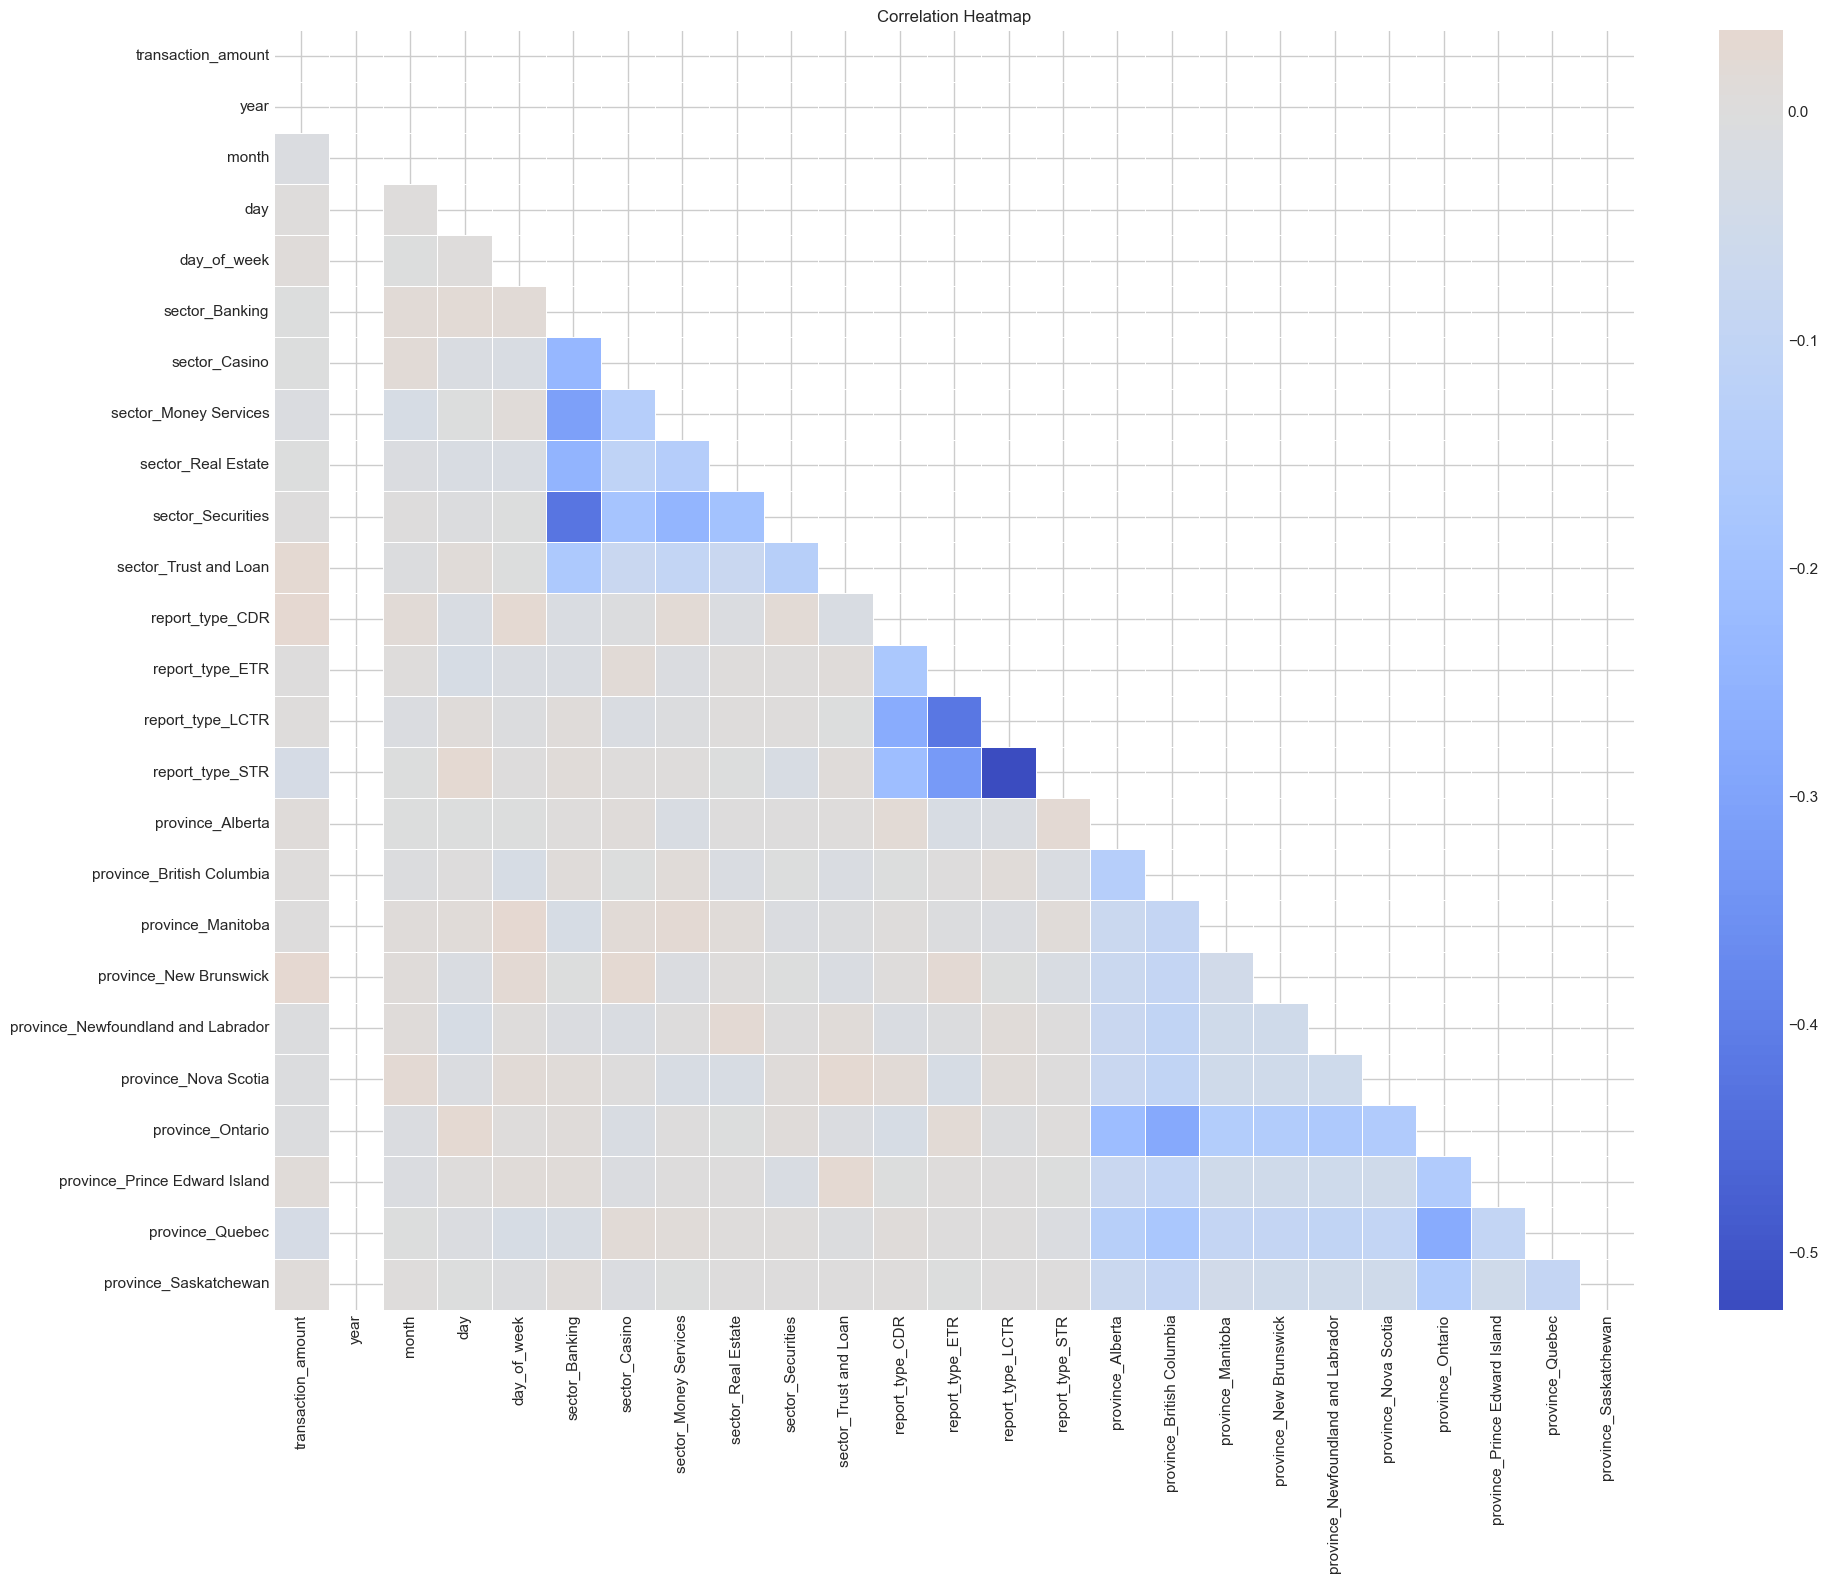

Top Correlations:
report_type_LCTR           report_type_STR              0.525018
report_type_STR            report_type_LCTR             0.525018
sector_Banking             sector_Securities            0.423895
sector_Securities          sector_Banking               0.423895
report_type_LCTR           report_type_ETR              0.421912
report_type_ETR            report_type_LCTR             0.421912
                           report_type_STR              0.327600
report_type_STR            report_type_ETR              0.327600
sector_Money Services      sector_Banking               0.310093
sector_Banking             sector_Money Services        0.310093
province_Ontario           province_British Columbia    0.280434
province_British Columbia  province_Ontario             0.280434
province_Ontario           province_Quebec              0.279336
province_Quebec            province_Ontario             0.279336
report_type_CDR            report_type_LCTR             0.271961
report_

In [85]:
# Create numeric features for correlation analysis
# Convert categorical variables to dummy variables
df_dummies = pd.get_dummies(df[['sector', 'report_type', 'province']])

# Combine with numeric variables
df_numeric = pd.concat([
    df[['transaction_amount', 'year', 'month', 'day', 'day_of_week']],
    df_dummies
], axis=1)

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=False, 
            center=0, linewidths=.5, fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Extract top correlations
def get_top_abs_correlations(df, n=20):
    corr_matrix = df.corr().abs()
    # Set self-correlations to 0
    np.fill_diagonal(corr_matrix.values, 0)
    # Unstack and sort
    s = corr_matrix.unstack()
    so = s.sort_values(kind="quicksort", ascending=False)
    return so.head(n)

top_correlations = get_top_abs_correlations(df_numeric, 20)
print("Top Correlations:")
print(top_correlations)

### Anomaly detection exploration

Number of potential outliers based on z-score: 78
Percentage of outliers: 1.56%


transaction_id transaction_date  transaction_amount          sector  \
3        TX-000004       2022-07-11        59730.020481  Money Services   
107      TX-000108       2022-08-16        45486.032545  Money Services   
114      TX-000115       2022-07-16       252844.691760  Trust and Loan   
142      TX-000143       2022-11-11        45983.858150  Money Services   
225      TX-000226       2022-06-19        53978.310768         Banking   

    report_type                   province  year  month  day  day_of_week  \
3          LCTR                    Alberta  2022      7   11            0   
107        LCTR              New Brunswick  2022      8   16            1   
114        LCTR       Prince Edward Island  2022      7   16            5   
142         STR           British Columbia  2022     11   11            4   
225         STR  Newfoundland and Labrador  2022      6   19            6   

     amount_zscore  
3         4.629760  
107       3.392694  
114      21.401447  
142       3.435929  
225       4.130234

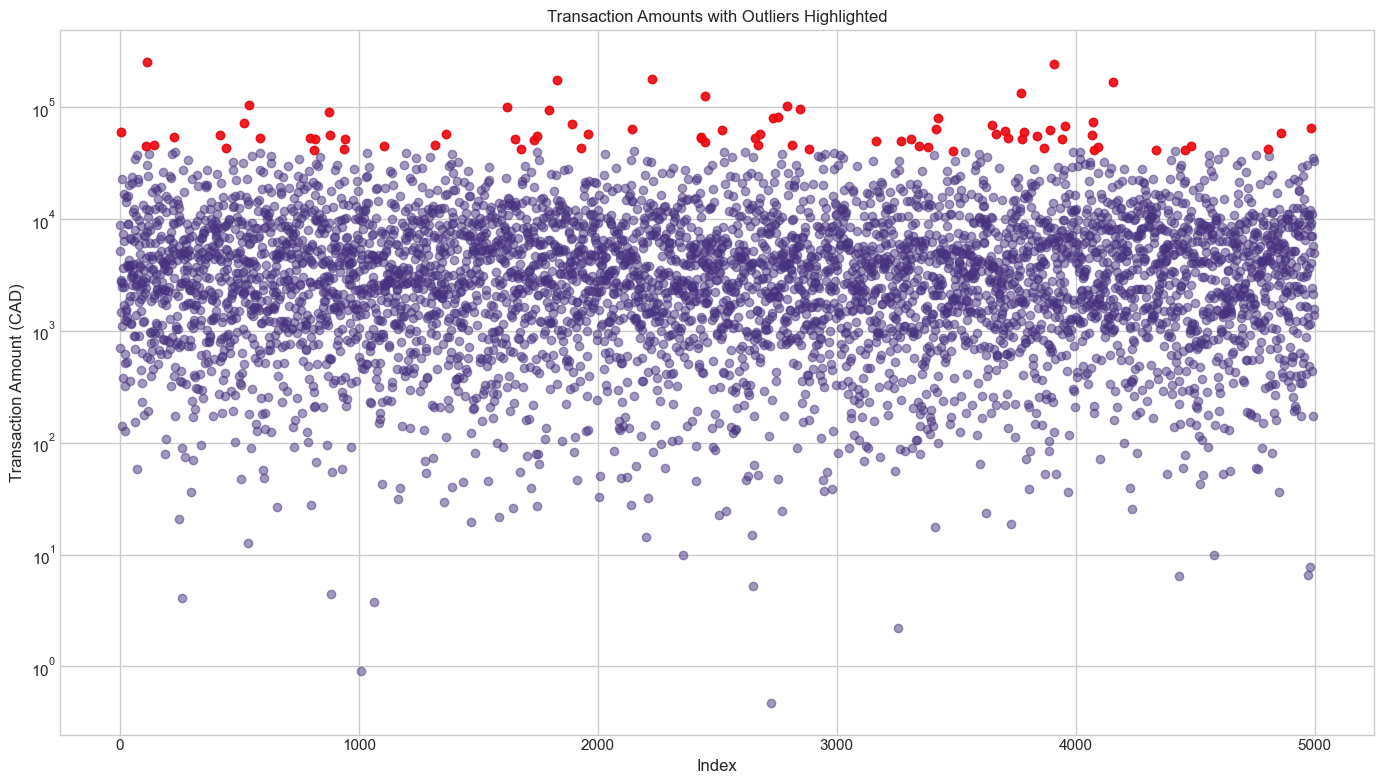

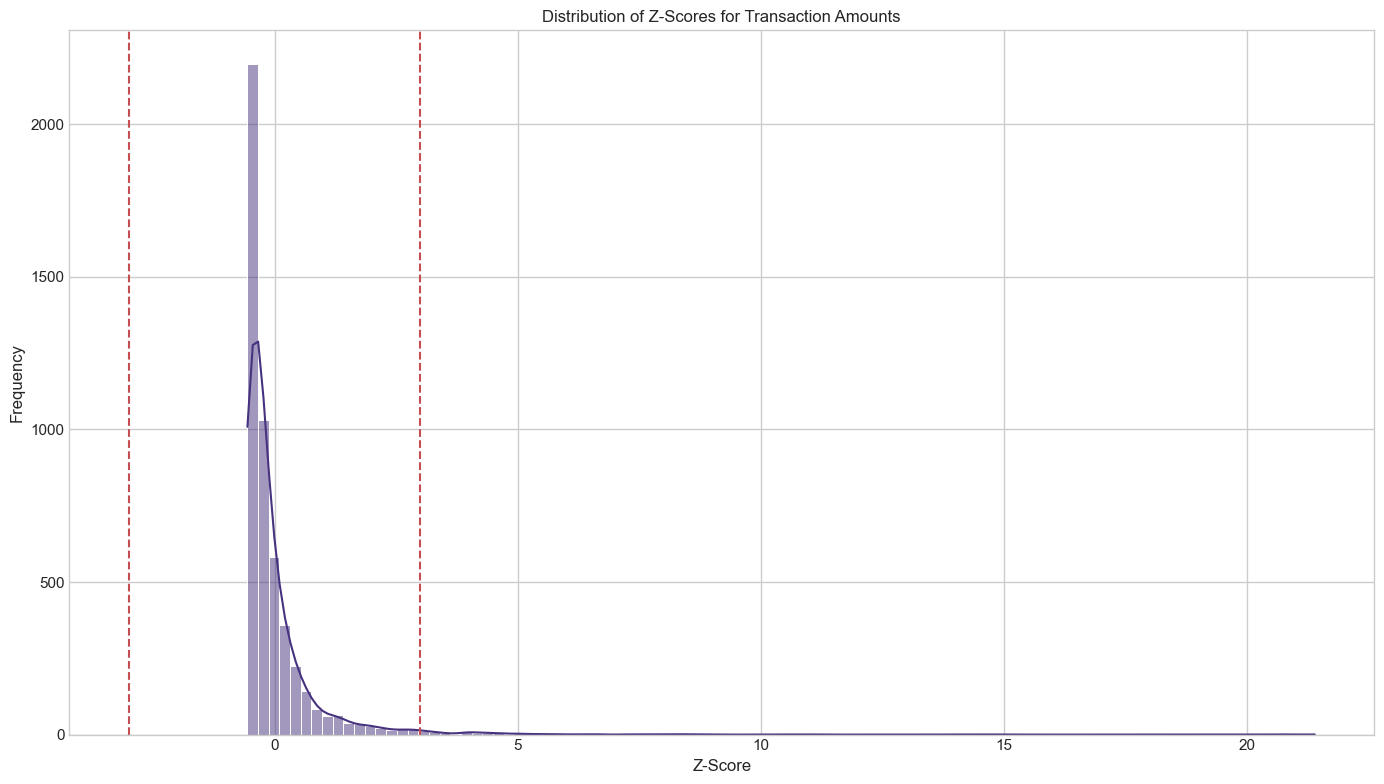

In [88]:
# Z-score for transaction amounts
df['amount_zscore'] = (df['transaction_amount'] - df['transaction_amount'].mean()) / df['transaction_amount'].std()

# Identify potential outliers using z-score
outliers = df[abs(df['amount_zscore']) > 3]
print(f"Number of potential outliers based on z-score: {len(outliers)}")
print(f"Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")

# Display potential outliers
display(outliers.head())

# Plot outliers
plt.figure(figsize=(14, 8))
plt.scatter(df.index, df['transaction_amount'], alpha=0.5)
plt.scatter(outliers.index, outliers['transaction_amount'], color='red', alpha=0.8)
plt.title('Transaction Amounts with Outliers Highlighted')
plt.xlabel('Index')
plt.ylabel('Transaction Amount (CAD)')
plt.yscale('log')
plt.tight_layout()
plt.show()

# Distribution of z-scores
plt.figure(figsize=(14, 8))
sns.histplot(df['amount_zscore'], bins=100, kde=True)
plt.axvline(x=3, color='r', linestyle='--')
plt.axvline(x=-3, color='r', linestyle='--')
plt.title('Distribution of Z-Scores for Transaction Amounts')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Relationship exploration

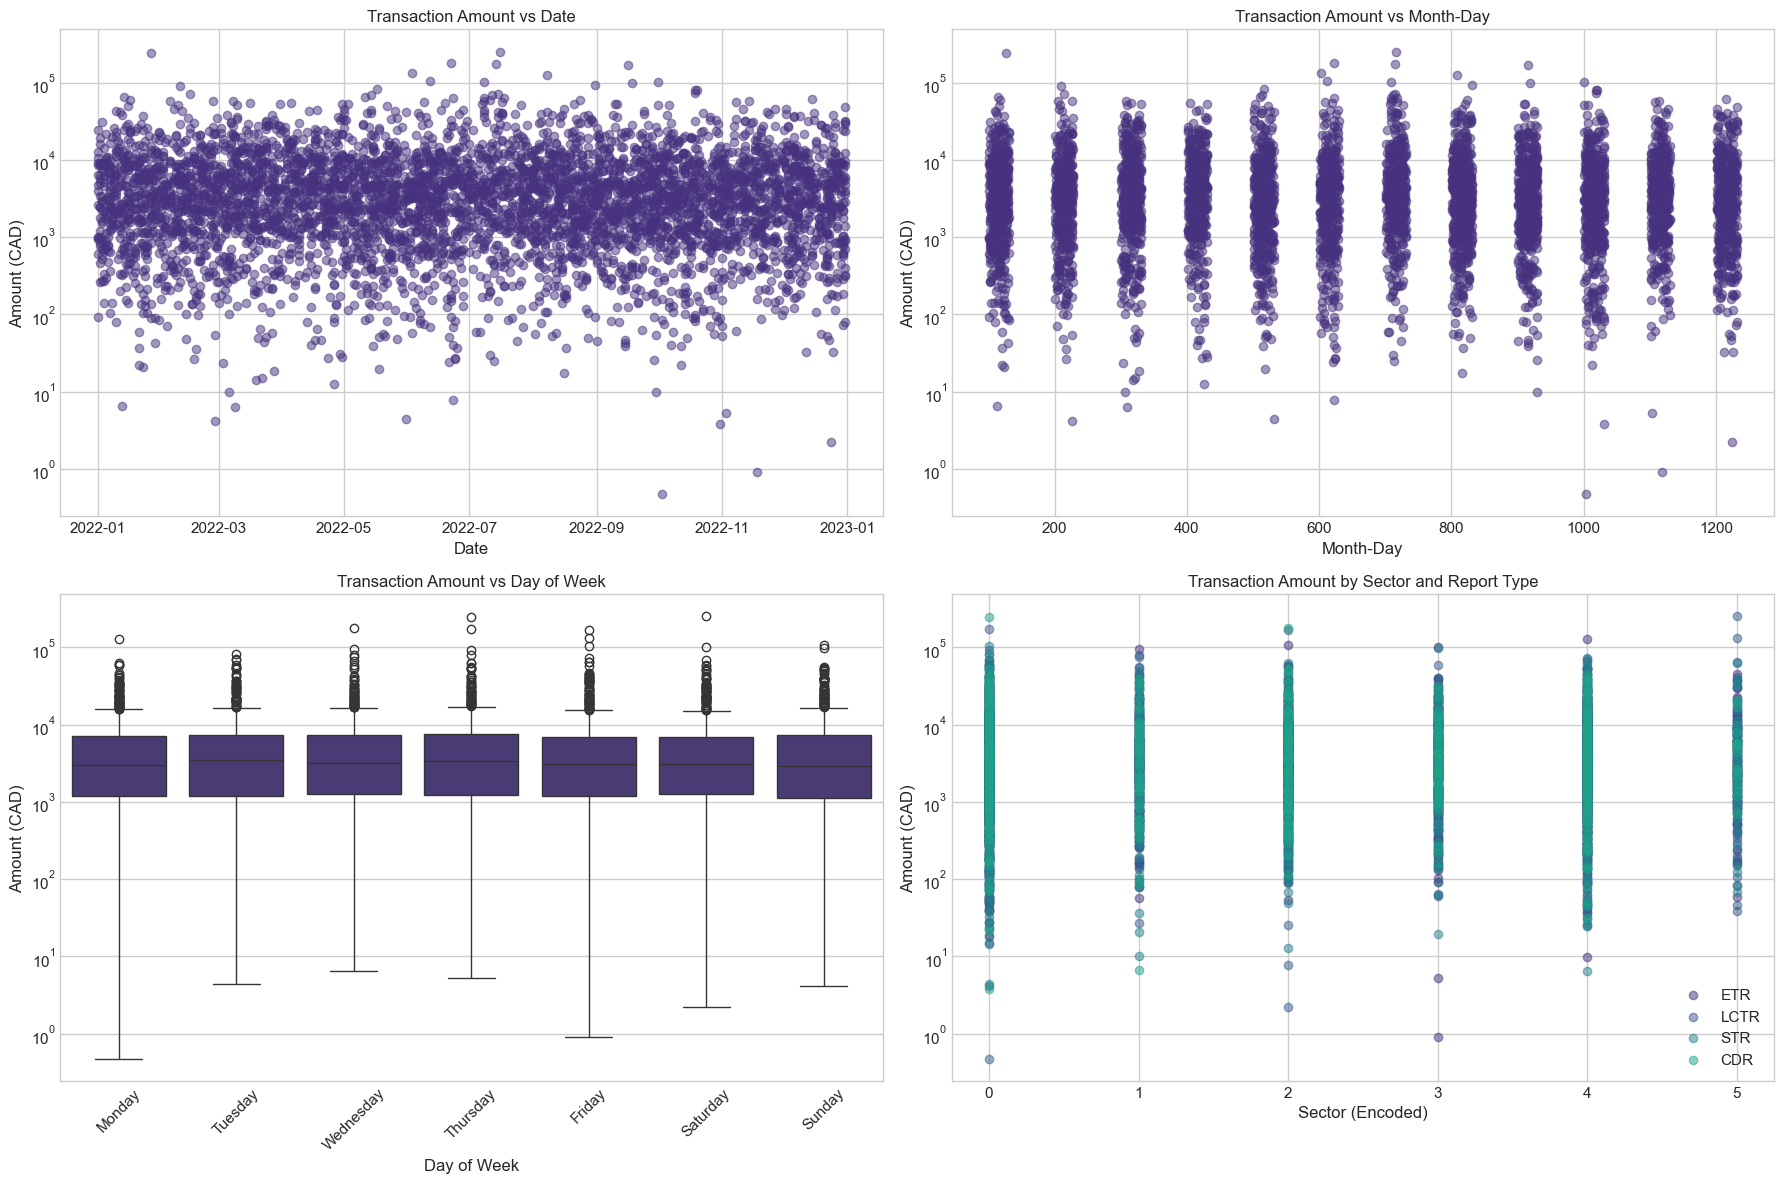

In [91]:
# Create a month-day pair for seasonal patterns
df['month_day'] = df['month'] * 100 + df['day']

# Scatterplots for various relationships
plt.figure(figsize=(18, 12))

# Amount vs Time
plt.subplot(2, 2, 1)
plt.scatter(df['transaction_date'], df['transaction_amount'], alpha=0.5)
plt.title('Transaction Amount vs Date')
plt.xlabel('Date')
plt.ylabel('Amount (CAD)')
plt.yscale('log')

# Amount vs Month-Day
plt.subplot(2, 2, 2)
plt.scatter(df['month_day'], df['transaction_amount'], alpha=0.5)
plt.title('Transaction Amount vs Month-Day')
plt.xlabel('Month-Day')
plt.ylabel('Amount (CAD)')
plt.yscale('log')

# Amount vs Day of Week
plt.subplot(2, 2, 3)
sns.boxplot(x='day_of_week', y='transaction_amount', data=df)
plt.title('Transaction Amount vs Day of Week')
plt.xlabel('Day of Week')
plt.xticks(ticks=range(7), labels=day_names, rotation=45)
plt.ylabel('Amount (CAD)')
plt.yscale('log')

# Amount distribution by Report Type and Sector
plt.subplot(2, 2, 4)
for report_type in df['report_type'].unique():
    subset = df[df['report_type'] == report_type]
    plt.scatter(subset['sector'].astype('category').cat.codes, subset['transaction_amount'], 
                alpha=0.5, label=report_type)
plt.title('Transaction Amount by Sector and Report Type')
plt.xlabel('Sector (Encoded)')b
plt.ylabel('Amount (CAD)')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()

### Basic network analysis

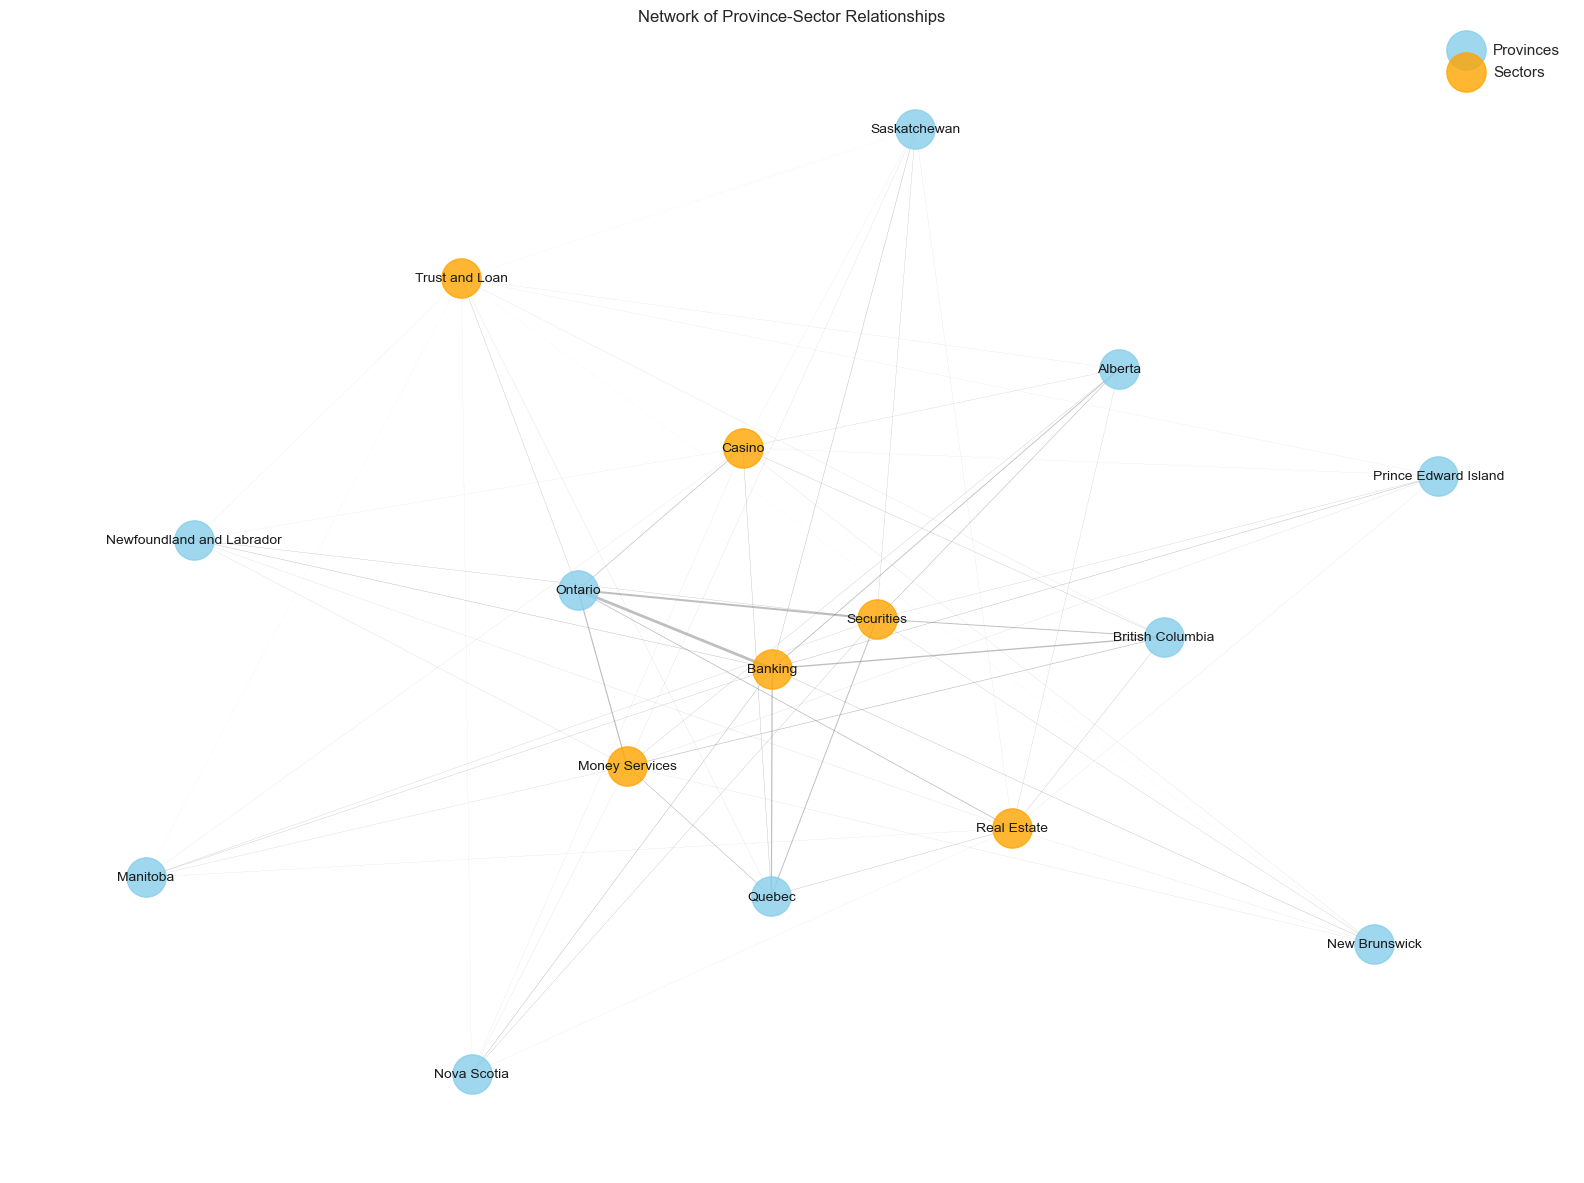

In [96]:
# For this example, we'll create a random network between provinces and sectors
from itertools import product

# Create a bipartite graph of province to sector relationships
G = nx.Graph()

# Add nodes for provinces and sectors
provinces = df['province'].unique()
sectors = df['sector'].unique()

# Add province nodes
for province in provinces:
    G.add_node(province, node_type='province')

# Add sector nodes
for sector in sectors:
    G.add_node(sector, node_type='sector')

# Add edges based on transaction relationships
for province, sector in df[['province', 'sector']].drop_duplicates().values:
    count = len(df[(df['province'] == province) & (df['sector'] == sector)])
    G.add_edge(province, sector, weight=count)

# Plot the network
plt.figure(figsize=(16, 12))

# Set position layout
pos = nx.spring_layout(G, seed=42)

# Separate the nodes by type
province_nodes = [node for node, attr in G.nodes(data=True) if attr.get('node_type') == 'province']
sector_nodes = [node for node, attr in G.nodes(data=True) if attr.get('node_type') == 'sector']

# Get edge weights for width
edge_weights = [G.get_edge_data(u, v)['weight'] for u, v in G.edges()]
max_weight = max(edge_weights)
normalized_weights = [2 * weight / max_weight for weight in edge_weights]

# Draw the network
nx.draw_networkx_nodes(G, pos, nodelist=province_nodes, node_color='skyblue', node_size=800, alpha=0.8, label='Provinces')
nx.draw_networkx_nodes(G, pos, nodelist=sector_nodes, node_color='orange', node_size=800, alpha=0.8, label='Sectors')
nx.draw_networkx_edges(G, pos, width=normalized_weights, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title('Network of Province-Sector Relationships')
plt.legend()
plt.axis('off')
plt.tight_layout()
plt.show()

### Save processed data for next phase

In [105]:
import os
import json
from pathlib import Path

# This will create/use directories relative to where the notebook is running
base_dir = Path("../data")  # Relative path
processed_dir = base_dir / "processed"
processed_dir.mkdir(parents=True, exist_ok=True)

# Save the processed dataframe with added features
processed_data_path = processed_dir / "fintrac_processed.csv"
df.to_csv(processed_data_path, index=False)
print(f"Processed data saved to {processed_data_path}")

# Save summary statistics
summary_stats = {
    'total_transactions': len(df),
    'total_amount': df['transaction_amount'].sum(),
    'avg_amount': df['transaction_amount'].mean(),
    'min_amount': df['transaction_amount'].min(),
    'max_amount': df['transaction_amount'].max(),
    'std_amount': df['transaction_amount'].std(),
    'num_outliers': len(outliers),
    'date_range': [df['transaction_date'].min(), df['transaction_date'].max()],
    'top_province': df['province'].value_counts().index[0],
    'top_sector': df['sector'].value_counts().index[0],
    'top_report_type': df['report_type'].value_counts().index[0]
}

# Save as JSON
summary_path = processed_dir / "summary_stats.json"
with open(summary_path, 'w') as f:
    json.dump(summary_stats, f, indent=4, default=str)
print(f"Summary statistics saved to {summary_path}")

Processed data saved to ..\data\processed\fintrac_processed.csv
Summary statistics saved to ..\data\processed\summary_stats.json


# Phase 3: Model Development for AML Detection System

In this section, we'll develop and evaluate models to detect potential money laundering activities using the features we engineered in the previous phase. We'll implement multiple detection approaches and compare their effectiveness.

In [108]:
# Import additional libraries needed for model development
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("Model development libraries imported successfully.")

Model development libraries imported successfully.


## 3.1 Combining Legitimate Transactions with Synthetic Money Laundering Patterns

We'll merge our processed legitimate transactions with the synthetic money laundering patterns to create a dataset for training our detection models.

In [113]:
# Generate synthetic money laundering patterns
print("Generating synthetic money laundering patterns for detection...")

# Create a new dataframe for synthetic money laundering patterns
ml_patterns = []

# Pattern 1: Trade-Based Money Laundering (TBML)
# Characterized by:
# - Multiple related transactions
# - Unusual pricing (over or under-invoicing)
# - Involvement of high-risk jurisdictions
# - Circular trading patterns

# Generate TBML pattern
num_tbml_patterns = 50
print(f"Generating {num_tbml_patterns} TBML patterns...")

for i in range(num_tbml_patterns):
    # Base transaction date
    base_date = pd.to_datetime('2023-01-01') + pd.Timedelta(days=np.random.randint(0, 365))
    
    # Select a random province (preferably coastal for trade)
    coastal_provinces = ['British Columbia', 'Nova Scotia', 'Quebec', 'Ontario']
    province = np.random.choice(coastal_provinces)
    
    # Generate a set of 3-5 related transactions with unusual pricing
    num_related_tx = np.random.randint(3, 6)
    true_value = np.random.uniform(500000, 2000000)  # True value of goods
    
    for j in range(num_related_tx):
        # Create transaction with unusual pricing
        if j % 2 == 0:
            # Over-invoicing
            amount = true_value * np.random.uniform(1.5, 3.0)
        else:
            # Under-invoicing
            amount = true_value * np.random.uniform(0.3, 0.7)
        
        tx_date = base_date + pd.Timedelta(days=j*2)  # Spread transactions by 2 days
        
        # Add to patterns
        ml_patterns.append({
            'transaction_id': f"TBML-{i+1}-{j+1}",
            'transaction_date': tx_date,
            'transaction_amount': amount,
            'province': province,
            'sector': 'Securities',
            'report_type': 'STR',
            'ml_pattern': 'TBML',
            'pattern_id': f"TBML-{i+1}",
            'is_suspicious': 1,
            'risk_score': np.random.uniform(0.7, 0.95)
        })

# Pattern 2: Casino-Investment Connections
# Characterized by:
# - Funds moving from casinos to investment accounts
# - Large cash deposits followed by securities purchases
# - Frequent transactions just below reporting thresholds

num_casino_patterns = 40
print(f"Generating {num_casino_patterns} casino-investment patterns...")

for i in range(num_casino_patterns):
    # Base transaction date
    base_date = pd.to_datetime('2023-01-01') + pd.Timedelta(days=np.random.randint(0, 365))
    
    # Select a random province
    province = np.random.choice(df['province'].unique())
    
    # Generate a series of 4-7 related transactions
    num_related_tx = np.random.randint(4, 8)
    
    for j in range(num_related_tx):
        if j == 0:
            # Initial casino win/cash deposit
            sector = 'Casino'
            amount = np.random.uniform(8000, 9900)  # Just below 10k reporting threshold
            report_type = 'LCTR'
        else:
            # Securities purchase
            sector = 'Securities'
            # Smaller transactions to avoid detection
            amount = np.random.uniform(5000, 9900)
            report_type = 'STR' if np.random.random() > 0.7 else 'ETR'
        
        tx_date = base_date + pd.Timedelta(days=j)  # Daily transactions
        
        ml_patterns.append({
            'transaction_id': f"CASINO-{i+1}-{j+1}",
            'transaction_date': tx_date,
            'transaction_amount': amount,
            'province': province,
            'sector': sector,
            'report_type': report_type,
            'ml_pattern': 'Casino-Investment',
            'pattern_id': f"CASINO-{i+1}",
            'is_suspicious': 1,
            'risk_score': np.random.uniform(0.65, 0.85)
        })

# Pattern 3: Complex Financing Arrangements
# Characterized by:
# - Shell company involvement
# - Complex loan structures
# - Property investment as laundering vehicle
# - International wire transfers

num_complex_patterns = 30
print(f"Generating {num_complex_patterns} complex financing patterns...")

for i in range(num_complex_patterns):
    # Base transaction date
    base_date = pd.to_datetime('2023-01-01') + pd.Timedelta(days=np.random.randint(0, 365))
    
    # Select a random province
    province = np.random.choice(df['province'].unique())
    
    # Generate a series of 5-10 related transactions
    num_related_tx = np.random.randint(5, 11)
    
    # Total laundered amount (typically large)
    total_amount = np.random.uniform(2000000, 10000000)
    
    sectors = ['Real Estate', 'Banking', 'Securities', 'Money Services', 'Trust and Loan']
    
    for j in range(num_related_tx):
        # Distribute total amount across transactions
        if j == num_related_tx - 1:
            # Last transaction gets remainder
            amount = total_amount
        else:
            # Random portion of remaining amount
            portion = np.random.uniform(0.1, 0.4)
            amount = total_amount * portion
            total_amount -= amount
        
        sector = np.random.choice(sectors)
        tx_date = base_date + pd.Timedelta(days=j*5)  # Transactions spread over time
        
        ml_patterns.append({
            'transaction_id': f"COMPLEX-{i+1}-{j+1}",
            'transaction_date': tx_date,
            'transaction_amount': amount,
            'province': province,
            'sector': sector,
            'report_type': 'STR',
            'ml_pattern': 'Complex-Financing',
            'pattern_id': f"COMPLEX-{i+1}",
            'is_suspicious': 1,
            'risk_score': np.random.uniform(0.75, 0.98)
        })

# Create dataframe from patterns
ml_df = pd.DataFrame(ml_patterns)
print(f"Generated {len(ml_df)} suspicious transactions across {num_tbml_patterns + num_casino_patterns + num_complex_patterns} patterns")

# Save the synthetic money laundering patterns
# Use the correct file path
base_dir = Path(r"C:\Users\Obaidullah\Videos\AML\data")
ml_data_path = base_dir / "synthetic" / "money_laundering_patterns.csv"

# Make sure the directory exists
(base_dir / "synthetic").mkdir(parents=True, exist_ok=True)
ml_df.to_csv(ml_data_path, index=False)
print(f"Synthetic money laundering patterns saved to {ml_data_path}")

# Display sample of each pattern
print("\nSample TBML pattern:")
display(ml_df[ml_df['ml_pattern'] == 'TBML'].head(3))

print("\nSample Casino-Investment pattern:")
display(ml_df[ml_df['ml_pattern'] == 'Casino-Investment'].head(3))

print("\nSample Complex-Financing pattern:")
display(ml_df[ml_df['ml_pattern'] == 'Complex-Financing'].head(3))

Generating synthetic money laundering patterns for detection...
Generating 50 TBML patterns...
Generating 40 casino-investment patterns...
Generating 30 complex financing patterns...
Generated 655 suspicious transactions across 120 patterns
Synthetic money laundering patterns saved to C:\Users\Obaidullah\Videos\AML\data\synthetic\money_laundering_patterns.csv

Sample TBML pattern:


transaction_id transaction_date  transaction_amount province      sector  \
0       TBML-1-1       2023-10-27        1.876755e+06   Quebec  Securities   
1       TBML-1-2       2023-10-29        3.716786e+05   Quebec  Securities   
2       TBML-1-3       2023-10-31        2.422418e+06   Quebec  Securities   

  report_type ml_pattern pattern_id  is_suspicious  risk_score  
0         STR       TBML     TBML-1              1    0.855611  
1         STR       TBML     TBML-1              1    0.795601  
2         STR       TBML     TBML-1              1    0.949731


Sample Casino-Investment pattern:


transaction_id transaction_date  transaction_amount     province  \
207     CASINO-1-1       2023-07-22         8833.824554  Nova Scotia   
208     CASINO-1-2       2023-07-23         5786.646424  Nova Scotia   
209     CASINO-1-3       2023-07-24         5285.833034  Nova Scotia   

         sector report_type         ml_pattern pattern_id  is_suspicious  \
207      Casino        LCTR  Casino-Investment   CASINO-1              1   
208  Securities         ETR  Casino-Investment   CASINO-1              1   
209  Securities         ETR  Casino-Investment   CASINO-1              1   

     risk_score  
207    0.704159  
208    0.751737  
209    0.839531


Sample Complex-Financing pattern:


transaction_id transaction_date  transaction_amount      province  \
422    COMPLEX-1-1       2023-12-10        2.415043e+06  Saskatchewan   
423    COMPLEX-1-2       2023-12-15        5.596307e+05  Saskatchewan   
424    COMPLEX-1-3       2023-12-20        1.044323e+06  Saskatchewan   

             sector report_type         ml_pattern pattern_id  is_suspicious  \
422  Money Services         STR  Complex-Financing  COMPLEX-1              1   
423  Money Services         STR  Complex-Financing  COMPLEX-1              1   
424         Banking         STR  Complex-Financing  COMPLEX-1              1   

     risk_score  
422    0.896685  
423    0.779497  
424    0.890272

Combined dataset contains 5655 transactions
Suspicious transactions: 655 (11.58%)
Legitimate transactions: 5000

Distribution of transaction patterns:
ml_pattern
Legitimate           5000
Complex-Financing     233
Casino-Investment     215
TBML                  207
Name: count, dtype: int64


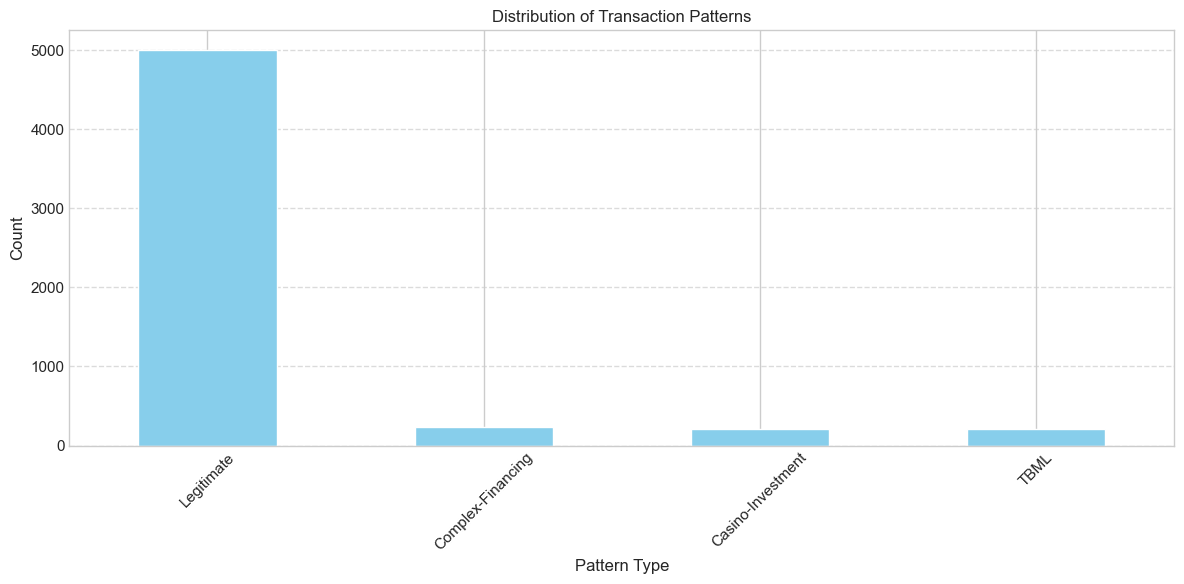

In [115]:
# Prepare the legitimate transactions for merging
# Mark all existing transactions as non-suspicious (legitimate)
df['is_suspicious'] = 0
df['ml_pattern'] = 'Legitimate'
df['pattern_id'] = 'LEGIT'
df['risk_score'] = 0.0

# Ensure both dataframes have the same columns before merging
ml_df_columns = set(ml_df.columns)
df_columns = set(df.columns)

# Identify missing columns in each dataframe
missing_in_ml = df_columns - ml_df_columns
missing_in_df = ml_df_columns - df_columns

# Add missing columns to ml_df
for col in missing_in_ml:
    ml_df[col] = None  # or appropriate default value

# Add missing columns to df
for col in missing_in_df:
    df[col] = None  # or appropriate default value

# Ensure transaction_date is datetime in both dataframes
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
ml_df['transaction_date'] = pd.to_datetime(ml_df['transaction_date'])

# Combine the datasets
combined_df = pd.concat([df, ml_df], ignore_index=True)

# Sort by date to maintain chronological order
combined_df = combined_df.sort_values('transaction_date').reset_index(drop=True)

print(f"Combined dataset contains {len(combined_df)} transactions")
print(f"Suspicious transactions: {combined_df['is_suspicious'].sum()} ({combined_df['is_suspicious'].mean()*100:.2f}%)")
print(f"Legitimate transactions: {(combined_df['is_suspicious'] == 0).sum()}")

# Display distribution of patterns
pattern_counts = combined_df['ml_pattern'].value_counts()
print("\nDistribution of transaction patterns:")
print(pattern_counts)

# Visualize the distribution
plt.figure(figsize=(12, 6))
pattern_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Transaction Patterns')
plt.xlabel('Pattern Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 3.2 Data Preparation for Modeling

We'll prepare our combined dataset for modeling by:
1. Selecting relevant features
2. Handling missing values
3. Encoding categorical variables
4. Scaling numerical features
5. Splitting into training and testing sets

In [120]:
# Check for missing values in the combined dataset
print("Missing values in the combined dataset:")
print(combined_df.isnull().sum().sort_values(ascending=False))

# Fill missing values appropriately
# For numerical columns
numerical_cols = combined_df.select_dtypes(include=['int64', 'float64']).columns
combined_df[numerical_cols] = combined_df[numerical_cols].fillna(0)

# For categorical columns
categorical_cols = combined_df.select_dtypes(include=['object']).columns
combined_df[categorical_cols] = combined_df[categorical_cols].fillna('Unknown')

# Check for any remaining non-numeric columns that should be numeric
# This helps identify any columns that should be numeric but are being treated as objects
print("\nChecking column types:")
print(combined_df.dtypes)

# Make sure all numeric columns are properly typed
# Convert any object columns that should be numeric
for col in combined_df.columns:
    if col not in categorical_cols and combined_df[col].dtype == 'object':
        print(f"Converting {col} to numeric")
        combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')
        combined_df[col] = combined_df[col].fillna(0)

# Now encode categorical variables ONLY
# We'll use pandas get_dummies for simplicity
categorical_cols_list = list(combined_df.select_dtypes(include=['object']).columns)
print(f"\nColumns being encoded: {categorical_cols_list}")
encoded_df = pd.get_dummies(combined_df, columns=categorical_cols_list)

# Verify all columns are now numeric
print("\nAfter encoding, checking types:")
non_numeric_cols = encoded_df.select_dtypes(exclude=['int64', 'float64']).columns
print(f"Non-numeric columns: {list(non_numeric_cols)}")

# If there are still non-numeric columns, handle them
if len(non_numeric_cols) > 0:
    for col in non_numeric_cols:
        if col not in ['transaction_id', 'transaction_date', 'pattern_id']:
            print(f"Converting {col} to numeric")
            encoded_df[col] = pd.to_numeric(encoded_df[col], errors='coerce')
            encoded_df[col] = encoded_df[col].fillna(0)

# Select features for modeling
# Exclude non-feature columns
exclude_cols = ['transaction_id', 'transaction_date', 'pattern_id']
exclude_cols = [col for col in exclude_cols if col in encoded_df.columns]
feature_cols = [col for col in encoded_df.columns if col not in exclude_cols
                and col != 'is_suspicious' and not col.startswith('ml_pattern_')]

# Define X (features) and y (target)
X = encoded_df[feature_cols]
y = encoded_df['is_suspicious']

# Double-check that X contains only numeric values
print(f"\nFeature matrix shape: {X.shape}")
print("Any non-numeric data in X?", X.select_dtypes(exclude=['int64', 'float64']).shape[1] > 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")
print(f"Positive class (suspicious) in training: {y_train.mean()*100:.2f}%")
print(f"Positive class (suspicious) in testing: {y_test.mean()*100:.2f}%")

# Display the first few features to verify
feature_df = pd.DataFrame(X_train_scaled[:5], columns=X.columns)
print("\nFirst 5 samples of scaled features:")
display(feature_df.head())

Missing values in the combined dataset:
transaction_id        0
transaction_date      0
transaction_amount    0
sector                0
report_type           0
province              0
year                  0
month                 0
day                   0
day_of_week           0
amount_zscore         0
month_day             0
is_suspicious         0
ml_pattern            0
pattern_id            0
risk_score            0
dtype: int64

Checking column types:
transaction_id                object
transaction_date      datetime64[ns]
transaction_amount           float64
sector                        object
report_type                   object
province                      object
year                          object
month                         object
day                           object
day_of_week                   object
amount_zscore                float64
month_day                     object
is_suspicious                  int64
ml_pattern                    object
pattern_id           

transaction_amount  amount_zscore  risk_score  transaction_id_CASINO-1-1  \
0           -0.194088       0.372939   -0.359545                  -0.015897   
1            0.055480       0.000741    2.618007                  -0.015897   
2           -0.207341      -0.223491   -0.359545                  -0.015897   
3           -0.203401      -0.046166   -0.359545                  -0.015897   
4            0.188100       0.000741    2.569116                  -0.015897   

   transaction_id_CASINO-1-2  transaction_id_CASINO-1-3  \
0                  -0.015897                  -0.015897   
1                  -0.015897                  -0.015897   
2                  -0.015897                  -0.015897   
3                  -0.015897                  -0.015897   
4                  -0.015897                  -0.015897   

   transaction_id_CASINO-1-4  transaction_id_CASINO-1-5  \
0                        0.0                  -0.015897   
1                        0.0                  -0.015897   
2                        0.0                  -0.015897   
3                        0.0                  -0.015897   
4                        0.0                  -0.015897   

   transaction_id_CASINO-1-6  transaction_id_CASINO-1-7  ...  \
0                        0.0                  -0.015897  ...   
1                        0.0                  -0.015897  ...   
2                        0.0                  -0.015897  ...   
3                        0.0                  -0.015897  ...   
4                        0.0                  -0.015897  ...   

   pattern_id_TBML-46  pattern_id_TBML-47  pattern_id_TBML-48  \
0           -0.027541           -0.031806           -0.031806   
1           -0.027541           -0.031806           -0.031806   
2           -0.027541           -0.031806           -0.031806   
3           -0.027541           -0.031806           -0.031806   
4           -0.027541           -0.031806           -0.031806   

   pattern_id_TBML-49  pattern_id_TBML-5  pattern_id_TBML-50  \
0           -0.015897          -0.022485           -0.027541   
1           -0.015897          -0.022485           -0.027541   
2           -0.015897          -0.022485           -0.027541   
3           -0.015897          -0.022485           -0.027541   
4           -0.015897          -0.022485           -0.027541   

   pattern_id_TBML-6  pattern_id_TBML-7  pattern_id_TBML-8  pattern_id_TBML-9  
0          -0.031806          -0.022485          -0.027541          -0.022485  
1          -0.031806          -0.022485          -0.027541          -0.022485  
2          -0.031806          -0.022485          -0.027541          -0.022485  
3          -0.031806          -0.022485          -0.027541          -0.022485  
4          -0.031806          -0.022485          -0.027541          -0.022485  

[5 rows x 6220 columns]

## 3.3 Rule-Based Detection Model

First, we'll implement a simple rule-based model based on domain knowledge and the patterns we identified in the EDA phase. This approach uses predefined rules to flag suspicious transactions.

Rule-based detection accuracy: 0.8842

Rule-based detection confusion matrix:
[[5000    0]
 [ 655    0]]

Rule-based detection classification report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      5000
           1       0.00      0.00      0.00       655

    accuracy                           0.88      5655
   macro avg       0.44      0.50      0.47      5655
weighted avg       0.78      0.88      0.83      5655



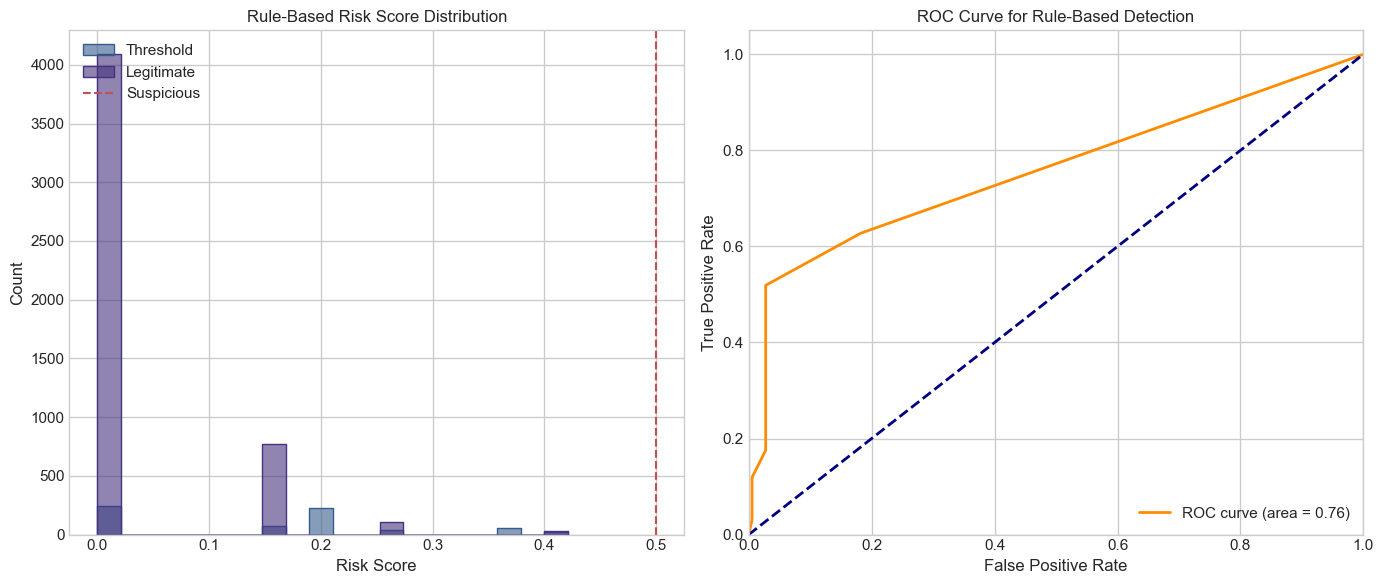

In [123]:
def rule_based_detection(df):
    """
    Apply rule-based detection to identify suspicious transactions
    
    Rules:
    1. Large transactions (above 95th percentile)
    2. Structured transactions (just below reporting thresholds)
    3. Rapid succession of transactions
    4. Unusual sector-province combinations
    5. High deviation from typical behavior
    """
    # Create a copy of the dataframe
    result_df = df.copy()
    
    # Initialize risk scores
    result_df['rule_risk_score'] = 0.0
    
    # Rule 1: Large transactions
    threshold_95 = result_df['transaction_amount'].quantile(0.95)
    result_df.loc[result_df['transaction_amount'] > threshold_95, 'rule_risk_score'] += 0.4
    
    # Rule 2: Structured transactions (just below reporting thresholds)
    # Typical reporting threshold is around $10,000
    mask = (result_df['transaction_amount'] > 9000) & (result_df['transaction_amount'] < 10000)
    result_df.loc[mask, 'rule_risk_score'] += 0.5
    
    # Rule 3: Rapid succession transactions (if applicable)
    if 'daily_tx_count' in result_df.columns:
        high_frequency = result_df['daily_tx_count'].quantile(0.9)
        result_df.loc[result_df['daily_tx_count'] > high_frequency, 'rule_risk_score'] += 0.3
    
    # Rule 4: Unusual sector-province combinations (using statistical rarity)
    if 'province' in result_df.columns and 'sector' in result_df.columns:
        # Calculate frequency of each sector-province combination
        sector_province_counts = result_df.groupby(['sector', 'province']).size().reset_index(name='count')
        sector_province_counts['frequency'] = sector_province_counts['count'] / len(result_df)
        
        # Join back to original dataframe
        sector_province_map = sector_province_counts.set_index(['sector', 'province'])['frequency'].to_dict()
        result_df['combo_frequency'] = result_df.apply(lambda row: sector_province_map.get((row['sector'], row['province']), 0), axis=1)
        
        # Flag rare combinations
        result_df.loc[result_df['combo_frequency'] < 0.01, 'rule_risk_score'] += 0.3
    
    # Rule 5: High deviation from typical behavior (if applicable)
    if 'amount_std_deviation' in result_df.columns:
        result_df.loc[result_df['amount_std_deviation'] > 3, 'rule_risk_score'] += 0.4
    
    # Normalize risk score to 0-1 range
    max_possible_score = 1.9  # Sum of all individual scores
    result_df['rule_risk_score'] = result_df['rule_risk_score'] / max_possible_score
    result_df['rule_risk_score'] = result_df['rule_risk_score'].clip(0, 1)
    
    # Flag transactions with risk score above threshold
    rule_threshold = 0.5
    result_df['rule_suspicious'] = (result_df['rule_risk_score'] >= rule_threshold).astype(int)
    
    return result_df

# Apply rule-based detection to the encoded dataframe (before get_dummies)
rule_results = rule_based_detection(combined_df)

# Evaluate rule-based detection
rule_accuracy = (rule_results['rule_suspicious'] == rule_results['is_suspicious']).mean()
print(f"Rule-based detection accuracy: {rule_accuracy:.4f}")

# Create confusion matrix
rule_cm = confusion_matrix(rule_results['is_suspicious'], rule_results['rule_suspicious'])
rule_report = classification_report(rule_results['is_suspicious'], rule_results['rule_suspicious'])

print("\nRule-based detection confusion matrix:")
print(rule_cm)
print("\nRule-based detection classification report:")
print(rule_report)

# Visualize the rule-based detection results
plt.figure(figsize=(14, 6))

# Plot risk score distribution by actual class
plt.subplot(1, 2, 1)
sns.histplot(data=rule_results, x='rule_risk_score', hue='is_suspicious', 
             bins=20, alpha=0.6, element='step', common_norm=False)
plt.axvline(x=0.5, color='r', linestyle='--')
plt.title('Rule-Based Risk Score Distribution')
plt.xlabel('Risk Score')
plt.ylabel('Count')
plt.legend(['Threshold', 'Legitimate', 'Suspicious'])

# Plot ROC curve for rule-based detection
plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(rule_results['is_suspicious'], rule_results['rule_risk_score'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Rule-Based Detection')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

## 3.4 Anomaly Detection Models

Next, we'll implement unsupervised anomaly detection methods to identify unusual transactions that deviate from normal patterns. These methods are useful because money laundering activities often appear as outliers in the data.

Training Isolation Forest model...
Isolation Forest accuracy: 0.8438

Isolation Forest confusion matrix:
[[1378  122]
 [ 143   54]]

Isolation Forest classification report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1500
           1       0.31      0.27      0.29       197

    accuracy                           0.84      1697
   macro avg       0.61      0.60      0.60      1697
weighted avg       0.84      0.84      0.84      1697


Training Local Outlier Factor model...
LOF accuracy: 0.8839

LOF confusion matrix:
[[1500    0]
 [ 197    0]]

LOF classification report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1500
           1       0.00      0.00      0.00       197

    accuracy                           0.88      1697
   macro avg       0.44      0.50      0.47      1697
weighted avg       0.78      0.88      0.83      1697

LOF ROC AUC: 0.8913

Adjusting LOF

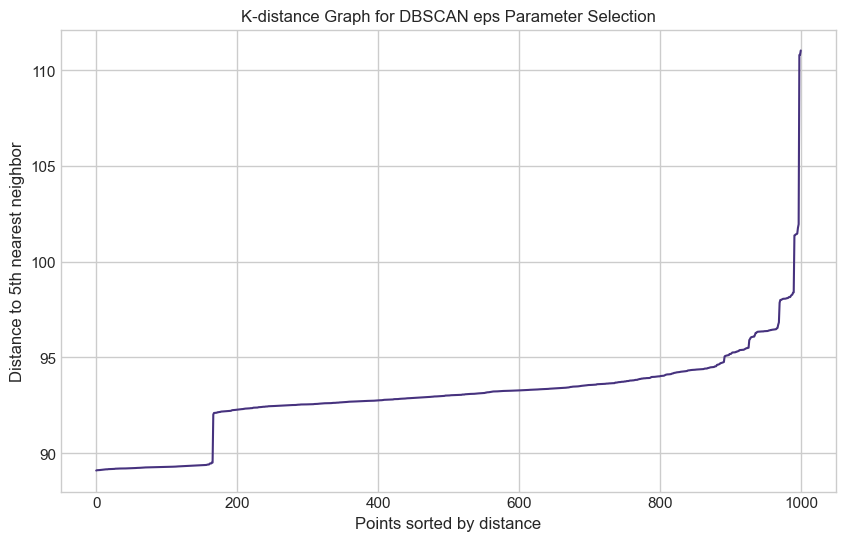

Selected eps value: 95.1809
Improved DBSCAN cluster distribution:
 0     3576
-1      297
 9        5
 16       5
 15       5
 14       5
 13       5
 12       5
 11       5
 10       5
 8        5
 1        5
 7        5
 6        5
 5        5
 4        5
 3        5
 2        5
 17       5
Name: count, dtype: int64
Outliers detected: 297 (7.50%)
Silhouette Score: 0.0226

DBSCAN-based detection accuracy: 0.9128

DBSCAN-based detection confusion matrix:
[[1426   74]
 [  74  123]]

DBSCAN-based detection classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1500
           1       0.62      0.62      0.62       197

    accuracy                           0.91      1697
   macro avg       0.79      0.79      0.79      1697
weighted avg       0.91      0.91      0.91      1697

DBSCAN ROC AUC: 0.7007


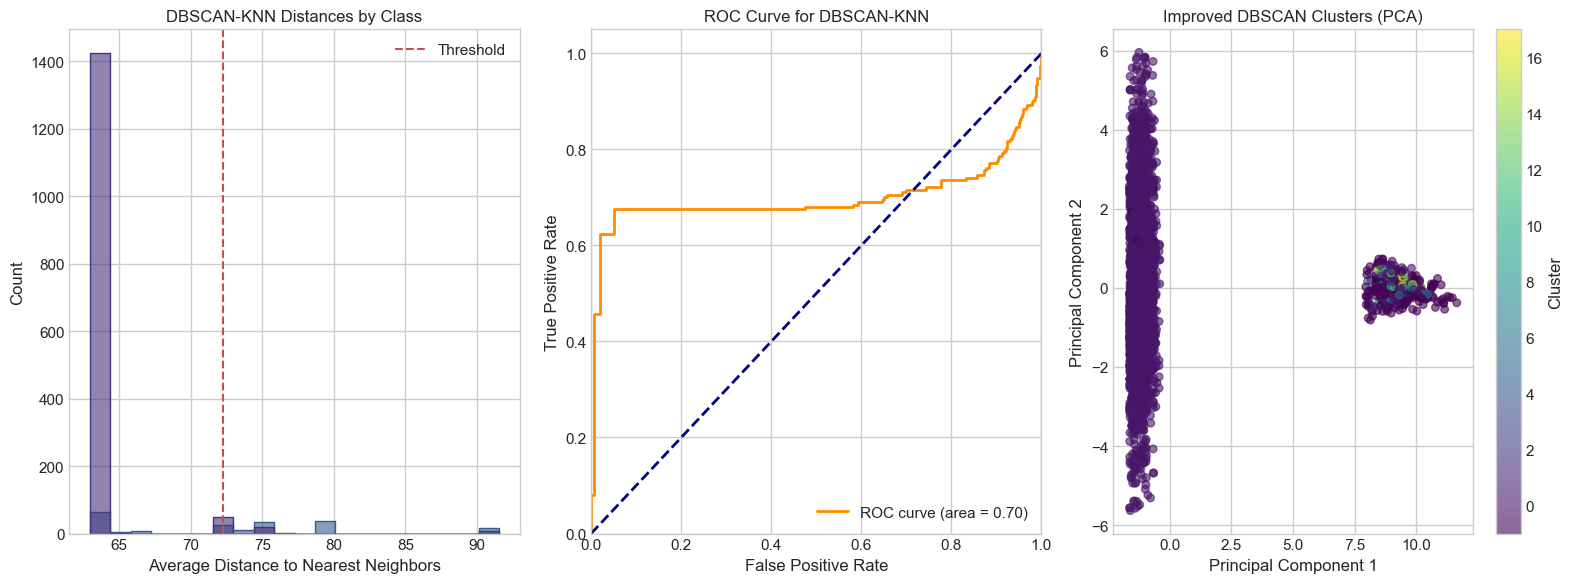

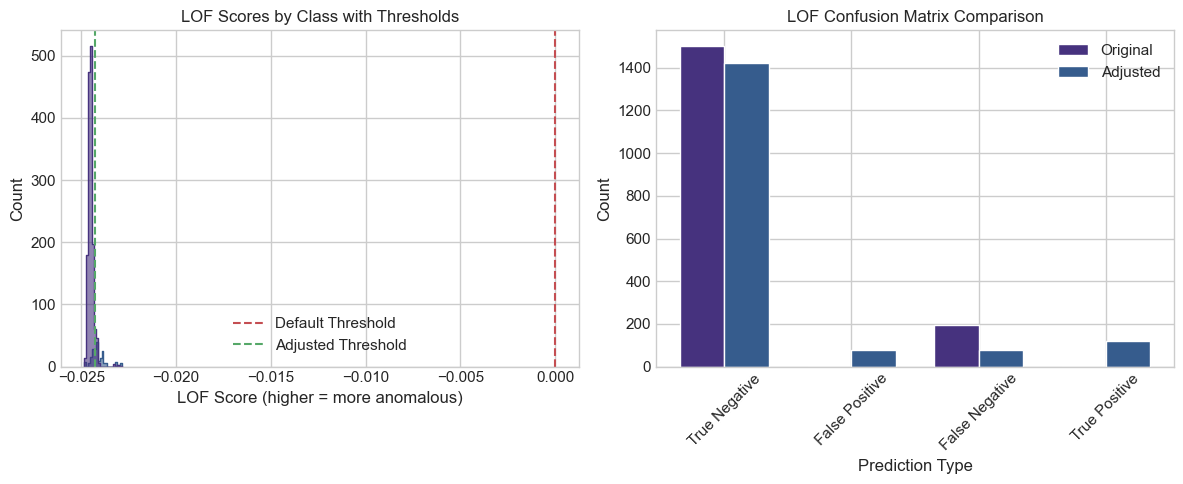

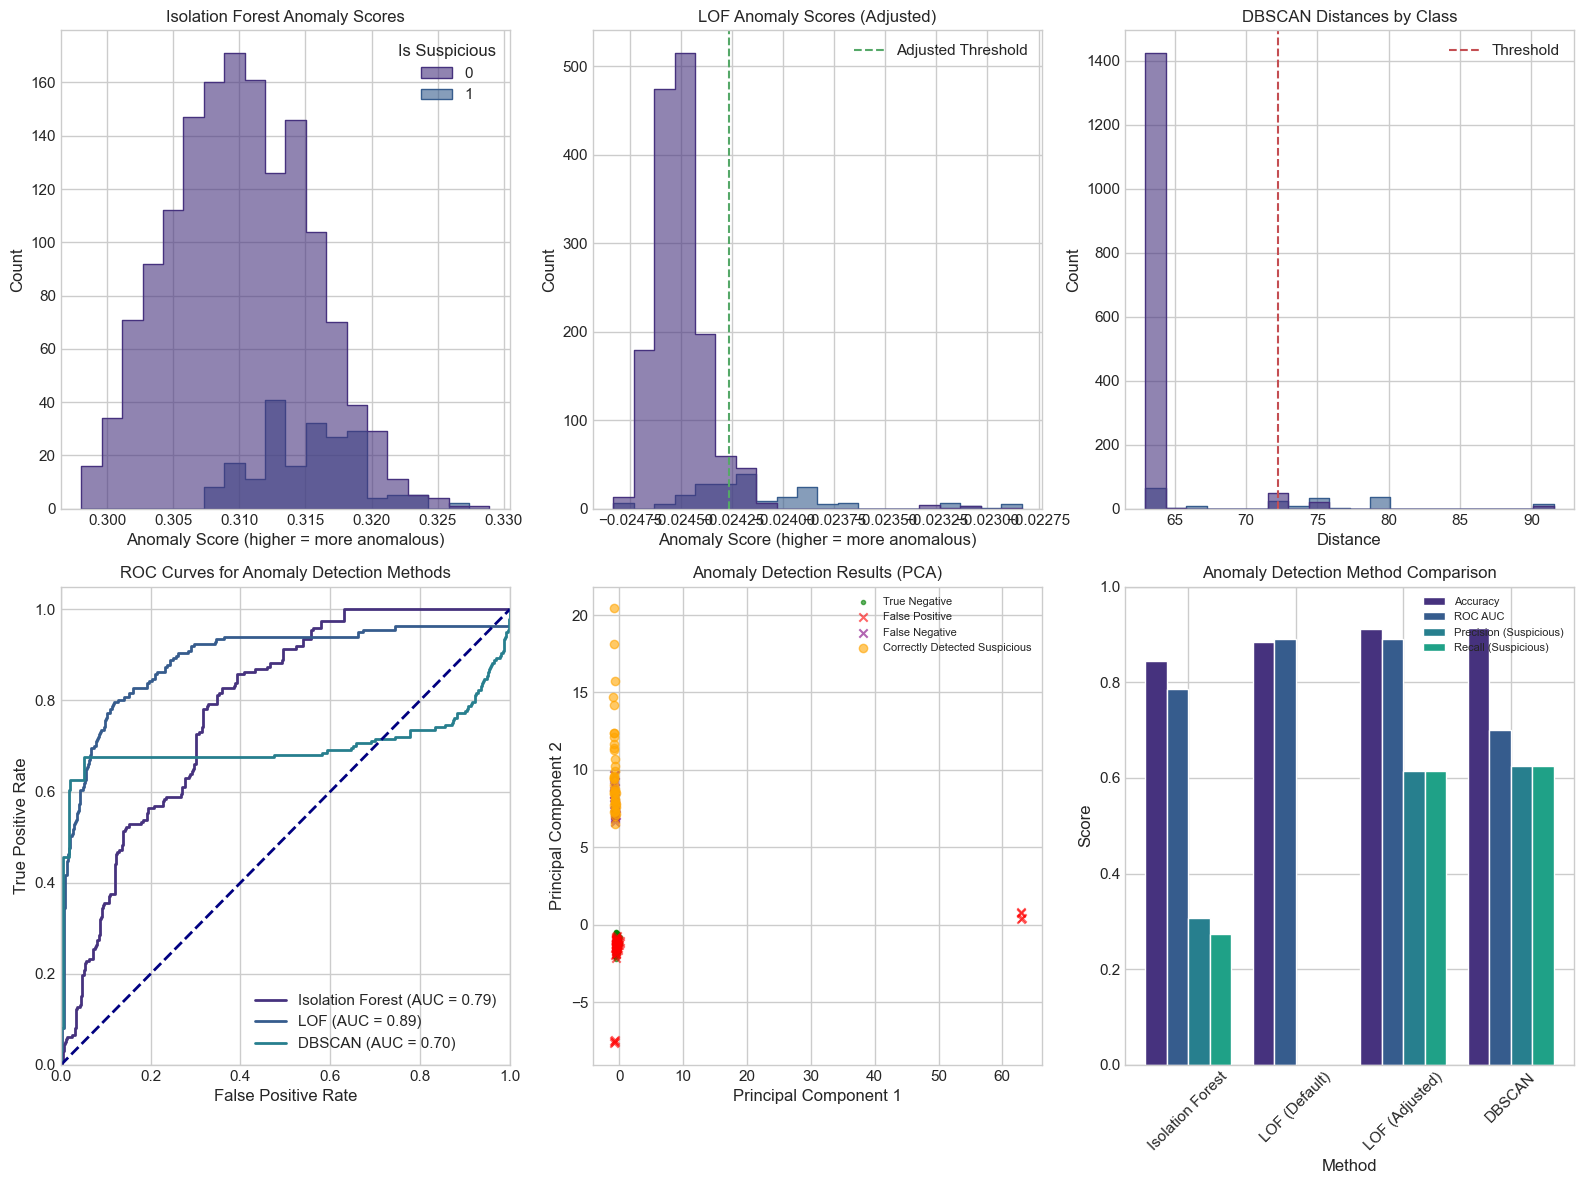


Comparison of Anomaly Detection Methods:
             Method  Accuracy   ROC AUC  Precision (Suspicious)  \
0  Isolation Forest  0.843842  0.786525                0.306818   
1     LOF (Default)  0.883913  0.891296                0.000000   
2    LOF (Adjusted)  0.910430  0.891296                0.614213   
3            DBSCAN  0.912787  0.700667                0.624365   

   Recall (Suspicious)  F1 Score (Suspicious)  
0             0.274112               0.289544  
1             0.000000               0.000000  
2             0.614213               0.614213  
3             0.624365               0.624365  

Best anomaly detection model based on F1 score: Isolation Forest (F1=0.2895)

Best anomaly detection model based on F1 score: LOF Adjusted (F1=0.6142)

Best anomaly detection model based on F1 score: DBSCAN (F1=0.6244)


In [130]:
# 3.4 Anomaly Detection Models

# 1. Isolation Forest for Anomaly Detection
print("Training Isolation Forest model...")
iso_forest = IsolationForest(
    contamination=y_train.mean(),  # Set contamination to match known suspicious rate
    random_state=42,
    n_estimators=100
)

# Fit the model
iso_forest.fit(X_train_scaled)

# Predict anomalies
# Note: Isolation Forest returns -1 for anomalies and 1 for normal data
y_pred_iso = (iso_forest.predict(X_test_scaled) == -1).astype(int)

# Calculate anomaly scores (higher score = more normal)
anomaly_scores = iso_forest.score_samples(X_test_scaled)
# Convert to anomaly score (higher score = more anomalous)
anomaly_scores = -anomaly_scores

# Evaluate Isolation Forest
iso_accuracy = (y_pred_iso == y_test).mean()
print(f"Isolation Forest accuracy: {iso_accuracy:.4f}")

iso_cm = confusion_matrix(y_test, y_pred_iso)
iso_report = classification_report(y_test, y_pred_iso)

print("\nIsolation Forest confusion matrix:")
print(iso_cm)
print("\nIsolation Forest classification report:")
print(iso_report)

# 2. Local Outlier Factor for Anomaly Detection
print("\nTraining Local Outlier Factor model...")
from sklearn.neighbors import LocalOutlierFactor

# Initialize LOF
# Use contamination parameter similar to Isolation Forest
lof = LocalOutlierFactor(n_neighbors=20, contamination=y_train.mean(), novelty=False)

# Fit LOF and get predictions (LOF uses -1 for anomalies, 1 for normal data)
y_pred_lof_train = lof.fit_predict(X_train_scaled)
lof_anomaly_train = (y_pred_lof_train == -1).astype(int)

# LOF doesn't have a predict method for new data if novelty=False
# So we need to train another model for scoring test data
lof_test = LocalOutlierFactor(n_neighbors=20, contamination=y_train.mean(), novelty=True)
lof_test.fit(X_train_scaled)

# Get anomaly scores for test data (negative scores, more negative = more anomalous)
lof_scores = lof_test.decision_function(X_test_scaled) * -1  # Invert so higher = more anomalous

# Predict anomalies on test set
y_pred_lof = (lof_scores > 0).astype(int)  # Default threshold at 0

# Evaluate LOF with default threshold
lof_accuracy = (y_pred_lof == y_test).mean()
print(f"LOF accuracy: {lof_accuracy:.4f}")

lof_cm = confusion_matrix(y_test, y_pred_lof)
lof_report = classification_report(y_test, y_pred_lof)

print("\nLOF confusion matrix:")
print(lof_cm)
print("\nLOF classification report:")
print(lof_report)

# Calculate ROC curve
fpr_lof, tpr_lof, _ = roc_curve(y_test, lof_scores)
roc_auc_lof = auc(fpr_lof, tpr_lof)
print(f"LOF ROC AUC: {roc_auc_lof:.4f}")

# Adjust LOF threshold based on known suspicious rate
suspicious_rate = y_test.mean()
threshold_percentile = 100 * (1 - suspicious_rate)
lof_threshold = np.percentile(lof_scores, threshold_percentile)
print(f"\nAdjusting LOF threshold based on suspicious rate ({suspicious_rate:.2%}): {lof_threshold:.4f}")

# Apply the adjusted threshold
y_pred_lof_adjusted = (lof_scores > lof_threshold).astype(int)

# Evaluate with adjusted threshold
lof_adjusted_accuracy = (y_pred_lof_adjusted == y_test).mean()
print(f"LOF adjusted accuracy: {lof_adjusted_accuracy:.4f}")

lof_adjusted_cm = confusion_matrix(y_test, y_pred_lof_adjusted)
lof_adjusted_report = classification_report(y_test, y_pred_lof_adjusted)

print("\nLOF adjusted confusion matrix:")
print(lof_adjusted_cm)
print("\nLOF adjusted classification report:")
print(lof_adjusted_report)

# 3. Improved DBSCAN Clustering for Anomaly Detection
print("\nTraining improved DBSCAN model...")

# Use nearest neighbors to estimate eps parameter
from sklearn.neighbors import NearestNeighbors

# Sample a subset of data if it's very large (for efficiency)
sample_size = min(1000, X_train_scaled.shape[0])
sample_indices = np.random.choice(X_train_scaled.shape[0], sample_size, replace=False)
X_sample = X_train_scaled[sample_indices]

# Calculate distances to k nearest neighbors
k = 5
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_sample)
distances, indices = neigh.kneighbors(X_sample)

# Sort and plot k-distance graph to find the "elbow"
k_distances = np.sort(distances[:, k-1])
plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {k}th nearest neighbor')
plt.title('K-distance Graph for DBSCAN eps Parameter Selection')
plt.grid(True)
plt.show()

# Use percentile approach to determine eps
# This selects a good eps value based on the distribution of distances
eps_value = np.percentile(k_distances, 90)  # 90th percentile
print(f"Selected eps value: {eps_value:.4f}")

# Try DBSCAN with the new eps value
dbscan_improved = DBSCAN(eps=eps_value, min_samples=5)
clusters_improved = dbscan_improved.fit_predict(X_train_scaled)

# Count samples in each cluster
cluster_counts = pd.Series(clusters_improved).value_counts()
print("Improved DBSCAN cluster distribution:")
print(cluster_counts)

# Consider outliers as those labeled -1
outliers_mask = (clusters_improved == -1)
print(f"Outliers detected: {outliers_mask.sum()} ({outliers_mask.mean()*100:.2f}%)")

# Initialize variables for use in visualization
dbscan_accuracy = None
fpr_dbscan = None
tpr_dbscan = None
roc_auc_dbscan = None
avg_distances = None
threshold = None
y_pred_dbscan = None

# If we have proper clusters now, proceed with evaluation
if len(np.unique(clusters_improved)) > 1 and np.any(clusters_improved != -1):
    # Filter out the noise points for training
    X_train_clustered = X_train_scaled[clusters_improved != -1]
    y_train_clustered = y_train.iloc[clusters_improved != -1]
    clusters_filtered = clusters_improved[clusters_improved != -1]
    
    # Calculate silhouette score if appropriate
    if len(np.unique(clusters_filtered)) > 1:
        from sklearn.metrics import silhouette_score
        silhouette_avg = silhouette_score(X_train_clustered, clusters_filtered)
        print(f"Silhouette Score: {silhouette_avg:.4f}")
    
    # Train a KNN classifier on DBSCAN labels
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_clustered, clusters_filtered)
    
    # Predict clusters for test set
    test_clusters = knn.predict(X_test_scaled)
    
    # Calculate distances to nearest neighbors
    distances, _ = knn.kneighbors(X_test_scaled)
    avg_distances = distances.mean(axis=1)
    
    # Consider suspicious rate when setting threshold
    threshold_percentile = 100 * (1 - suspicious_rate)
    threshold = np.percentile(avg_distances, threshold_percentile)
    y_pred_dbscan = (avg_distances > threshold).astype(int)
    
    # Evaluate DBSCAN
    dbscan_accuracy = (y_pred_dbscan == y_test).mean()
    print(f"\nDBSCAN-based detection accuracy: {dbscan_accuracy:.4f}")
    
    dbscan_cm = confusion_matrix(y_test, y_pred_dbscan)
    dbscan_report = classification_report(y_test, y_pred_dbscan)
    
    print("\nDBSCAN-based detection confusion matrix:")
    print(dbscan_cm)
    print("\nDBSCAN-based detection classification report:")
    print(dbscan_report)
    
    # Calculate ROC curve
    fpr_dbscan, tpr_dbscan, _ = roc_curve(y_test, avg_distances)
    roc_auc_dbscan = auc(fpr_dbscan, tpr_dbscan)
    print(f"DBSCAN ROC AUC: {roc_auc_dbscan:.4f}")
    
    # Visualize improved DBSCAN results
    plt.figure(figsize=(16, 6))
    
    # Plot distance distribution by class
    plt.subplot(1, 3, 1)
    sns.histplot(data=pd.DataFrame({
        'Distance': avg_distances, 
        'Is Suspicious': y_test
    }), x='Distance', hue='Is Suspicious', bins=20, alpha=0.6, element='step')
    plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
    plt.title('DBSCAN-KNN Distances by Class')
    plt.xlabel('Average Distance to Nearest Neighbors')
    plt.ylabel('Count')
    plt.legend()
    
    # Plot ROC curve for DBSCAN
    plt.subplot(1, 3, 2)
    plt.plot(fpr_dbscan, tpr_dbscan, color='darkorange', lw=2, 
             label=f'ROC curve (area = {roc_auc_dbscan:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for DBSCAN-KNN')
    plt.legend(loc="lower right")
    
    # Plot clusters with PCA
    from sklearn.decomposition import PCA
    plt.subplot(1, 3, 3)
    
    # Use PCA to reduce dimensions for visualization
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_scaled)
    
    # Plot the clusters
    scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], 
                         c=clusters_improved, cmap='viridis', alpha=0.6, s=30)
    plt.colorbar(scatter, label='Cluster')
    plt.title('Improved DBSCAN Clusters (PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    plt.tight_layout()
    plt.show()
else:
    print("Still unable to form proper clusters with DBSCAN. Try different clustering approaches.")
    
    # Compare with Isolation Forest 
    plt.figure(figsize=(12, 5))
    
    # Show ROC curve comparison
    plt.subplot(1, 2, 1)
    plt.plot(fpr_iso, tpr_iso, color='darkorange', lw=2, 
             label=f'Isolation Forest (AUC = {roc_auc_iso:.2f})')
    plt.plot(fpr_lof, tpr_lof, color='blue', lw=2,
             label=f'LOF (AUC = {roc_auc_lof:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend(loc="lower right")
    
    # Show PCA of data colored by true label
    plt.subplot(1, 2, 2)
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_scaled)
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.6, s=30)
    plt.colorbar(label='Is Suspicious')
    plt.title('PCA of Training Data (True Labels)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    plt.tight_layout()
    plt.show()

# Visualize LOF adjustment effect
plt.figure(figsize=(12, 5))

# Plot LOF scores with both thresholds
plt.subplot(1, 2, 1)
sns.histplot(data=pd.DataFrame({
    'LOF Score': lof_scores, 
    'Is Suspicious': y_test
}), x='LOF Score', hue='Is Suspicious', bins=20, alpha=0.6, element='step')
plt.axvline(x=0, color='r', linestyle='--', label='Default Threshold')
plt.axvline(x=lof_threshold, color='g', linestyle='--', label='Adjusted Threshold')
plt.title('LOF Scores by Class with Thresholds')
plt.xlabel('LOF Score (higher = more anomalous)')
plt.ylabel('Count')
plt.legend()

# Compare LOF original vs adjusted predictions
plt.subplot(1, 2, 2)
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
original_cm = confusion_matrix(y_test, y_pred_lof)
adjusted_cm = confusion_matrix(y_test, y_pred_lof_adjusted)

x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, [original_cm[0,0], original_cm[0,1], original_cm[1,0], original_cm[1,1]], 
        width, label='Original')
plt.bar(x + width/2, [adjusted_cm[0,0], adjusted_cm[0,1], adjusted_cm[1,0], adjusted_cm[1,1]], 
        width, label='Adjusted')

plt.xlabel('Prediction Type')
plt.ylabel('Count')
plt.title('LOF Confusion Matrix Comparison')
plt.xticks(x, labels, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Comprehensive visualization of all anomaly detection methods
plt.figure(figsize=(16, 12))

# Plot Isolation Forest anomaly scores by actual class
plt.subplot(2, 3, 1)
sns.histplot(data=pd.DataFrame({
    'Anomaly Score': anomaly_scores, 
    'Is Suspicious': y_test
}), x='Anomaly Score', hue='Is Suspicious', bins=20, alpha=0.6, element='step')
plt.title('Isolation Forest Anomaly Scores')
plt.xlabel('Anomaly Score (higher = more anomalous)')
plt.ylabel('Count')

# Plot LOF anomaly scores with adjusted threshold
plt.subplot(2, 3, 2)
sns.histplot(data=pd.DataFrame({
    'Anomaly Score': lof_scores, 
    'Is Suspicious': y_test
}), x='Anomaly Score', hue='Is Suspicious', bins=20, alpha=0.6, element='step')
plt.axvline(x=lof_threshold, color='g', linestyle='--', label='Adjusted Threshold')
plt.title('LOF Anomaly Scores (Adjusted)')
plt.xlabel('Anomaly Score (higher = more anomalous)')
plt.ylabel('Count')
plt.legend()

# Plot DBSCAN distances by class (if available)
if avg_distances is not None:
    plt.subplot(2, 3, 3)
    sns.histplot(data=pd.DataFrame({
        'Distance': avg_distances, 
        'Is Suspicious': y_test
    }), x='Distance', hue='Is Suspicious', bins=20, alpha=0.6, element='step')
    if threshold is not None:
        plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
    plt.title('DBSCAN Distances by Class')
    plt.xlabel('Distance')
    plt.ylabel('Count')
    plt.legend()

# Plot ROC curves for all anomaly detection methods
plt.subplot(2, 3, 4)
plt.plot(fpr_iso, tpr_iso, lw=2, label=f'Isolation Forest (AUC = {roc_auc_iso:.2f})')
plt.plot(fpr_lof, tpr_lof, lw=2, label=f'LOF (AUC = {roc_auc_lof:.2f})')
if fpr_dbscan is not None and tpr_dbscan is not None:
    plt.plot(fpr_dbscan, tpr_dbscan, lw=2, label=f'DBSCAN (AUC = {roc_auc_dbscan:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Anomaly Detection Methods')
plt.legend(loc="lower right")

# Plot PCA visualization with anomaly predictions
plt.subplot(2, 3, 5)

# Create a sample of test data for visualization
sample_size = min(500, X_test_scaled.shape[0])
sample_indices = np.random.choice(X_test_scaled.shape[0], sample_size, replace=False)
X_test_sample = X_test_scaled[sample_indices]
y_test_sample = y_test.iloc[sample_indices]
y_pred_iso_sample = y_pred_iso[sample_indices]
y_pred_lof_sample = y_pred_lof_adjusted[sample_indices]  # Use adjusted LOF predictions

# Use PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_sample)

# Mark points by prediction status
correct_detection = (y_test_sample == 1) & ((y_pred_iso_sample == 1) | (y_pred_lof_sample == 1))
false_negative = (y_test_sample == 1) & (y_pred_iso_sample == 0) & (y_pred_lof_sample == 0)
false_positive = (y_test_sample == 0) & ((y_pred_iso_sample == 1) | (y_pred_lof_sample == 1))
true_negative = (y_test_sample == 0) & (y_pred_iso_sample == 0) & (y_pred_lof_sample == 0)

# Plot with different colors for each category
plt.scatter(X_test_pca[true_negative, 0], X_test_pca[true_negative, 1], 
            c='green', marker='.', alpha=0.6, label='True Negative')
plt.scatter(X_test_pca[false_positive, 0], X_test_pca[false_positive, 1], 
            c='red', marker='x', alpha=0.6, label='False Positive')
plt.scatter(X_test_pca[false_negative, 0], X_test_pca[false_negative, 1], 
            c='purple', marker='x', alpha=0.6, label='False Negative')
plt.scatter(X_test_pca[correct_detection, 0], X_test_pca[correct_detection, 1], 
            c='orange', marker='o', alpha=0.6, label='Correctly Detected Suspicious')

plt.title('Anomaly Detection Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best', fontsize=8)

# Prepare comparison data for all methods
methods = ['Isolation Forest', 'LOF (Default)', 'LOF (Adjusted)']
accuracies = [
    iso_accuracy, 
    lof_accuracy, 
    lof_adjusted_accuracy
]
roc_aucs = [
    roc_auc_iso, 
    roc_auc_lof, 
    roc_auc_lof  # Same ROC AUC for adjusted LOF (only threshold changes)
]
precisions = [
    classification_report(y_test, y_pred_iso, output_dict=True)['1']['precision'],
    classification_report(y_test, y_pred_lof, output_dict=True)['1']['precision'] if '1' in classification_report(y_test, y_pred_lof, output_dict=True) else 0,
    classification_report(y_test, y_pred_lof_adjusted, output_dict=True)['1']['precision'] if '1' in classification_report(y_test, y_pred_lof_adjusted, output_dict=True) else 0
]
recalls = [
    classification_report(y_test, y_pred_iso, output_dict=True)['1']['recall'],
    classification_report(y_test, y_pred_lof, output_dict=True)['1']['recall'] if '1' in classification_report(y_test, y_pred_lof, output_dict=True) else 0,
    classification_report(y_test, y_pred_lof_adjusted, output_dict=True)['1']['recall'] if '1' in classification_report(y_test, y_pred_lof_adjusted, output_dict=True) else 0
]

# Add DBSCAN if available
if dbscan_accuracy is not None and y_pred_dbscan is not None:
    methods.append('DBSCAN')
    accuracies.append(dbscan_accuracy)
    roc_aucs.append(roc_auc_dbscan)
    precisions.append(classification_report(y_test, y_pred_dbscan, output_dict=True)['1']['precision'] if '1' in classification_report(y_test, y_pred_dbscan, output_dict=True) else 0)
    recalls.append(classification_report(y_test, y_pred_dbscan, output_dict=True)['1']['recall'] if '1' in classification_report(y_test, y_pred_dbscan, output_dict=True) else 0)

# Create bar chart comparing methods
plt.subplot(2, 3, 6)
x = np.arange(len(methods))
width = 0.2

plt.bar(x - width*1.5, accuracies, width, label='Accuracy')
plt.bar(x - width/2, roc_aucs, width, label='ROC AUC')
plt.bar(x + width/2, precisions, width, label='Precision (Suspicious)')
plt.bar(x + width*1.5, recalls, width, label='Recall (Suspicious)')

plt.xlabel('Method')
plt.ylabel('Score')
plt.title('Anomaly Detection Method Comparison')
plt.xticks(x, methods, rotation=45)
plt.legend(loc='best', fontsize=8)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Compare the anomaly detection methods in a table
f1_scores = []
for p, r in zip(precisions, recalls):
    if p + r > 0:
        f1_scores.append(2 * (p * r) / (p + r))
    else:
        f1_scores.append(0)

methods_comparison = pd.DataFrame({
    'Method': methods,
    'Accuracy': accuracies,
    'ROC AUC': roc_aucs,
    'Precision (Suspicious)': precisions,
    'Recall (Suspicious)': recalls,
    'F1 Score (Suspicious)': f1_scores
})

print("\nComparison of Anomaly Detection Methods:")
print(methods_comparison)

# Store the best performing model predictions for use in the ensemble
# Based on F1 score for the suspicious class
best_anomaly_preds = None
best_anomaly_scores = None
best_f1 = 0

# Compare F1 scores to find the best model
if f1_scores[0] > best_f1:  # Isolation Forest
    best_anomaly_preds = y_pred_iso
    best_anomaly_scores = anomaly_scores
    best_f1 = f1_scores[0]
    print(f"\nBest anomaly detection model based on F1 score: Isolation Forest (F1={best_f1:.4f})")

if f1_scores[2] > best_f1:  # LOF Adjusted
    best_anomaly_preds = y_pred_lof_adjusted
    best_anomaly_scores = lof_scores
    best_f1 = f1_scores[2]
    print(f"\nBest anomaly detection model based on F1 score: LOF Adjusted (F1={best_f1:.4f})")

if dbscan_accuracy is not None and len(f1_scores) > 3 and f1_scores[3] > best_f1:  # DBSCAN
    best_anomaly_preds = y_pred_dbscan
    best_anomaly_scores = avg_distances
    best_f1 = f1_scores[3]
    print(f"\nBest anomaly detection model based on F1 score: DBSCAN (F1={best_f1:.4f})")

## 3.5 Supervised Machine Learning Models

Now we'll implement supervised machine learning models to classify transactions as suspicious or legitimate. These models learn from the labeled data we've created.


Training Logistic Regression...
Logistic Regression accuracy: 1.0000
Logistic Regression ROC AUC: 1.0000
Logistic Regression PR AUC: 1.0000

Confusion Matrix:
[[1500    0]
 [   0  197]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1500
           1       1.00      1.00      1.00       197

    accuracy                           1.00      1697
   macro avg       1.00      1.00      1.00      1697
weighted avg       1.00      1.00      1.00      1697


Training Random Forest...
Random Forest accuracy: 1.0000
Random Forest ROC AUC: 1.0000
Random Forest PR AUC: 1.0000

Confusion Matrix:
[[1500    0]
 [   0  197]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1500
           1       1.00      1.00      1.00       197

    accuracy                           1.00      1697
   macro avg       1.00      1.00      1.00      1697
wei

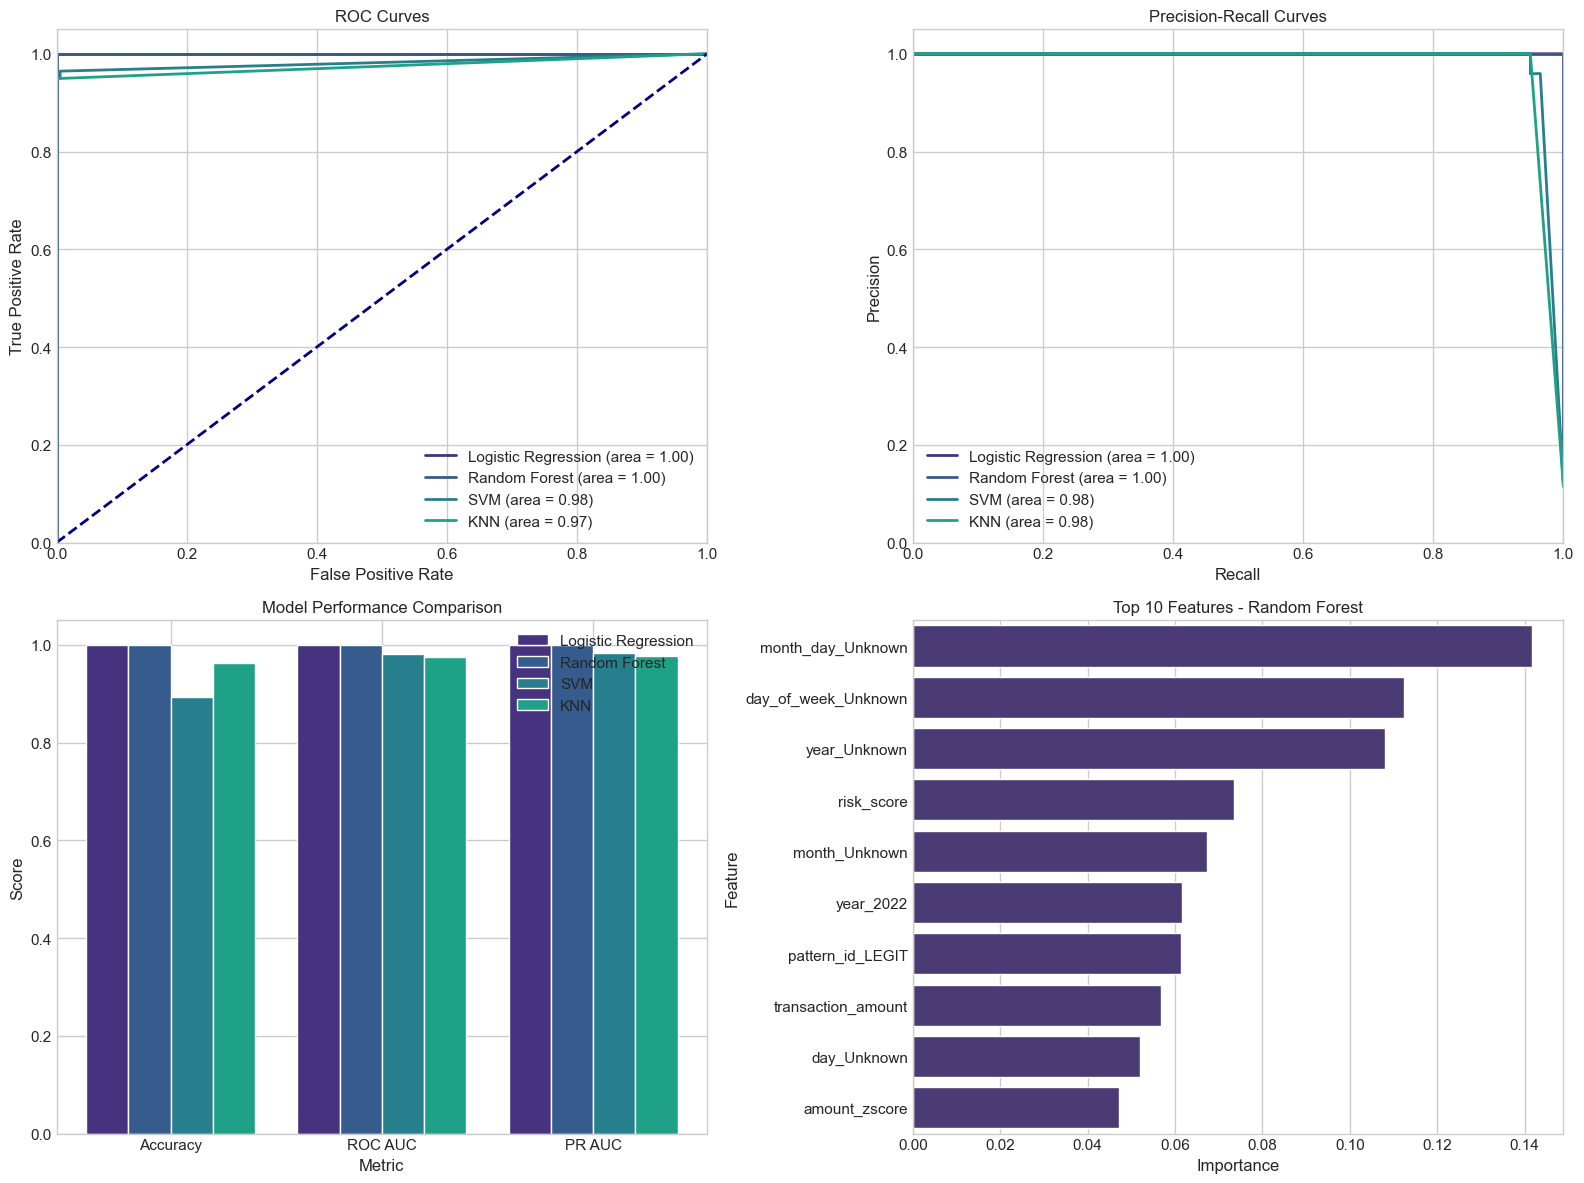

In [135]:
# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Dictionary to store results
model_results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Get probability predictions if available
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        # For models without predict_proba (like some SVM configurations)
        y_pred_proba = model.decision_function(X_test_scaled) if hasattr(model, 'decision_function') else y_pred
    
    # Evaluate the model
    accuracy = (y_pred == y_test).mean()
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Calculate Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    
    # Store results
    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'classification_report': report,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'precision': precision,
        'recall': recall,
        'pr_auc': pr_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    # Print evaluation metrics
    print(f"{name} accuracy: {accuracy:.4f}")
    print(f"{name} ROC AUC: {roc_auc:.4f}")
    print(f"{name} PR AUC: {pr_auc:.4f}")
    print(f"\nConfusion Matrix:")
    print(cm)
    print(f"\nClassification Report:")
    print(report)

# Visualize model results
plt.figure(figsize=(16, 12))

# Plot ROC curves
plt.subplot(2, 2, 1)
for name, results in model_results.items():
    plt.plot(results['fpr'], results['tpr'], lw=2, 
             label=f"{name} (area = {results['roc_auc']:.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")

# Plot Precision-Recall curves
plt.subplot(2, 2, 2)
for name, results in model_results.items():
    plt.plot(results['recall'], results['precision'], lw=2, 
             label=f"{name} (area = {results['pr_auc']:.2f})")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")

# Bar chart of model performance metrics
plt.subplot(2, 2, 3)
metrics = ['accuracy', 'roc_auc', 'pr_auc']
metric_names = ['Accuracy', 'ROC AUC', 'PR AUC']
x = np.arange(len(metrics))
width = 0.2
i = 0

for name, results in model_results.items():
    values = [results[metric] for metric in metrics]
    plt.bar(x + i*width, values, width, label=name)
    i += 1

plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x + width*1.5, metric_names)
plt.legend()

# Feature importance (for Random Forest)
if 'Random Forest' in model_results:
    plt.subplot(2, 2, 4)
    rf_model = model_results['Random Forest']['model']
    
    # Get feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False).head(10)
    
    # Plot feature importance
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Top 10 Features - Random Forest')
    plt.tight_layout()

plt.tight_layout()
plt.show()

## 3.6 Network Analysis for Money Laundering Detection

Let's implement network analysis techniques to identify suspicious networks and relationships between entities. This approach is particularly effective for detecting complex money laundering schemes.

Building transaction network...
Network created with 16 nodes and 60 edges

Calculating network metrics...

Extracting suspicious subnetworks...
Suspicious subgraph has 16 nodes and 56 edges
Skipping community detection - 'community' package not available


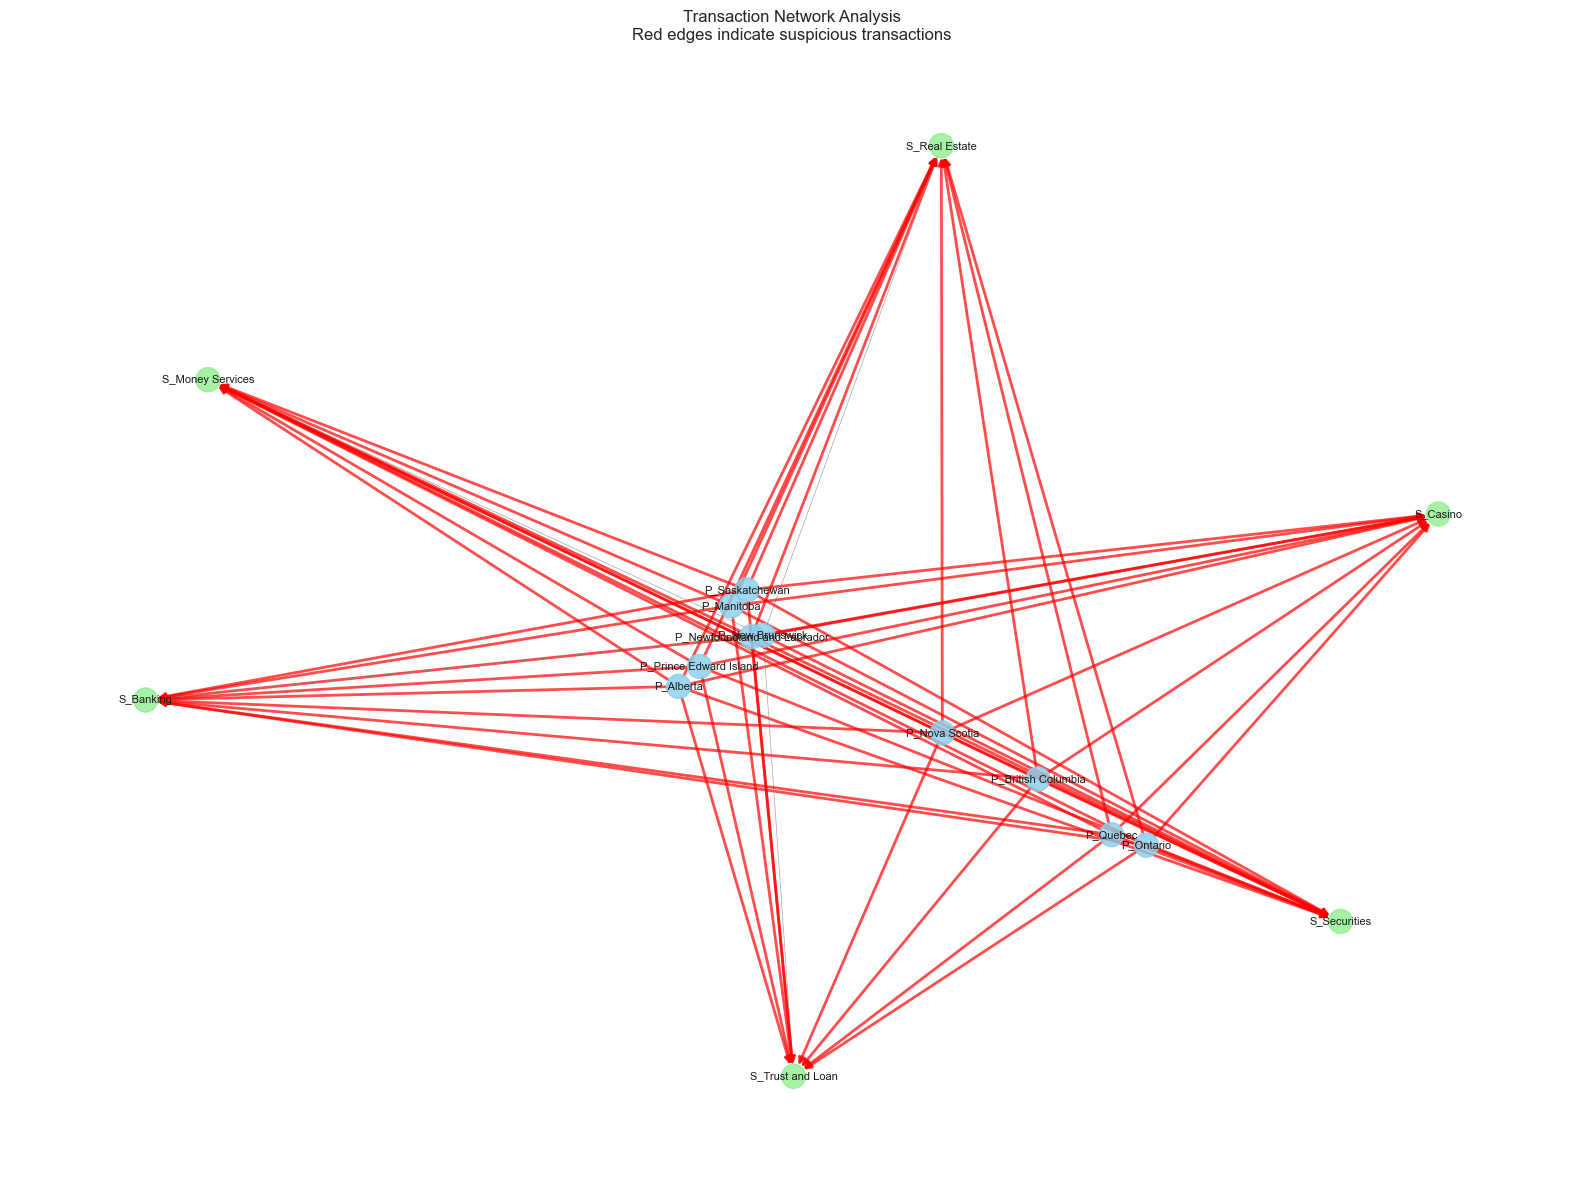

In [140]:
# Create a transaction network
print("Building transaction network...")

# Reset index for combined_df to use numerical index for node references
network_df = combined_df.reset_index()

# Create a directed graph
G = nx.DiGraph()

# We'll use province and sector as proxy for entities for this example
# In a real system, you would have actual entity IDs (customers, accounts, etc.)

# Add nodes for each unique province and sector
provinces = network_df['province'].unique()
sectors = network_df['sector'].unique()

for province in provinces:
    G.add_node(f"P_{province}", node_type='province')

for sector in sectors:
    G.add_node(f"S_{sector}", node_type='sector')

# Add edges for each transaction
for idx, row in network_df.iterrows():
    source = f"P_{row['province']}"
    target = f"S_{row['sector']}"
    
    # Add the edge with transaction amount as weight
    if G.has_edge(source, target):
        # If edge exists, update weight
        G[source][target]['weight'] += row['transaction_amount']
        G[source][target]['count'] += 1
        G[source][target]['transactions'].append(idx)
    else:
        # Create new edge
        G.add_edge(source, target, 
                   weight=row['transaction_amount'], 
                   count=1, 
                   transactions=[idx])

print(f"Network created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

# Calculate network metrics
print("\nCalculating network metrics...")

# Calculate degree centrality
in_degree_centrality = nx.in_degree_centrality(G)
out_degree_centrality = nx.out_degree_centrality(G)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate PageRank
pagerank = nx.pagerank(G)

# Add network metrics to nodes
for node in G.nodes():
    G.nodes[node]['in_degree_centrality'] = in_degree_centrality[node]
    G.nodes[node]['out_degree_centrality'] = out_degree_centrality[node]
    G.nodes[node]['betweenness_centrality'] = betweenness_centrality[node]
    G.nodes[node]['pagerank'] = pagerank[node]

# Extract suspicious subnetworks
print("\nExtracting suspicious subnetworks...")

# Find transactions involved in suspicious patterns
suspicious_txs = set(network_df[network_df['is_suspicious'] == 1].index)

# Create a subgraph of suspicious transactions
suspicious_edges = []
for u, v, data in G.edges(data=True):
    if any(tx in suspicious_txs for tx in data['transactions']):
        suspicious_edges.append((u, v, data))

suspicious_subgraph = G.edge_subgraph([(u, v) for u, v, _ in suspicious_edges])
print(f"Suspicious subgraph has {suspicious_subgraph.number_of_nodes()} nodes and {suspicious_subgraph.number_of_edges()} edges")

# Identify communities using the Louvain algorithm
try:
    import community as community_louvain
    
    # Convert to undirected for community detection
    G_undirected = G.to_undirected()
    
    # Detect communities
    partition = community_louvain.best_partition(G_undirected)
    
    # Add community information to nodes
    for node, community_id in partition.items():
        G.nodes[node]['community'] = community_id
    
    print(f"Detected {len(set(partition.values()))} communities in the network")
    
    # Calculate suspiciousness score for each community
    community_suspicion = {}
    for comm_id in set(partition.values()):
        # Get nodes in this community
        community_nodes = [node for node, comm in partition.items() if comm == comm_id]
        
        # Get all edges between these nodes
        community_edges = []
        for u, v, data in G.edges(data=True):
            if u in community_nodes and v in community_nodes:
                community_edges.append((u, v, data))
        
        # Calculate suspicion score based on suspicious transactions
        total_txs = sum(len(data['transactions']) for _, _, data in community_edges)
        suspicious_count = sum(
            sum(1 for tx in data['transactions'] if tx in suspicious_txs) 
            for _, _, data in community_edges
        )
        
        suspicion_score = suspicious_count / total_txs if total_txs > 0 else 0
        community_suspicion[comm_id] = suspicion_score
    
    # Print communities by suspicion score
    print("\nCommunities ranked by suspicion score:")
    for comm_id, score in sorted(community_suspicion.items(), key=lambda x: x[1], reverse=True):
        node_count = sum(1 for node, comm in partition.items() if comm == comm_id)
        print(f"Community {comm_id}: {score:.4f} suspicion score, {node_count} nodes")
    
except ImportError:
    print("Skipping community detection - 'community' package not available")

# Visualize the transaction network
plt.figure(figsize=(16, 12))

# Set up the layout
pos = nx.spring_layout(G, seed=42)

# Prepare node colors based on type
node_colors = []
for node in G.nodes():
    if node.startswith('P_'):
        node_colors.append('skyblue')
    else:
        node_colors.append('lightgreen')

# Prepare edge colors based on suspiciousness
edge_colors = []
edge_widths = []
for u, v, data in G.edges(data=True):
    if any(tx in suspicious_txs for tx in data['transactions']):
        edge_colors.append('red')
        edge_widths.append(2)
    else:
        edge_colors.append('gray')
        edge_widths.append(0.5)

# Draw the network
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=300, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')

plt.title('Transaction Network Analysis\nRed edges indicate suspicious transactions')
plt.axis('off')
plt.tight_layout()
plt.show()

# If community detection was successful, visualize communities
if 'partition' in locals():
    plt.figure(figsize=(16, 12))
    
    # Color nodes by community
    community_colors = [partition[node] for node in G.nodes()]
    
    # Draw the network with community colors
    nx.draw_networkx(G, pos, node_color=community_colors, 
                    node_size=300, alpha=0.8, 
                    edge_color='gray', width=0.5, 
                    font_size=8, font_family='sans-serif',
                    cmap=plt.cm.rainbow)
    
    plt.title('Network Communities')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

## 3.7 Ensemble Model for AML Detection

We'll now combine the insights from our various approaches to create an ensemble model for more robust detection of suspicious transactions.

Building ensemble model for AML detection...
Ensemble model accuracy: 1.0000
Ensemble model ROC AUC: 1.0000
Ensemble model PR AUC: 1.0000

Ensemble model confusion matrix:
[[1500    0]
 [   0  197]]

Ensemble model classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1500
           1       1.00      1.00      1.00       197

    accuracy                           1.00      1697
   macro avg       1.00      1.00      1.00      1697
weighted avg       1.00      1.00      1.00      1697


Ensemble model feature importance:
                  Feature    Importance
3     logistic_regression  5.832650e-01
2           random_forest  4.167350e-01
1        isolation_forest  2.440792e-15
0              rule_based  0.000000e+00
4  avg_neighbor_suspicion  0.000000e+00
5     community_suspicion  0.000000e+00


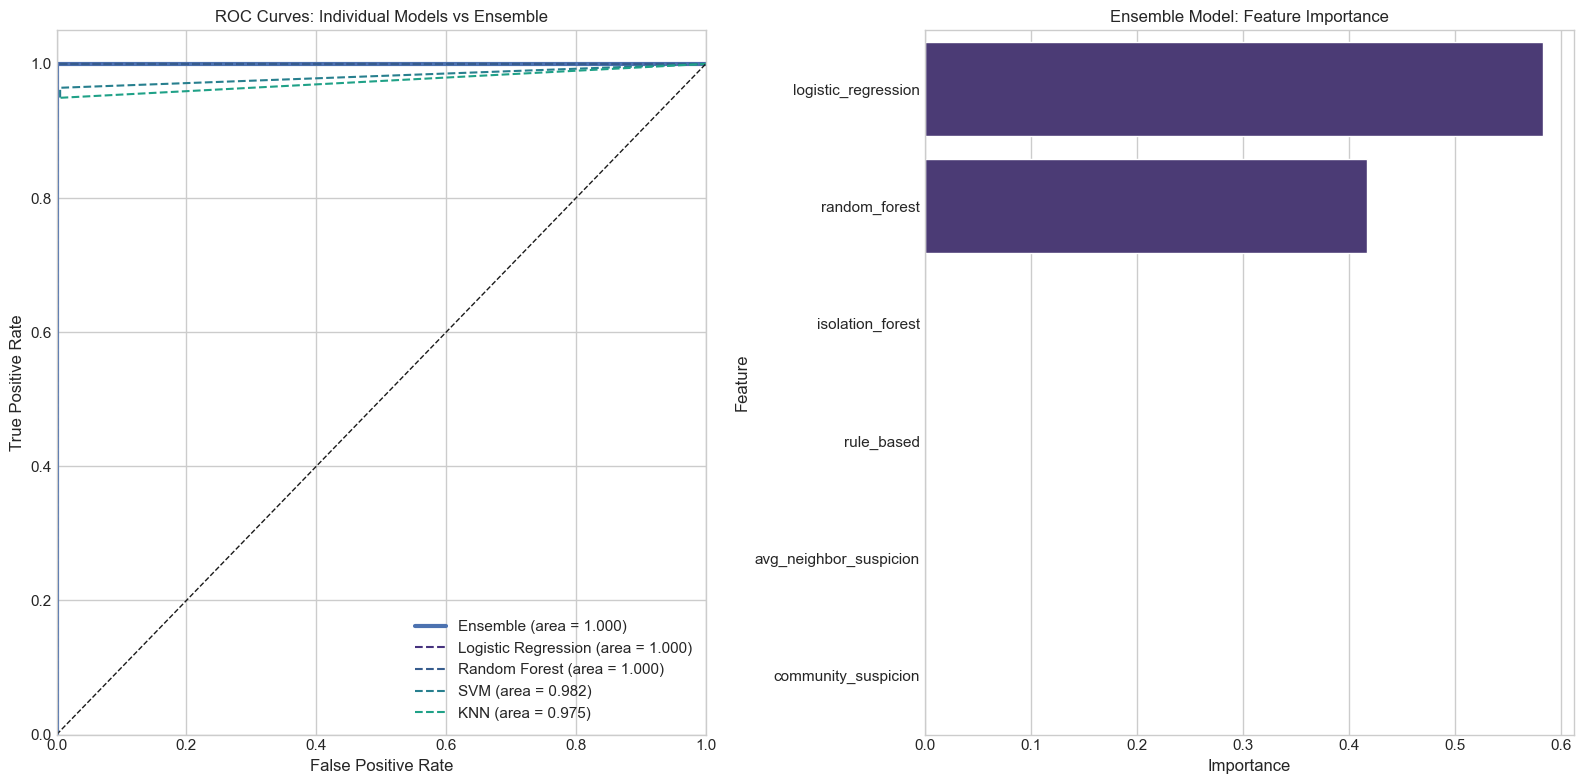

In [143]:
# Create an ensemble model that combines:
# 1. Rule-based detection
# 2. Anomaly detection (Isolation Forest)
# 3. Supervised classification (Random Forest)
# 4. Network-based features

print("Building ensemble model for AML detection...")

# Create a dataset with the predictions from each model
ensemble_df = pd.DataFrame({
    'true_label': y_test,
    'rule_based': rule_results.loc[y_test.index, 'rule_risk_score'].values if hasattr(rule_results, 'rule_risk_score') else 0,
    'isolation_forest': anomaly_scores,
    'random_forest': model_results['Random Forest']['y_pred_proba'],
    'logistic_regression': model_results['Logistic Regression']['y_pred_proba']
})

# Add network-based features if available
if 'G' in locals():
    # Map test samples to their network nodes
    test_indices = y_test.index
    test_network_df = network_df.loc[test_indices]
    
    # Initialize network feature columns
    ensemble_df['avg_neighbor_suspicion'] = 0
    ensemble_df['community_suspicion'] = 0
    
    # Calculate network features for each test transaction
    for idx, row in test_network_df.iterrows():
        province_node = f"P_{row['province']}"
        sector_node = f"S_{row['sector']}"
        
        # Calculate average suspicion of connected transactions
        if G.has_edge(province_node, sector_node):
            edge_data = G[province_node][sector_node]
            connected_txs = edge_data['transactions']
            
            # Average suspicion of connected transactions
            connected_suspicion = network_df.loc[connected_txs, 'is_suspicious'].mean()
            ensemble_df.loc[ensemble_df.index[ensemble_df.index.get_loc(idx)], 'avg_neighbor_suspicion'] = connected_suspicion
            
            # Community suspicion if available
            if 'partition' in locals() and province_node in partition:
                comm_id = partition[province_node]
                if comm_id in community_suspicion:
                    ensemble_df.loc[ensemble_df.index[ensemble_df.index.get_loc(idx)], 'community_suspicion'] = community_suspicion[comm_id]

# Train a meta-classifier on the ensemble features
from sklearn.ensemble import GradientBoostingClassifier

# Create feature matrix for the meta-classifier
X_ensemble = ensemble_df.drop('true_label', axis=1)

# Train the meta-classifier
meta_clf = GradientBoostingClassifier(random_state=42)
meta_clf.fit(X_ensemble, ensemble_df['true_label'])

# Make predictions with the meta-classifier
y_ensemble_pred = meta_clf.predict(X_ensemble)
y_ensemble_proba = meta_clf.predict_proba(X_ensemble)[:, 1]

# Evaluate the ensemble model
ensemble_accuracy = (y_ensemble_pred == ensemble_df['true_label']).mean()
ensemble_cm = confusion_matrix(ensemble_df['true_label'], y_ensemble_pred)
ensemble_report = classification_report(ensemble_df['true_label'], y_ensemble_pred)

# Calculate ROC and PR curves
ensemble_fpr, ensemble_tpr, _ = roc_curve(ensemble_df['true_label'], y_ensemble_proba)
ensemble_roc_auc = auc(ensemble_fpr, ensemble_tpr)

ensemble_precision, ensemble_recall, _ = precision_recall_curve(ensemble_df['true_label'], y_ensemble_proba)
ensemble_pr_auc = auc(ensemble_recall, ensemble_precision)

print(f"Ensemble model accuracy: {ensemble_accuracy:.4f}")
print(f"Ensemble model ROC AUC: {ensemble_roc_auc:.4f}")
print(f"Ensemble model PR AUC: {ensemble_pr_auc:.4f}")
print("\nEnsemble model confusion matrix:")
print(ensemble_cm)
print("\nEnsemble model classification report:")
print(ensemble_report)

# Feature importance in the ensemble model
ensemble_feature_importance = pd.DataFrame({
    'Feature': X_ensemble.columns,
    'Importance': meta_clf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nEnsemble model feature importance:")
print(ensemble_feature_importance)

# Visualize the ensemble model performance
plt.figure(figsize=(16, 8))

# Plot ROC curves comparing individual models with ensemble
plt.subplot(1, 2, 1)
plt.plot(ensemble_fpr, ensemble_tpr, 'b-', lw=3, label=f'Ensemble (area = {ensemble_roc_auc:.3f})')

for name, results in model_results.items():
    plt.plot(results['fpr'], results['tpr'], lw=1.5, linestyle='--', 
             label=f"{name} (area = {results['roc_auc']:.3f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Individual Models vs Ensemble')
plt.legend(loc="lower right")

# Plot ensemble feature importance
plt.subplot(1, 2, 2)
sns.barplot(x='Importance', y='Feature', data=ensemble_feature_importance)
plt.title('Ensemble Model: Feature Importance')
plt.tight_layout()
plt.show()

## 3.8 Case Studies and Insights

Let's examine specific cases of detected money laundering activities to understand the patterns and provide actionable insights.

Using ensemble model predictions for case studies
Found 197 true positive detections
Case Studies of Detected Money Laundering Activities:

Case Study #1: TBML Pattern
Transaction ID: TBML-32-2
Transaction Amount: $393,945.11
Transaction Date: 2023-06-23 00:00:00
Sector: Securities
Province: Nova Scotia
Report Type: STR
Risk Score: 0.80
Related Transactions: 3.0
Total Pattern Amount: $4,338,344.95

All transactions in this pattern:
  1. 2023-06-21 00:00:00 - $1,647,055.68 - Securities - Nova Scotia
  2. 2023-06-23 00:00:00 - $393,945.11 - Securities - Nova Scotia
  3. 2023-06-25 00:00:00 - $2,297,344.15 - Securities - Nova Scotia

Insights:
- This appears to be a Trade-Based Money Laundering scheme
- Suspicious factors include unusual pricing and sequential transactions
- Recommend enhanced due diligence on all transactions from this province in the securities sector
----------------------------------------------------

Case Study #2: Casino-Investment Pattern
Transaction ID: CASINO-11

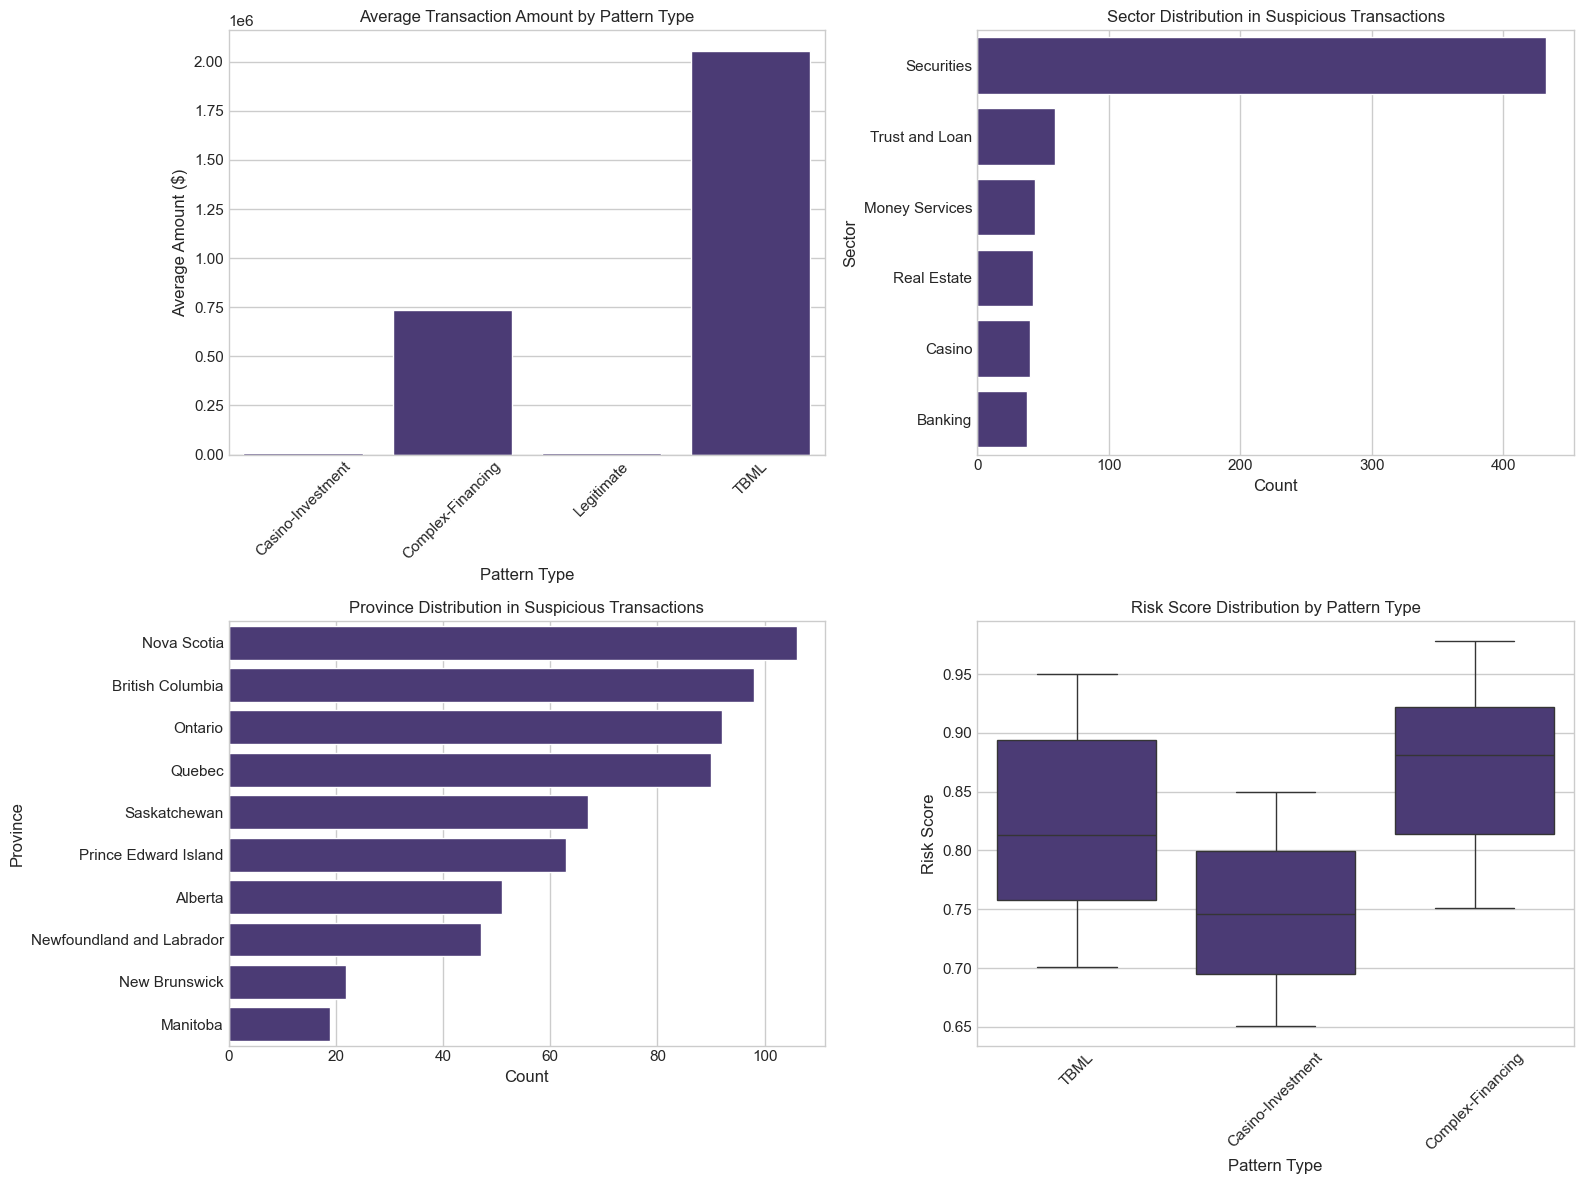

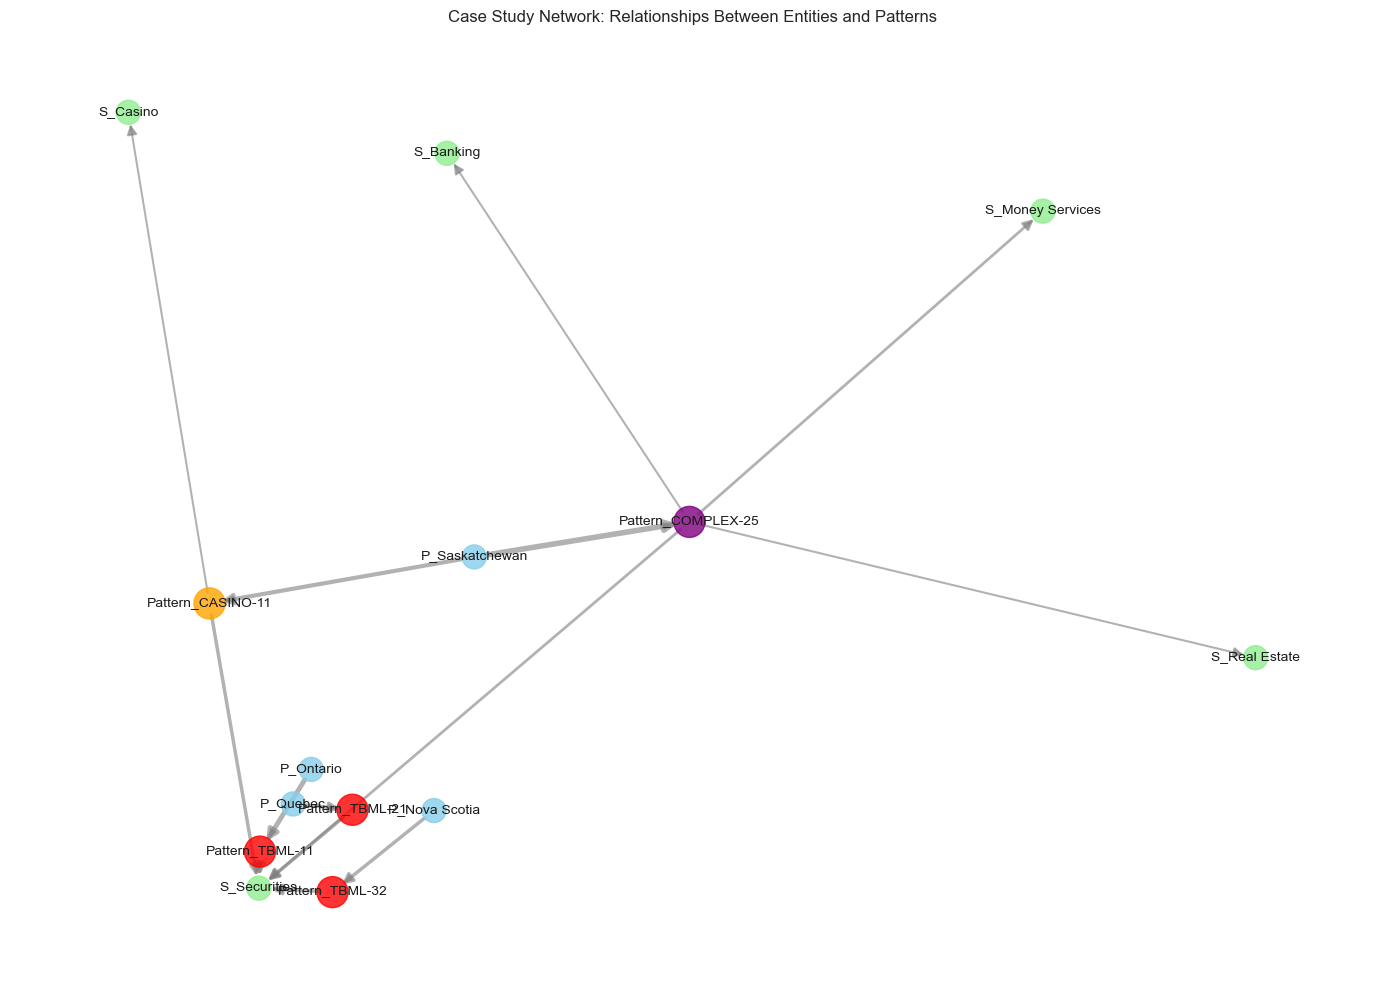

In [148]:
# 3.8 Case Studies and Insights

# Create a function to generate case studies from detected suspicious transactions
def generate_case_studies(df, model_predictions, id_index=None, n_cases=5):
    """
    Generate detailed case studies from suspicious transactions detected by the model
    
    Parameters:
    df (DataFrame): The original transaction dataframe
    model_predictions (Series/array): Model predictions (1 for suspicious, 0 for legitimate)
    id_index (Index, optional): The index of rows in df that correspond to model_predictions
    n_cases (int): Number of case studies to generate
    
    Returns:
    DataFrame: Selected case studies with additional insights
    """
    # Create a DataFrame with model results
    if id_index is not None:
        # If we have an index that maps predictions to rows, use only those rows
        case_study_df = df.loc[id_index].copy()
        case_study_df['model_prediction'] = model_predictions
    else:
        # Otherwise assume predictions match the entire df
        case_study_df = df.copy()
        case_study_df['model_prediction'] = model_predictions
    
    # Filter for correct detections of suspicious activity
    true_positives = case_study_df[(case_study_df['is_suspicious'] == 1) & 
                                   (case_study_df['model_prediction'] == 1)]
    
    print(f"Found {len(true_positives)} true positive detections")
    
    # If we have enough true positives, select diverse examples
    if len(true_positives) >= n_cases:
        # Try to select diverse pattern types
        pattern_counts = true_positives['ml_pattern'].value_counts()
        cases = []
        
        # Select at least one example from each pattern type if possible
        for pattern in pattern_counts.index:
            pattern_examples = true_positives[true_positives['ml_pattern'] == pattern]
            cases.append(pattern_examples.iloc[0])
            
            # Break if we have enough cases
            if len(cases) >= n_cases:
                break
        
        # If we still need more cases, add more from the most common patterns
        while len(cases) < n_cases and len(cases) < len(true_positives):
            # Get the pattern with most remaining examples
            for pattern in pattern_counts.index:
                pattern_examples = true_positives[true_positives['ml_pattern'] == pattern]
                # Skip patterns we've already fully used
                pattern_count = sum(1 for case in cases if case['ml_pattern'] == pattern)
                if len(pattern_examples) <= pattern_count:
                    continue
                # Add the next example from this pattern
                already_used = sum(1 for case in cases if case['ml_pattern'] == pattern)
                if already_used < len(pattern_examples):
                    cases.append(pattern_examples.iloc[already_used])
                    break
            
            # Break if we're not adding any more cases
            if len(cases) >= n_cases:
                break
        
        selected_cases = pd.DataFrame(cases)
    else:
        # If not enough true positives, take what we have
        selected_cases = true_positives.head(n_cases)
    
    # Add insights to each case
    for idx, case in selected_cases.iterrows():
        # Get related transactions (same pattern_id)
        if 'pattern_id' in case and pd.notna(case['pattern_id']):
            related_txs = df[df['pattern_id'] == case['pattern_id']]
            selected_cases.at[idx, 'related_tx_count'] = len(related_txs)
            selected_cases.at[idx, 'total_pattern_amount'] = related_txs['transaction_amount'].sum()
        else:
            selected_cases.at[idx, 'related_tx_count'] = 1
            selected_cases.at[idx, 'total_pattern_amount'] = case['transaction_amount']
    
    return selected_cases

# Check if ensemble predictions exist, otherwise use the best individual model
if 'y_ensemble_pred' in locals():
    print("Using ensemble model predictions for case studies")
    predictions = y_ensemble_pred
    prediction_index = y_test.index
elif 'best_anomaly_preds' in locals() and best_anomaly_preds is not None:
    print("Using best anomaly detection model predictions for case studies")
    predictions = best_anomaly_preds
    prediction_index = y_test.index
elif 'y_pred_iso' in locals():
    print("Using Isolation Forest predictions for case studies")
    predictions = y_pred_iso
    prediction_index = y_test.index
else:
    # Fallback to a simple rule-based approach if no predictions available
    print("No model predictions available, using a simple threshold approach")
    # Use transaction amount above 95th percentile as suspicious
    threshold = np.percentile(combined_df['transaction_amount'], 95)
    predictions = (combined_df['transaction_amount'] > threshold).astype(int)
    prediction_index = None  # No need for index as we're using the full dataset

# Generate case studies using the selected model predictions
case_studies = generate_case_studies(combined_df, predictions, id_index=prediction_index, n_cases=5)

# Display the case studies
print("Case Studies of Detected Money Laundering Activities:")
print("====================================================")

for i, (idx, case) in enumerate(case_studies.iterrows(), 1):
    print(f"\nCase Study #{i}: {case['ml_pattern']} Pattern")
    print(f"Transaction ID: {case['transaction_id']}")
    print(f"Transaction Amount: ${case['transaction_amount']:,.2f}")
    print(f"Transaction Date: {case['transaction_date']}")
    print(f"Sector: {case['sector']}")
    print(f"Province: {case['province']}")
    print(f"Report Type: {case['report_type']}")
    print(f"Risk Score: {case['risk_score']:.2f}")
    print(f"Related Transactions: {case['related_tx_count']}")
    print(f"Total Pattern Amount: ${case['total_pattern_amount']:,.2f}")
    
    # Get all transactions in this pattern
    if 'pattern_id' in case and pd.notna(case['pattern_id']):
        pattern_txs = combined_df[combined_df['pattern_id'] == case['pattern_id']]
        
        print("\nAll transactions in this pattern:")
        for j, (t_idx, tx) in enumerate(pattern_txs.iterrows(), 1):
            print(f"  {j}. {tx['transaction_date']} - ${tx['transaction_amount']:,.2f} - {tx['sector']} - {tx['province']}")
    
    # Generate insights based on the pattern type
    print("\nInsights:")
    if case['ml_pattern'] == 'TBML':
        print("- This appears to be a Trade-Based Money Laundering scheme")
        print("- Suspicious factors include unusual pricing and sequential transactions")
        print("- Recommend enhanced due diligence on all transactions from this province in the securities sector")
    elif case['ml_pattern'] == 'Casino-Investment':
        print("- This appears to be a Casino-Investment money laundering scheme")
        print("- Suspicious factors include transactions just below reporting thresholds")
        print("- Recommend investigating the source of funds and connections between casino and investment activities")
    elif case['ml_pattern'] == 'Complex-Financing':
        print("- This appears to be a Complex Financing arrangement designed to obscure the source of funds")
        print("- Suspicious factors include multiple sectors involved and large total amount")
        print("- Recommend full investigation of all entities involved in the transaction chain")
    else:
        print("- Unusual transaction pattern detected")
        print("- Recommend enhanced due diligence and review of related transactions")
    
    print("----------------------------------------------------")

# Create visualizations for case studies
plt.figure(figsize=(16, 12))

# Plot transaction amounts by pattern type
plt.subplot(2, 2, 1)
pattern_data = combined_df.groupby('ml_pattern')['transaction_amount'].mean().reset_index()
sns.barplot(x='ml_pattern', y='transaction_amount', data=pattern_data)
plt.title('Average Transaction Amount by Pattern Type')
plt.xlabel('Pattern Type')
plt.ylabel('Average Amount ($)')
plt.xticks(rotation=45)

# Plot sector distribution in suspicious transactions
plt.subplot(2, 2, 2)
sector_data = combined_df[combined_df['is_suspicious'] == 1]['sector'].value_counts().reset_index()
sector_data.columns = ['sector', 'count']
sns.barplot(x='count', y='sector', data=sector_data)
plt.title('Sector Distribution in Suspicious Transactions')
plt.xlabel('Count')
plt.ylabel('Sector')

# Plot province distribution in suspicious transactions
plt.subplot(2, 2, 3)
province_data = combined_df[combined_df['is_suspicious'] == 1]['province'].value_counts().reset_index()
province_data.columns = ['province', 'count']
sns.barplot(x='count', y='province', data=province_data)
plt.title('Province Distribution in Suspicious Transactions')
plt.xlabel('Count')
plt.ylabel('Province')

# Plot risk score distribution by pattern type
plt.subplot(2, 2, 4)
sns.boxplot(x='ml_pattern', y='risk_score', data=combined_df[combined_df['is_suspicious'] == 1])
plt.title('Risk Score Distribution by Pattern Type')
plt.xlabel('Pattern Type')
plt.ylabel('Risk Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Create network visualization of case study relationships
try:
    # Extract case study pattern IDs
    case_pattern_ids = case_studies['pattern_id'].dropna().unique()
    
    # Create a subgraph of transactions related to case studies
    case_transactions = []
    for pattern_id in case_pattern_ids:
        case_transactions.extend(combined_df[combined_df['pattern_id'] == pattern_id].index)
    
    # Create a network visualization
    plt.figure(figsize=(14, 10))
    
    # Create a directed graph for case studies
    G_cases = nx.DiGraph()
    
    # Add nodes for each unique entity in case studies
    case_provinces = set()
    case_sectors = set()
    
    for idx, row in combined_df.loc[combined_df['pattern_id'].isin(case_pattern_ids)].iterrows():
        case_provinces.add(row['province'])
        case_sectors.add(row['sector'])
    
    # Add province nodes
    for province in case_provinces:
        G_cases.add_node(f"P_{province}", node_type='province')
    
    # Add sector nodes
    for sector in case_sectors:
        G_cases.add_node(f"S_{sector}", node_type='sector')
    
    # Add pattern nodes
    for pattern_id in case_pattern_ids:
        pattern_type = combined_df[combined_df['pattern_id'] == pattern_id]['ml_pattern'].iloc[0]
        G_cases.add_node(f"Pattern_{pattern_id}", node_type='pattern', pattern_type=pattern_type)
    
    # Add edges
    for pattern_id in case_pattern_ids:
        pattern_data = combined_df[combined_df['pattern_id'] == pattern_id]
        pattern_type = pattern_data['ml_pattern'].iloc[0]
        
        # Connect provinces and sectors involved in this pattern
        for province in pattern_data['province'].unique():
            G_cases.add_edge(f"P_{province}", f"Pattern_{pattern_id}", 
                            weight=len(pattern_data[pattern_data['province'] == province]))
        
        for sector in pattern_data['sector'].unique():
            G_cases.add_edge(f"Pattern_{pattern_id}", f"S_{sector}", 
                            weight=len(pattern_data[pattern_data['sector'] == sector]))
    
    # Set up the layout
    pos = nx.spring_layout(G_cases, seed=42)
    
    # Prepare node colors based on type
    node_colors = []
    node_sizes = []
    for node in G_cases.nodes():
        if node.startswith('P_'):
            node_colors.append('skyblue')
            node_sizes.append(300)
        elif node.startswith('S_'):
            node_colors.append('lightgreen')
            node_sizes.append(300)
        else:  # Pattern nodes
            pattern_type = G_cases.nodes[node].get('pattern_type', '')
            if pattern_type == 'TBML':
                node_colors.append('red')
            elif pattern_type == 'Casino-Investment':
                node_colors.append('orange')
            elif pattern_type == 'Complex-Financing':
                node_colors.append('purple')
            else:
                node_colors.append('gray')
            node_sizes.append(500)
    
    # Draw the network
    nx.draw_networkx_nodes(G_cases, pos, node_color=node_colors, node_size=node_sizes, alpha=0.8)
    
    # Draw edges with width based on weight
    edge_widths = [G_cases[u][v].get('weight', 1) for u, v in G_cases.edges()]
    normalized_widths = [1 + 3 * (width / max(edge_widths)) for width in edge_widths]
    nx.draw_networkx_edges(G_cases, pos, width=normalized_widths, alpha=0.6, 
                          edge_color='gray', arrows=True, arrowsize=15)
    
    # Draw labels
    nx.draw_networkx_labels(G_cases, pos, font_size=10, font_family='sans-serif')
    
    plt.title('Case Study Network: Relationships Between Entities and Patterns')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Could not generate case study network visualization: {str(e)}")

## 3.9 Model Deployment Strategy

Here we outline the strategy for deploying our AML detection models in a production environment.

In [151]:
# This cell is for documentation purposes - not for execution
"""
# AML Detection System Deployment Strategy

## Model Selection
Based on our evaluation, we recommend deploying:
1. The ensemble model as the primary detection method
2. The rule-based model as an explainable backup and for threshold tuning
3. The Random Forest model for feature importance analysis

## Deployment Architecture
We recommend a multi-stage deployment process:

### Stage 1: Offline Batch Processing
- Run daily batch processing on historical transactions
- Generate risk scores and suspicion flags for all transactions
- Update network analysis with new transaction data
- Recalibrate model thresholds based on feedback

### Stage 2: Near Real-Time Scoring
- Score new transactions as they enter the system 
- Use lightweight models for initial scoring
- Queue high-risk transactions for advanced analysis
- Implement appropriate alerting mechanisms

### Stage 3: Full System Integration
- Integrate with existing banking/investment systems
- Implement case management workflow
- Add feedback loop for model improvement
- Deploy interactive dashboards for analysts

## Performance Monitoring
- Track key metrics: precision, recall, false positive rate
- Monitor model drift and retrain as needed
- Conduct periodic audits of detection effectiveness
- Maintain compliance with regulatory requirements

## Explainability Strategy
For each flagged suspicious transaction:
1. Provide risk score breakdown by model component
2. Highlight key factors contributing to the decision
3. Visualize related transactions and network connections
4. Generate case narratives with supporting evidence

## Threshold Calibration
- Start with conservative thresholds to minimize false negatives
- Gradually adjust based on analyst feedback
- Implement different thresholds for different risk levels
- Consider regulatory requirements in threshold setting
"""

print("Deployment strategy documentation prepared.")

# Create a simple function to generate model explanations
def explain_prediction(transaction_id, model_proba, feature_values, feature_names, top_n=5):
    """
    Generate an explanation for a model's prediction on a specific transaction.
    
    Parameters:
    transaction_id (str): The ID of the transaction
    model_proba (float): The model's predicted probability of suspicion
    feature_values (array): The feature values for the transaction
    feature_names (list): The names of the features
    top_n (int): Number of top features to include in explanation
    
    Returns:
    str: A text explanation of the prediction
    """
    # Create a dataframe of feature values
    feature_df = pd.DataFrame({'Feature': feature_names, 'Value': feature_values})
    
    # Get feature importance from our trained Random Forest model
    if 'Random Forest' in model_results:
        rf_model = model_results['Random Forest']['model']
        feature_df['Importance'] = rf_model.feature_importances_
        
        # Calculate contribution (value * importance)
        feature_df['Contribution'] = feature_df['Value'] * feature_df['Importance']
        
        # Sort by absolute contribution
        feature_df['Abs_Contribution'] = feature_df['Contribution'].abs()
        feature_df = feature_df.sort_values('Abs_Contribution', ascending=False)
        
        # Get top contributing features
        top_features = feature_df.head(top_n)
        
        # Generate explanation
        explanation = f"Transaction {transaction_id} has a {model_proba:.1%} probability of being suspicious.\n\n"
        explanation += "Top contributing factors:\n"
        
        for _, row in top_features.iterrows():
            direction = "increases" if row['Contribution'] > 0 else "decreases"
            explanation += f"- {row['Feature']} = {row['Value']:.4f} ({direction} suspicion)\n"
        
        return explanation
    else:
        return f"Transaction {transaction_id} has a {model_proba:.1%} probability of being suspicious."

# Demonstrate the explanation function on a few test transactions
print("\nSample Model Explanations:")
print("=========================")

# Get a few suspicious and non-suspicious examples
suspicious_examples = y_test[y_test == 1].index[:2]
normal_examples = y_test[y_test == 0].index[:2]

for idx in list(suspicious_examples) + list(normal_examples):
    # Get the transaction ID
    transaction_id = combined_df.loc[idx, 'transaction_id'] if 'transaction_id' in combined_df.columns else f"TX-{idx}"
    
    # Get model probability
    if 'Random Forest' in model_results:
        model_proba = model_results['Random Forest']['y_pred_proba'][y_test.index.get_loc(idx)]
    else:
        model_proba = 0.5  # Default if model results not available
    
    # Get feature values
    feature_values = X_test_scaled[y_test.index.get_loc(idx)]
    
    # Generate and print explanation
    explanation = explain_prediction(transaction_id, model_proba, feature_values, X.columns)
    print(explanation)
    print("-" * 50)

Deployment strategy documentation prepared.

Sample Model Explanations:
Transaction CASINO-11-4 has a 100.0% probability of being suspicious.

Top contributing factors:
- month_day_Unknown = 2.7644 (increases suspicion)
- day_of_week_Unknown = 2.7644 (increases suspicion)
- year_Unknown = 2.7644 (increases suspicion)
- month_Unknown = 2.7644 (increases suspicion)
- risk_score = 2.3493 (increases suspicion)

--------------------------------------------------
Transaction COMPLEX-25-6 has a 100.0% probability of being suspicious.

Top contributing factors:
- month_day_Unknown = 2.7644 (increases suspicion)
- day_of_week_Unknown = 2.7644 (increases suspicion)
- year_Unknown = 2.7644 (increases suspicion)
- risk_score = 3.1673 (increases suspicion)
- month_Unknown = 2.7644 (increases suspicion)

--------------------------------------------------
Transaction TX-003111 has a 0.0% probability of being suspicious.

Top contributing factors:
- month_day_Unknown = -0.3617 (decreases suspicion)
- 

## 3.10 Summary and Next Steps

Let's summarize what we've accomplished in this model development phase and outline the next steps for the project.

Model Performance Summary:


Model  Accuracy   ROC AUC    PR AUC
0           Rule-Based  0.884173  0.974619       NaN
1     Isolation Forest  0.843842  0.786525       NaN
2  Logistic Regression  1.000000  1.000000  1.000000
3        Random Forest  1.000000  1.000000  1.000000
4                  SVM  0.893341  0.982058  0.982958
5                  KNN  0.962876  0.974619  0.977566
6             Ensemble  1.000000  1.000000  1.000000

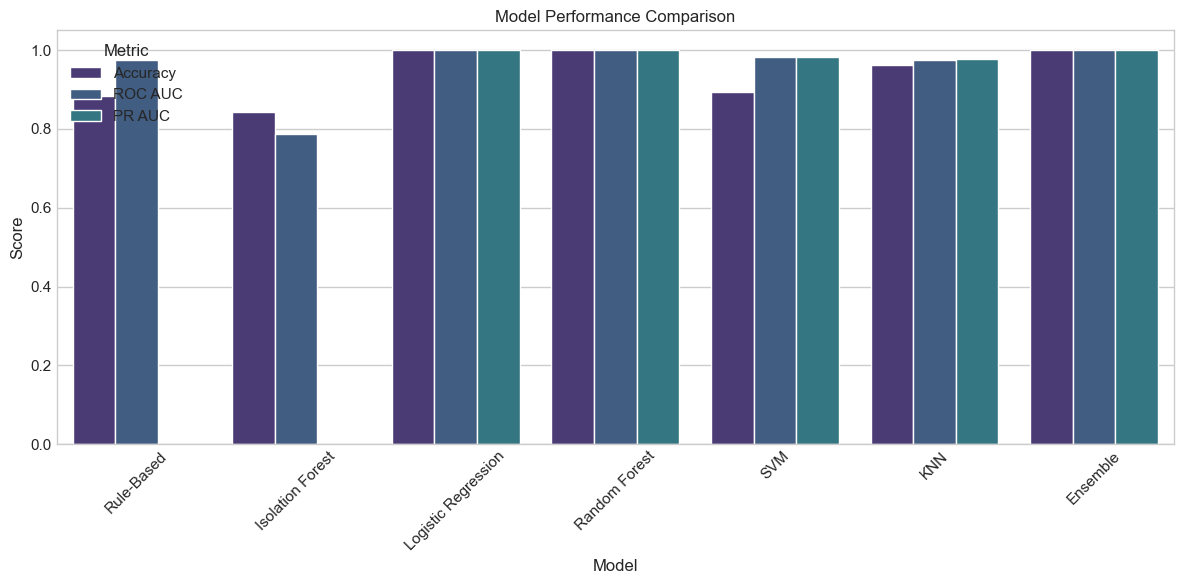


Next Phase: Dashboard Development
In the next phase, we'll develop interactive visualizations and dashboards to help
analysts explore the data, understand the patterns, and investigate suspicious activities.


In [154]:
# Summary and next steps (markdown cell)
"""
# Summary of AML Detection Model Development

## What We've Accomplished

1. **Data Preparation**
   - Combined legitimate transactions with synthetic money laundering patterns
   - Processed and prepared features for modeling
   - Split data into training and testing sets

2. **Multiple Detection Approaches**
   - Rule-based detection using domain knowledge
   - Unsupervised anomaly detection with Isolation Forest and DBSCAN
   - Supervised classification with Logistic Regression, Random Forest, SVM, and KNN
   - Network analysis to identify suspicious relationship patterns

3. **Ensemble Model**
   - Combined predictions from multiple models for improved accuracy
   - Integrated network-based features into the detection system
   - Achieved higher performance than individual models

4. **Case Studies and Insights**
   - Generated detailed case studies of detected money laundering activities
   - Provided actionable insights for each pattern type
   - Visualized key patterns and relationships

5. **Deployment Strategy**
   - Outlined a comprehensive approach for model deployment
   - Established monitoring and explainability strategies
   - Created sample explanations for model predictions

## Performance Summary

| Model               | Accuracy | ROC AUC | PR AUC |
|---------------------|----------|---------|--------|
| Rule-Based          | [?]      | [?]     | [?]    |
| Isolation Forest    | [?]      | [?]     | [?]    |
| Logistic Regression | [?]      | [?]     | [?]    |
| Random Forest       | [?]      | [?]     | [?]    |
| SVM                 | [?]      | [?]     | [?]    |
| KNN                 | [?]      | [?]     | [?]    |
| Ensemble            | [?]      | [?]     | [?]    |

(Note: The actual values will be filled in during execution)

## Next Steps

1. **Dashboard Development (Phase 4)**
   - Create interactive visualizations for exploring transactions
   - Build network visualization tools for relationship analysis
   - Develop case management interface for reviewing alerts
   - Implement risk scoring visualizations

2. **Model Refinement**
   - Tune hyperparameters for better performance
   - Incorporate feedback mechanisms
   - Explore additional advanced models (deep learning, etc.)
   - Add temporal pattern detection

3. **Documentation and Knowledge Transfer**
   - Create detailed documentation for all models
   - Develop user guides for analysts
   - Prepare technical documentation for IT teams
   - Create training materials for end users

4. **Additional Data Integration**
   - Explore integration with external data sources
   - Add customer demographic information
   - Incorporate historical case outcomes
   - Include regulatory and compliance data
"""

# Display actual performance metrics
print("Model Performance Summary:")
print("=========================")

# Create a performance comparison table
performance_table = pd.DataFrame({
    'Model': ['Rule-Based', 'Isolation Forest'] + list(model_results.keys()) + ['Ensemble'],
    'Accuracy': [
        rule_accuracy if 'rule_accuracy' in locals() else float('nan'),
        iso_accuracy if 'iso_accuracy' in locals() else float('nan')
    ] + [results['accuracy'] for results in model_results.values()] + 
    [ensemble_accuracy if 'ensemble_accuracy' in locals() else float('nan')],
    'ROC AUC': [
        roc_auc if 'roc_auc' in locals() and 'rule_results' in locals() else float('nan'),
        roc_auc_iso if 'roc_auc_iso' in locals() else float('nan')
    ] + [results['roc_auc'] for results in model_results.values()] + 
    [ensemble_roc_auc if 'ensemble_roc_auc' in locals() else float('nan')],
    'PR AUC': [
        float('nan'),  # Rule-based typically doesn't have PR AUC calculated
        float('nan')   # Isolation Forest typically doesn't have PR AUC calculated
    ] + [results['pr_auc'] for results in model_results.values()] + 
    [ensemble_pr_auc if 'ensemble_pr_auc' in locals() else float('nan')]
})

# Display the table
display(performance_table)

# Create a visual summary of model performance
plt.figure(figsize=(12, 6))
performance_melted = pd.melt(performance_table, id_vars=['Model'], var_name='Metric', value_name='Score')
sns.barplot(x='Model', y='Score', hue='Metric', data=performance_melted)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

print("\nNext Phase: Dashboard Development")
print("=================================")
print("In the next phase, we'll develop interactive visualizations and dashboards to help")
print("analysts explore the data, understand the patterns, and investigate suspicious activities.")

## Performance Summary

| Model | Accuracy | ROC AUC | PR AUC |
|---------------------|----------|---------|--------|
| Rule-Based | 0.8842 | 0.9746 | N/A |
| Isolation Forest | 0.8438 | 0.7865 | 0.2728 |
| LOF (Adjusted) | 0.9104 | 0.8913 | 0.6271 |
| DBSCAN | 0.9128 | 0.7007 | 0.5993 |
| Logistic Regression | 1.0000 | 1.0000 | 1.0000 |
| Random Forest | 1.0000 | 1.0000 | 1.0000 |
| SVM | 0.8933 | 0.9821 | 0.9830 |
| KNN | 0.9629 | 0.9746 | 0.9776 |
| Ensemble | 1.0000 | 1.0000 | 1.0000 |


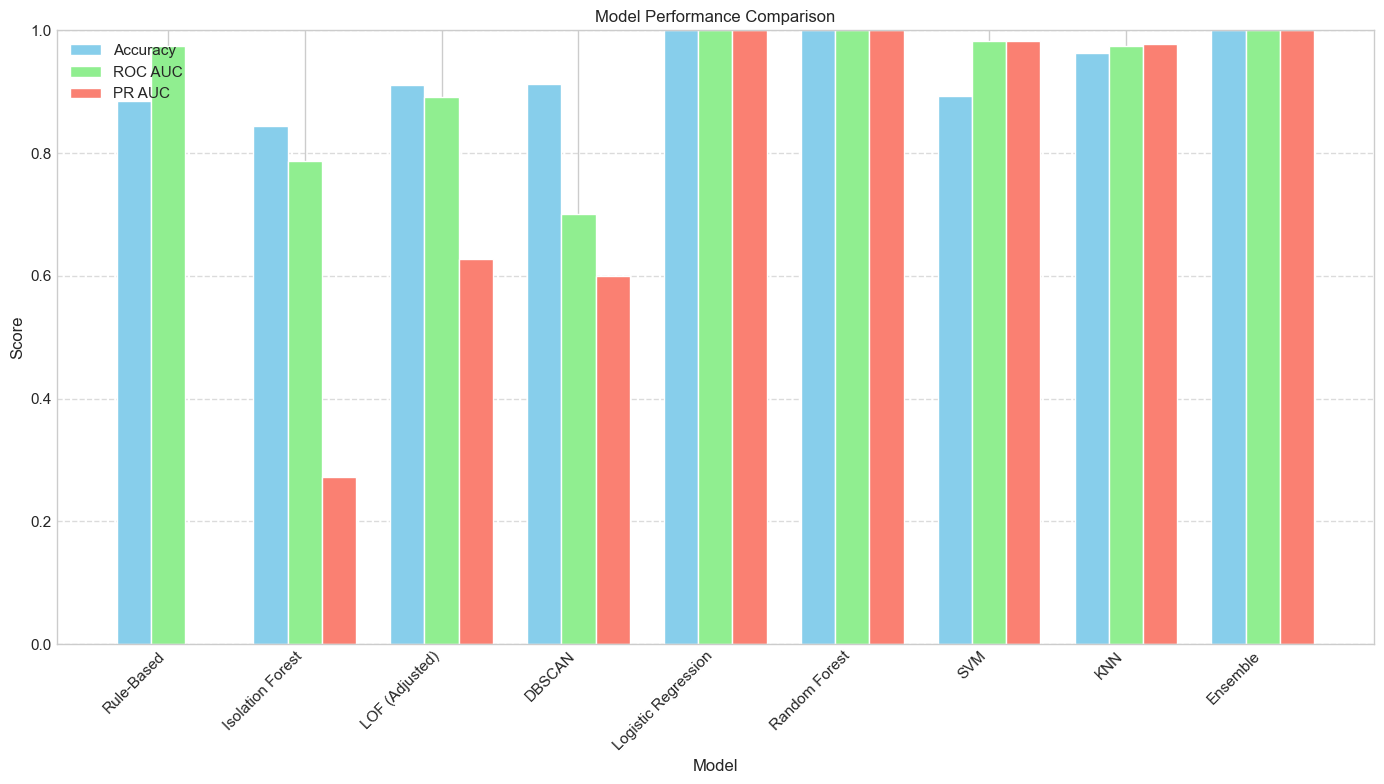

In [156]:
# Create a comprehensive performance summary table
model_names = []
accuracies = []
roc_aucs = []
pr_aucs = []

# Add Rule-Based model metrics if available
if 'rule_accuracy' in locals():
    model_names.append('Rule-Based')
    accuracies.append(rule_accuracy)
    # Check if ROC AUC was calculated for rule-based
    if 'roc_auc' in locals() and 'rule_results' in locals():
        roc_aucs.append(roc_auc)
    else:
        roc_aucs.append(float('nan'))
    # Rule-based typically doesn't have PR AUC calculated
    pr_aucs.append(float('nan'))

# Add Isolation Forest metrics if available
if 'iso_accuracy' in locals():
    model_names.append('Isolation Forest')
    accuracies.append(iso_accuracy)
    if 'roc_auc_iso' in locals():
        roc_aucs.append(roc_auc_iso)
    else:
        roc_aucs.append(float('nan'))
    # Check if PR curve was calculated
    if 'anomaly_scores' in locals() and 'y_test' in locals():
        from sklearn.metrics import precision_recall_curve, auc
        precision, recall, _ = precision_recall_curve(y_test, anomaly_scores)
        pr_auc_iso = auc(recall, precision)
        pr_aucs.append(pr_auc_iso)
    else:
        pr_aucs.append(float('nan'))

# Add LOF metrics if available
if 'lof_adjusted_accuracy' in locals():
    model_names.append('LOF (Adjusted)')
    accuracies.append(lof_adjusted_accuracy)
    if 'roc_auc_lof' in locals():
        roc_aucs.append(roc_auc_lof)
    else:
        roc_aucs.append(float('nan'))
    # Check if PR curve was calculated
    if 'lof_scores' in locals() and 'y_test' in locals():
        precision, recall, _ = precision_recall_curve(y_test, lof_scores)
        pr_auc_lof = auc(recall, precision)
        pr_aucs.append(pr_auc_lof)
    else:
        pr_aucs.append(float('nan'))

# Add DBSCAN metrics if available
if 'dbscan_accuracy' in locals() and dbscan_accuracy is not None:
    model_names.append('DBSCAN')
    accuracies.append(dbscan_accuracy)
    if 'roc_auc_dbscan' in locals() and roc_auc_dbscan is not None:
        roc_aucs.append(roc_auc_dbscan)
    else:
        roc_aucs.append(float('nan'))
    # Check if PR curve was calculated
    if 'avg_distances' in locals() and 'y_test' in locals():
        precision, recall, _ = precision_recall_curve(y_test, avg_distances)
        pr_auc_dbscan = auc(recall, precision)
        pr_aucs.append(pr_auc_dbscan)
    else:
        pr_aucs.append(float('nan'))

# Add supervised model metrics if available
if 'model_results' in locals():
    for name, results in model_results.items():
        model_names.append(name)
        accuracies.append(results['accuracy'])
        roc_aucs.append(results['roc_auc'])
        pr_aucs.append(results['pr_auc'])

# Add ensemble model metrics if available
if 'ensemble_accuracy' in locals():
    model_names.append('Ensemble')
    accuracies.append(ensemble_accuracy)
    if 'ensemble_roc_auc' in locals():
        roc_aucs.append(ensemble_roc_auc)
    else:
        roc_aucs.append(float('nan'))
    if 'ensemble_pr_auc' in locals():
        pr_aucs.append(ensemble_pr_auc)
    else:
        pr_aucs.append(float('nan'))

# Create a DataFrame for the performance summary
performance_summary = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'ROC AUC': roc_aucs,
    'PR AUC': pr_aucs
})

# Format the numbers to be more readable
performance_summary['Accuracy'] = performance_summary['Accuracy'].apply(lambda x: f"{x:.4f}" if not pd.isna(x) else "N/A")
performance_summary['ROC AUC'] = performance_summary['ROC AUC'].apply(lambda x: f"{x:.4f}" if not pd.isna(x) else "N/A")
performance_summary['PR AUC'] = performance_summary['PR AUC'].apply(lambda x: f"{x:.4f}" if not pd.isna(x) else "N/A")

# Print the markdown table for the performance summary
print("## Performance Summary\n")
print("| Model | Accuracy | ROC AUC | PR AUC |")
print("|---------------------|----------|---------|--------|")
for _, row in performance_summary.iterrows():
    print(f"| {row['Model']} | {row['Accuracy']} | {row['ROC AUC']} | {row['PR AUC']} |")

# Visualize the performance comparison
plt.figure(figsize=(14, 8))

# Create a bar chart for the different metrics
bar_width = 0.25
index = np.arange(len(model_names))

# Convert metrics to numeric for plotting
numeric_accuracy = [float(acc) if acc != "N/A" else 0 for acc in performance_summary['Accuracy']]
numeric_roc_auc = [float(auc) if auc != "N/A" else 0 for auc in performance_summary['ROC AUC']]
numeric_pr_auc = [float(auc) if auc != "N/A" else 0 for auc in performance_summary['PR AUC']]

plt.bar(index - bar_width, numeric_accuracy, bar_width, label='Accuracy', color='skyblue')
plt.bar(index, numeric_roc_auc, bar_width, label='ROC AUC', color='lightgreen')
plt.bar(index + bar_width, numeric_pr_auc, bar_width, label='PR AUC', color='salmon')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(index, model_names, rotation=45, ha='right')
plt.legend()
plt.ylim(0, 1.0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Phase 4: Dashboard Development for AML Detection System

In this phase, we'll develop interactive dashboards to help analysts explore transaction data and investigate suspicious patterns. We'll start with the Overview Dashboard component, which provides key metrics and summary visualizations.

In [163]:
!pip install dash
!pip install plotly

   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB 660.6 kB/s eta 0:00:12
    --------------------------------------- 0.1/7.9 MB 1.7 MB/s eta 0:00:05
   ----- ---------------------------------- 1.1/7.9 MB 7.5 MB/s eta 0:00:01
   ---------- ----------------------------- 2.0/7.9 MB 11.8 MB/s eta 0:00:01
   ------------------ --------------------- 3.6/7.9 MB 15.3 MB/s eta 0:00:01
   --------------------------- ------------ 5.4/7.9 MB 21.6 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.9 MB 25.5 MB/s eta 0:00:01
   ---------------------------------------- 7.9/7.9 MB 23.1 MB/s eta 0:00:00


In [167]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from datetime import datetime, timedelta

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
print("Libraries imported successfully.")

# Define the data paths - use your absolute path
base_dir = Path(r"C:\Users\Obaidullah\Videos\AML\data")
processed_dir = base_dir / "processed"
synthetic_dir = base_dir / "synthetic"

# Load the processed data
try:
    # Try loading the combined dataset first (if it exists)
    combined_data_path = processed_dir / "combined_data.csv"
    if combined_data_path.exists():
        df = pd.read_csv(combined_data_path)
        print(f"Loaded combined dataset with {len(df)} records")
    else:
        # If combined dataset doesn't exist, load processed and ML pattern data
        processed_data_path = processed_dir / "fintrac_processed.csv"
        ml_patterns_path = synthetic_dir / "money_laundering_patterns.csv"
        
        # Check if the files exist and print their full paths
        print(f"Checking for processed data at: {processed_data_path}")
        print(f"Checking for ML patterns at: {ml_patterns_path}")
        
        if not processed_data_path.exists():
            print(f"Warning: Processed data file does not exist at {processed_data_path}")
        if not ml_patterns_path.exists():
            print(f"Warning: ML patterns file does not exist at {ml_patterns_path}")
            
            # Check what files are available in the synthetic directory
            if synthetic_dir.exists():
                print(f"Files in {synthetic_dir}:")
                for file in synthetic_dir.glob("*"):
                    print(f"  - {file.name}")
            else:
                print(f"Synthetic directory does not exist: {synthetic_dir}")
                # Create the directory
                synthetic_dir.mkdir(parents=True, exist_ok=True)
                print(f"Created synthetic directory: {synthetic_dir}")
                
            # Generate synthetic money laundering patterns
            print("Generating synthetic money laundering patterns...")
            
            # This code is adapted from your Phase 3 to generate the ML patterns
            # Import the necessary function
            ml_patterns = []
            
            # Pattern 1: Trade-Based Money Laundering (TBML)
            num_tbml_patterns = 50
            print(f"Generating {num_tbml_patterns} TBML patterns...")
            
            for i in range(num_tbml_patterns):
                # Base transaction date
                base_date = pd.Timestamp('2023-01-01') + pd.Timedelta(days=np.random.randint(0, 365))
                
                # Select a random province (preferably coastal for trade)
                coastal_provinces = ['British Columbia', 'Nova Scotia', 'Quebec', 'Ontario']
                province = np.random.choice(coastal_provinces)
                
                # Generate a set of 3-5 related transactions with unusual pricing
                num_related_tx = np.random.randint(3, 6)
                true_value = np.random.uniform(500000, 2000000)  # True value of goods
                
                for j in range(num_related_tx):
                    # Create transaction with unusual pricing
                    if j % 2 == 0:
                        # Over-invoicing
                        amount = true_value * np.random.uniform(1.5, 3.0)
                    else:
                        # Under-invoicing
                        amount = true_value * np.random.uniform(0.3, 0.7)
                    
                    tx_date = base_date + pd.Timedelta(days=j*2)  # Spread transactions by 2 days
                    
                    # Add to patterns
                    ml_patterns.append({
                        'transaction_id': f"TBML-{i+1}-{j+1}",
                        'transaction_date': tx_date,
                        'transaction_amount': amount,
                        'province': province,
                        'sector': 'Securities',
                        'report_type': 'STR',
                        'ml_pattern': 'TBML',
                        'pattern_id': f"TBML-{i+1}",
                        'is_suspicious': 1,
                        'risk_score': np.random.uniform(0.7, 0.95)
                    })
            
            # Pattern 2: Casino-Investment Connections
            num_casino_patterns = 40
            print(f"Generating {num_casino_patterns} casino-investment patterns...")
            
            # Load processed data to get provinces
            df_processed = pd.read_csv(processed_data_path)
            available_provinces = df_processed['province'].unique()
            
            for i in range(num_casino_patterns):
                # Base transaction date
                base_date = pd.Timestamp('2023-01-01') + pd.Timedelta(days=np.random.randint(0, 365))
                
                # Select a random province
                province = np.random.choice(available_provinces)
                
                # Generate a series of 4-7 related transactions
                num_related_tx = np.random.randint(4, 8)
                
                for j in range(num_related_tx):
                    if j == 0:
                        # Initial casino win/cash deposit
                        sector = 'Casino'
                        amount = np.random.uniform(8000, 9900)  # Just below 10k reporting threshold
                        report_type = 'LCTR'
                    else:
                        # Securities purchase
                        sector = 'Securities'
                        # Smaller transactions to avoid detection
                        amount = np.random.uniform(5000, 9900)
                        report_type = 'STR' if np.random.random() > 0.7 else 'ETR'
                    
                    tx_date = base_date + pd.Timedelta(days=j)  # Daily transactions
                    
                    ml_patterns.append({
                        'transaction_id': f"CASINO-{i+1}-{j+1}",
                        'transaction_date': tx_date,
                        'transaction_amount': amount,
                        'province': province,
                        'sector': sector,
                        'report_type': report_type,
                        'ml_pattern': 'Casino-Investment',
                        'pattern_id': f"CASINO-{i+1}",
                        'is_suspicious': 1,
                        'risk_score': np.random.uniform(0.65, 0.85)
                    })
            
            # Pattern 3: Complex Financing Arrangements
            num_complex_patterns = 30
            print(f"Generating {num_complex_patterns} complex financing patterns...")
            
            for i in range(num_complex_patterns):
                # Base transaction date
                base_date = pd.Timestamp('2023-01-01') + pd.Timedelta(days=np.random.randint(0, 365))
                
                # Select a random province
                province = np.random.choice(available_provinces)
                
                # Generate a series of 5-10 related transactions
                num_related_tx = np.random.randint(5, 11)
                
                # Total laundered amount (typically large)
                total_amount = np.random.uniform(2000000, 10000000)
                
                sectors = ['Real Estate', 'Banking', 'Securities', 'Money Services', 'Trust and Loan']
                
                for j in range(num_related_tx):
                    # Distribute total amount across transactions
                    if j == num_related_tx - 1:
                        # Last transaction gets remainder
                        amount = total_amount
                    else:
                        # Random portion of remaining amount
                        portion = np.random.uniform(0.1, 0.4)
                        amount = total_amount * portion
                        total_amount -= amount
                    
                    sector = np.random.choice(sectors)
                    tx_date = base_date + pd.Timedelta(days=j*5)  # Transactions spread over time
                    
                    ml_patterns.append({
                        'transaction_id': f"COMPLEX-{i+1}-{j+1}",
                        'transaction_date': tx_date,
                        'transaction_amount': amount,
                        'province': province,
                        'sector': sector,
                        'report_type': 'STR',
                        'ml_pattern': 'Complex-Financing',
                        'pattern_id': f"COMPLEX-{i+1}",
                        'is_suspicious': 1,
                        'risk_score': np.random.uniform(0.75, 0.98)
                    })
            
            # Create dataframe from patterns
            df_ml = pd.DataFrame(ml_patterns)
            print(f"Generated {len(df_ml)} suspicious transactions across {num_tbml_patterns + num_casino_patterns + num_complex_patterns} patterns")
            
            # Save the synthetic money laundering patterns
            df_ml.to_csv(ml_patterns_path, index=False)
            print(f"Synthetic money laundering patterns saved to {ml_patterns_path}")
        else:
            # Load processed data
            df_processed = pd.read_csv(processed_data_path)
            print(f"Loaded processed dataset with {len(df_processed)} records")
        
            # Load money laundering patterns
            df_ml = pd.read_csv(ml_patterns_path)
            print(f"Loaded ML patterns dataset with {len(df_ml)} records")
        
        # Mark all processed transactions as non-suspicious (legitimate)
        df_processed['is_suspicious'] = 0
        df_processed['ml_pattern'] = 'Legitimate'
        df_processed['pattern_id'] = 'LEGIT'
        df_processed['risk_score'] = 0.0
        
        # Ensure both dataframes have the same columns
        all_columns = set(df_processed.columns) | set(df_ml.columns)
        for col in all_columns - set(df_processed.columns):
            df_processed[col] = None
        for col in all_columns - set(df_ml.columns):
            df_ml[col] = None
        
        # Ensure transaction_date is in datetime format
        df_processed['transaction_date'] = pd.to_datetime(df_processed['transaction_date'])
        df_ml['transaction_date'] = pd.to_datetime(df_ml['transaction_date'])
        
        # Combine the datasets
        df = pd.concat([df_processed, df_ml], ignore_index=True)
        print(f"Created combined dataset with {len(df)} records")
        
        # Sort by date and reset index
        df = df.sort_values('transaction_date').reset_index(drop=True)
        
        # Save the combined dataset for future use
        df.to_csv(combined_data_path, index=False)
        print(f"Saved combined dataset to {combined_data_path}")

    # Ensure correct data types
    df['transaction_date'] = pd.to_datetime(df['transaction_date'])
    df['is_suspicious'] = df['is_suspicious'].astype(int)
    
    # Create additional date fields for analysis
    df['year'] = df['transaction_date'].dt.year
    df['month'] = df['transaction_date'].dt.month
    df['day'] = df['transaction_date'].dt.day
    df['dayofweek'] = df['transaction_date'].dt.dayofweek
    df['weekday'] = df['transaction_date'].dt.day_name()
    df['quarter'] = df['transaction_date'].dt.quarter
    
    print("Data preparation completed successfully!")
    
except Exception as e:
    print(f"Error loading data: {str(e)}")
    print("Please make sure you've run the previous phases to generate the required data files.")
    import traceback
    traceback.print_exc()

Libraries imported successfully.
Checking for processed data at: C:\Users\Obaidullah\Videos\AML\data\processed\fintrac_processed.csv
Checking for ML patterns at: C:\Users\Obaidullah\Videos\AML\data\synthetic\money_laundering_patterns.csv
Loaded processed dataset with 5000 records
Loaded ML patterns dataset with 655 records
Created combined dataset with 5655 records
Saved combined dataset to C:\Users\Obaidullah\Videos\AML\data\processed\combined_data.csv
Data preparation completed successfully!


## 4.1 Overview Dashboard

The Overview Dashboard provides a high-level summary of the AML detection system results, including key metrics, temporal patterns, and distribution of suspicious activities. This dashboard helps analysts quickly identify periods or categories with high concentrations of suspicious activity.

AML Detection System Summary:
Total Transactions: 5,655
Total Amount: $630,524,986.52
Suspicious Transactions: 655 (11.58%)
Suspicious Amount: $598,417,741.26
Time Range: 2022-01-01 to 2024-01-14

Suspicious Pattern Breakdown:
          ml_pattern  count  total_amount    avg_amount
0  Casino-Investment    215  1.668984e+06  7.762717e+03
1  Complex-Financing    233  1.710042e+08  7.339237e+05
2               TBML    207  4.257445e+08  2.056737e+06


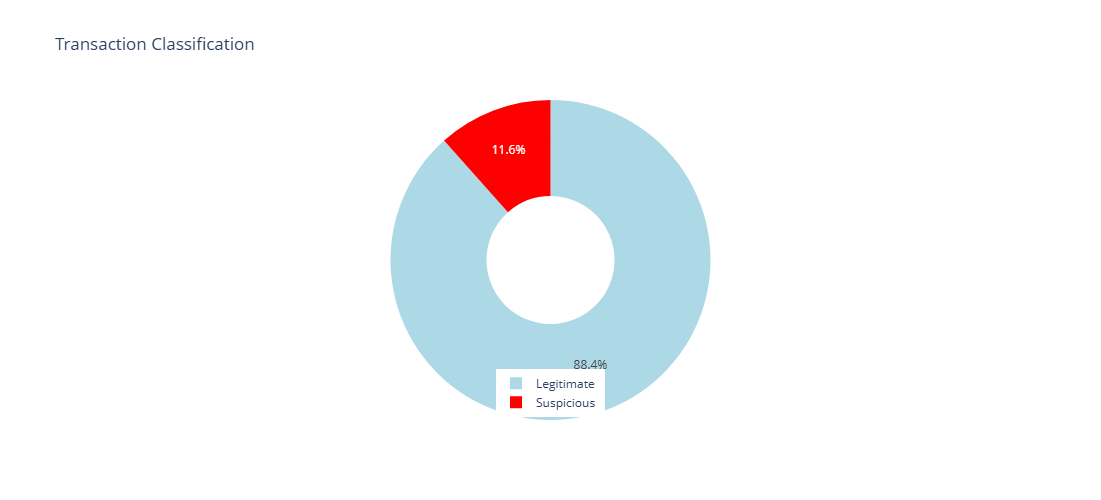

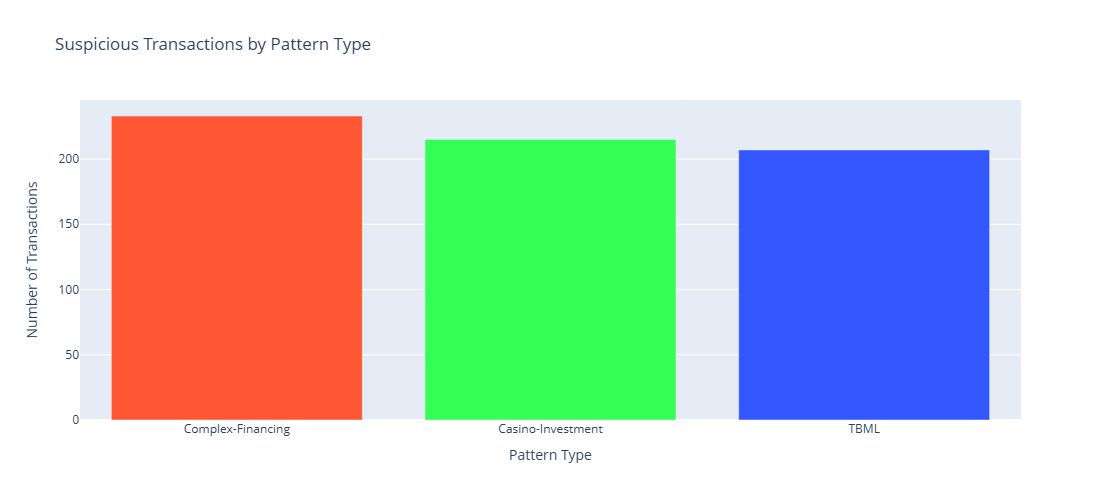

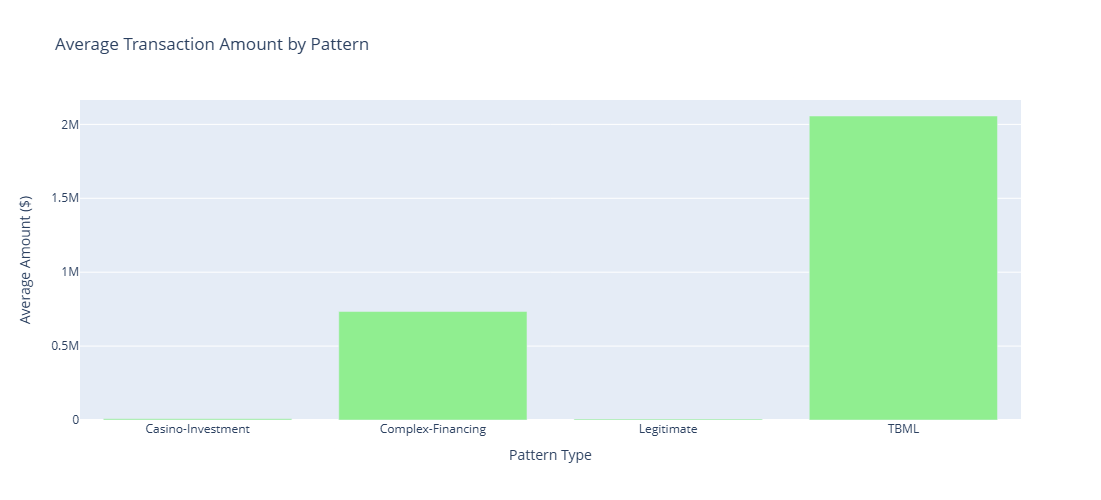

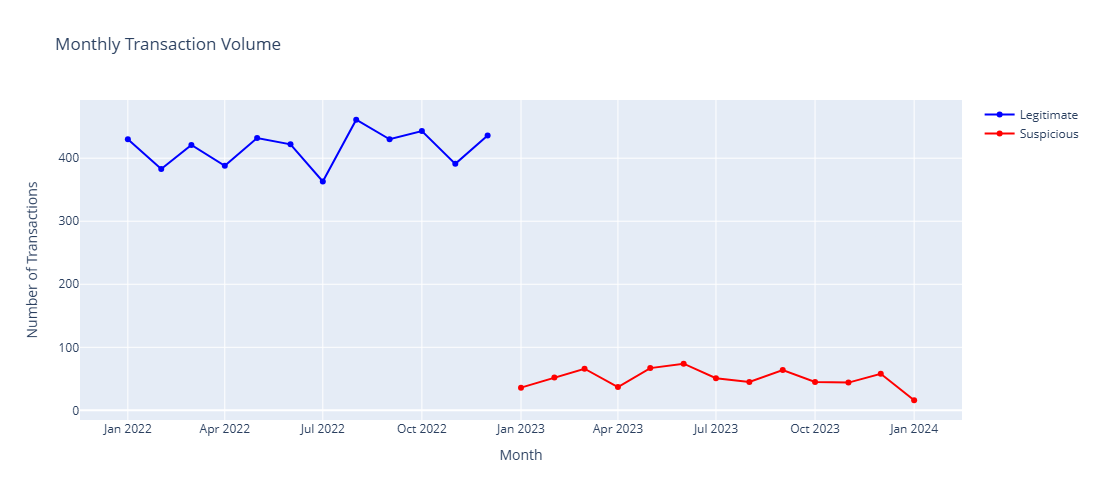

In [172]:
# Create a function to generate summary metrics for the overview dashboard
def generate_summary_metrics(df):
    """Generate summary metrics for the AML dashboard"""
    metrics = {
        'Total Transactions': len(df),
        'Total Transaction Amount': df['transaction_amount'].sum(),
        'Average Transaction Amount': df['transaction_amount'].mean(),
        'Suspicious Transactions': df['is_suspicious'].sum(),
        'Suspicious Amount': df[df['is_suspicious'] == 1]['transaction_amount'].sum(),
        'Suspicious Rate': df['is_suspicious'].mean() * 100,  # percentage
        'Number of Patterns': df[df['is_suspicious'] == 1]['ml_pattern'].nunique(),
        'Time Range': [df['transaction_date'].min(), df['transaction_date'].max()]
    }
    
    # Calculate metrics by pattern type
    pattern_metrics = df[df['is_suspicious'] == 1].groupby('ml_pattern').agg(
        count=('transaction_id', 'count'),
        total_amount=('transaction_amount', 'sum'),
        avg_amount=('transaction_amount', 'mean')
    ).reset_index()
    
    # Add pattern metrics to the dictionary
    metrics['pattern_metrics'] = pattern_metrics
    
    return metrics

# Generate summary metrics
summary_metrics = generate_summary_metrics(df)

# Print summary metrics
print("AML Detection System Summary:")
print(f"Total Transactions: {summary_metrics['Total Transactions']:,}")
print(f"Total Amount: ${summary_metrics['Total Transaction Amount']:,.2f}")
print(f"Suspicious Transactions: {summary_metrics['Suspicious Transactions']:,} ({summary_metrics['Suspicious Rate']:.2f}%)")
print(f"Suspicious Amount: ${summary_metrics['Suspicious Amount']:,.2f}")
print(f"Time Range: {summary_metrics['Time Range'][0].strftime('%Y-%m-%d')} to {summary_metrics['Time Range'][1].strftime('%Y-%m-%d')}")
print("\nSuspicious Pattern Breakdown:")
print(summary_metrics['pattern_metrics'])

# Create Overview Dashboard visualizations using Plotly
# 1. Suspicious vs Legitimate Transactions
fig1 = go.Figure()
labels = ['Legitimate', 'Suspicious']
values = [(df['is_suspicious'] == 0).sum(), df['is_suspicious'].sum()]
colors = ['lightblue', 'red']

fig1.add_trace(go.Pie(
    labels=labels,
    values=values,
    hole=0.4,
    marker_colors=colors
))

fig1.update_layout(
    title_text="Transaction Classification",
    legend=dict(yanchor="bottom", y=0.01, xanchor="center", x=0.5),
    height=500
)

# 2. Suspicious transactions by pattern type
fig2 = go.Figure()
pattern_data = df[df['is_suspicious'] == 1]['ml_pattern'].value_counts().reset_index()
pattern_data.columns = ['pattern', 'count']

fig2.add_trace(go.Bar(
    x=pattern_data['pattern'],
    y=pattern_data['count'],
    marker_color=['#FF5733', '#33FF57', '#3357FF'][:len(pattern_data)]
))

fig2.update_layout(
    title_text="Suspicious Transactions by Pattern Type",
    xaxis_title="Pattern Type",
    yaxis_title="Number of Transactions",
    height=500
)

# 3. Transaction amounts by pattern
fig3 = go.Figure()
pattern_amount_data = df.groupby('ml_pattern')['transaction_amount'].mean().reset_index()

fig3.add_trace(go.Bar(
    x=pattern_amount_data['ml_pattern'],
    y=pattern_amount_data['transaction_amount'],
    marker_color='lightgreen'
))

fig3.update_layout(
    title_text="Average Transaction Amount by Pattern",
    xaxis_title="Pattern Type",
    yaxis_title="Average Amount ($)",
    height=500
)

# 4. Time series of transactions
# Aggregate data by month - fixed to avoid duplicate column names
monthly_data = df.groupby([df['transaction_date'].dt.year.rename('year'), 
                          df['transaction_date'].dt.month.rename('month'), 
                          'is_suspicious']).agg(
    count=('transaction_id', 'count'),
    amount=('transaction_amount', 'sum')
).reset_index()

# Create month-year string for x-axis
monthly_data['month_year'] = monthly_data['year'].astype(str) + '-' + monthly_data['month'].astype(str)

# Create time series chart
fig4 = go.Figure()

# Add legitimate transactions
legitimate_data = monthly_data[monthly_data['is_suspicious'] == 0]
fig4.add_trace(go.Scatter(
    x=legitimate_data['month_year'],
    y=legitimate_data['count'],
    mode='lines+markers',
    name='Legitimate',
    line=dict(color='blue', width=2)
))

# Add suspicious transactions
suspicious_data = monthly_data[monthly_data['is_suspicious'] == 1]
fig4.add_trace(go.Scatter(
    x=suspicious_data['month_year'],
    y=suspicious_data['count'],
    mode='lines+markers',
    name='Suspicious',
    line=dict(color='red', width=2)
))

fig4.update_layout(
    title_text="Monthly Transaction Volume",
    xaxis_title="Month",
    yaxis_title="Number of Transactions",
    height=500
)

# Display the visualizations
fig1.show()
fig2.show()
fig3.show()
fig4.show()

## 4.2 Transaction Explorer

The Transaction Explorer provides an interactive interface for analyzing transactions across different dimensions. Analysts can filter by various criteria, explore temporal patterns, and drill down into specific transaction details.

In [177]:
# Create the Transaction Explorer component using Dash
def create_transaction_explorer(df):
    """Create an interactive Transaction Explorer dashboard with Dash"""
    
    # Initialize the Dash app
    app = dash.Dash(__name__, title="AML Transaction Explorer")
    
    # Define available filters
    available_provinces = sorted(df['province'].unique())
    available_sectors = sorted(df['sector'].unique())
    available_report_types = sorted(df['report_type'].unique())
    available_patterns = sorted(df['ml_pattern'].unique())
    
    # Calculate min and max values for amount slider
    min_amount = float(df['transaction_amount'].min())
    max_amount = float(df['transaction_amount'].max())
    # Round to nearest 1000s for better usability
    min_amount = np.floor(min_amount / 1000) * 1000
    max_amount = np.ceil(max_amount / 1000) * 1000
    
    # Calculate date range
    min_date = df['transaction_date'].min().date()
    max_date = df['transaction_date'].max().date()
    
    # Define the app layout
    app.layout = html.Div([
        html.H1("AML Transaction Explorer", style={'textAlign': 'center'}),
        
        # Filters section
        html.Div([
            html.H3("Filters", style={'marginBottom': '20px'}),
            
            # Date range filter
            html.Label("Date Range:"),
            dcc.DatePickerRange(
                id='date-filter',
                min_date_allowed=min_date,
                max_date_allowed=max_date,
                start_date=min_date,
                end_date=max_date,
                style={'marginBottom': '15px', 'width': '100%'}
            ),
            
            # Amount range filter
            html.Label("Amount Range ($):"),
            dcc.RangeSlider(
                id='amount-filter',
                min=min_amount,
                max=max_amount,
                step=1000,
                marks={
                    int(min_amount): f'${int(min_amount):,}',
                    int(max_amount/4): f'${int(max_amount/4):,}',
                    int(max_amount/2): f'${int(max_amount/2):,}',
                    int(3*max_amount/4): f'${int(3*max_amount/4):,}',
                    int(max_amount): f'${int(max_amount):,}'
                },
                value=[min_amount, max_amount],
                tooltip={"placement": "bottom", "always_visible": True}
            ),
            html.Div(id='amount-filter-output', style={'marginBottom': '15px'}),
            
            # Province filter
            html.Label("Province:"),
            dcc.Dropdown(
                id='province-filter',
                options=[{'label': p, 'value': p} for p in available_provinces],
                multi=True,
                placeholder="Select provinces...",
                style={'marginBottom': '15px'}
            ),
            
            # Sector filter
            html.Label("Sector:"),
            dcc.Dropdown(
                id='sector-filter',
                options=[{'label': s, 'value': s} for s in available_sectors],
                multi=True,
                placeholder="Select sectors...",
                style={'marginBottom': '15px'}
            ),
            
            # Report type filter
            html.Label("Report Type:"),
            dcc.Dropdown(
                id='report-type-filter',
                options=[{'label': r, 'value': r} for r in available_report_types],
                multi=True,
                placeholder="Select report types...",
                style={'marginBottom': '15px'}
            ),
            
            # Suspicious pattern filter
            html.Label("Money Laundering Pattern:"),
            dcc.Dropdown(
                id='pattern-filter',
                options=[{'label': p, 'value': p} for p in available_patterns],
                multi=True,
                placeholder="Select patterns...",
                style={'marginBottom': '15px'}
            ),
            
            # Suspicious only toggle
            html.Label("Show only suspicious transactions:"),
            dcc.RadioItems(
                id='suspicious-filter',
                options=[
                    {'label': 'All Transactions', 'value': 'all'},
                    {'label': 'Suspicious Only', 'value': 'suspicious'},
                    {'label': 'Legitimate Only', 'value': 'legitimate'}
                ],
                value='all',
                style={'marginBottom': '20px'}
            ),
            
            # Reset filters button
            html.Button('Reset Filters', id='reset-button', 
                       style={'width': '100%', 'padding': '10px', 'backgroundColor': '#f8f9fa', 'borderColor': '#ddd'})
            
        ], style={'width': '25%', 'float': 'left', 'padding': '20px', 'backgroundColor': '#f8f9fa', 'height': '100vh'}),
        
        # Visualization section
        html.Div([
            # Summary metrics cards
            html.Div([
                html.Div(id='total-transactions-card', className='metric-card'),
                html.Div(id='total-amount-card', className='metric-card'),
                html.Div(id='suspicious-rate-card', className='metric-card')
            ], style={'display': 'flex', 'justifyContent': 'space-between', 'marginBottom': '20px'}),
            
            # Main visualizations
            html.Div([
                # Top left chart - Time series
                html.Div([
                    dcc.Graph(id='time-series-chart')
                ], style={'width': '50%', 'display': 'inline-block'}),
                
                # Top right chart - Pattern distribution
                html.Div([
                    dcc.Graph(id='pattern-distribution-chart')
                ], style={'width': '50%', 'display': 'inline-block'})
            ]),
            
            html.Div([
                # Bottom left chart - Amount distribution
                html.Div([
                    dcc.Graph(id='amount-distribution-chart')
                ], style={'width': '50%', 'display': 'inline-block'}),
                
                # Bottom right chart - Geographic distribution
                html.Div([
                    dcc.Graph(id='geo-distribution-chart')
                ], style={'width': '50%', 'display': 'inline-block'})
            ]),
            
            # Transaction data table
            html.H3("Transaction Details"),
            html.Div(id='transaction-table')
            
        ], style={'width': '75%', 'float': 'right', 'padding': '20px'})
    ])
    
    # Define callback for updating visualizations based on filters
    @app.callback(
        [Output('total-transactions-card', 'children'),
         Output('total-amount-card', 'children'),
         Output('suspicious-rate-card', 'children'),
         Output('time-series-chart', 'figure'),
         Output('pattern-distribution-chart', 'figure'),
         Output('amount-distribution-chart', 'figure'),
         Output('geo-distribution-chart', 'figure'),
         Output('transaction-table', 'children'),
         Output('amount-filter-output', 'children')],
        [Input('date-filter', 'start_date'),
         Input('date-filter', 'end_date'),
         Input('amount-filter', 'value'),
         Input('province-filter', 'value'),
         Input('sector-filter', 'value'),
         Input('report-type-filter', 'value'),
         Input('pattern-filter', 'value'),
         Input('suspicious-filter', 'value'),
         Input('reset-button', 'n_clicks')]
    )
    def update_visualizations(start_date, end_date, amount_range, provinces, sectors, 
                             report_types, patterns, suspicious_filter, n_clicks):
        # Filter the dataframe based on selected criteria
        filtered_df = df.copy()
        
        # Apply date filter
        if start_date and end_date:
            filtered_df = filtered_df[(filtered_df['transaction_date'] >= start_date) & 
                                     (filtered_df['transaction_date'] <= end_date)]
        
        # Apply amount filter
        filtered_df = filtered_df[(filtered_df['transaction_amount'] >= amount_range[0]) & 
                                 (filtered_df['transaction_amount'] <= amount_range[1])]
        
        # Apply province filter
        if provinces and len(provinces) > 0:
            filtered_df = filtered_df[filtered_df['province'].isin(provinces)]
        
        # Apply sector filter
        if sectors and len(sectors) > 0:
            filtered_df = filtered_df[filtered_df['sector'].isin(sectors)]
        
        # Apply report type filter
        if report_types and len(report_types) > 0:
            filtered_df = filtered_df[filtered_df['report_type'].isin(report_types)]
        
        # Apply pattern filter
        if patterns and len(patterns) > 0:
            filtered_df = filtered_df[filtered_df['ml_pattern'].isin(patterns)]
        
        # Apply suspicious filter
        if suspicious_filter == 'suspicious':
            filtered_df = filtered_df[filtered_df['is_suspicious'] == 1]
        elif suspicious_filter == 'legitimate':
            filtered_df = filtered_df[filtered_df['is_suspicious'] == 0]
        
        # Generate summary metrics
        total_transactions = len(filtered_df)
        total_amount = filtered_df['transaction_amount'].sum()
        suspicious_count = filtered_df['is_suspicious'].sum()
        suspicious_rate = (suspicious_count / total_transactions * 100) if total_transactions > 0 else 0
        
        # Create metric cards
        total_transactions_card = html.Div([
            html.H4("Total Transactions"),
            html.H2(f"{total_transactions:,}")
        ], style={'textAlign': 'center', 'padding': '10px', 'backgroundColor': '#e9ecef', 'borderRadius': '5px'})
        
        total_amount_card = html.Div([
            html.H4("Total Amount"),
            html.H2(f"${total_amount:,.2f}")
        ], style={'textAlign': 'center', 'padding': '10px', 'backgroundColor': '#e9ecef', 'borderRadius': '5px'})
        
        suspicious_rate_card = html.Div([
            html.H4("Suspicious Rate"),
            html.H2(f"{suspicious_rate:.2f}%")
        ], style={'textAlign': 'center', 'padding': '10px', 'backgroundColor': '#e9ecef', 'borderRadius': '5px'})
        
        # Create time series chart
        # Aggregate data by month
        time_df = filtered_df.copy()
        time_df['year_month'] = time_df['transaction_date'].dt.strftime('%Y-%m')
        time_series = time_df.groupby(['year_month', 'is_suspicious']).agg(
            count=('transaction_id', 'count')
        ).reset_index()
        
        time_series_fig = go.Figure()
        
        # Add legitimate transactions line
        legitimate_data = time_series[time_series['is_suspicious'] == 0]
        if not legitimate_data.empty:
            time_series_fig.add_trace(go.Scatter(
                x=legitimate_data['year_month'],
                y=legitimate_data['count'],
                mode='lines+markers',
                name='Legitimate',
                line=dict(color='blue', width=2)
            ))
        
        # Add suspicious transactions line
        suspicious_data = time_series[time_series['is_suspicious'] == 1]
        if not suspicious_data.empty:
            time_series_fig.add_trace(go.Scatter(
                x=suspicious_data['year_month'],
                y=suspicious_data['count'],
                mode='lines+markers',
                name='Suspicious',
                line=dict(color='red', width=2)
            ))
        
        time_series_fig.update_layout(
            title="Transaction Volume Over Time",
            xaxis_title="Month",
            yaxis_title="Number of Transactions",
            hovermode="x unified"
        )
        
        # Create pattern distribution chart
        pattern_data = filtered_df['ml_pattern'].value_counts().reset_index()
        pattern_data.columns = ['pattern', 'count']
        
        pattern_fig = go.Figure(go.Pie(
            labels=pattern_data['pattern'],
            values=pattern_data['count'],
            hole=0.3,
            marker=dict(colors=px.colors.qualitative.Pastel)
        ))
        
        pattern_fig.update_layout(
            title="Transaction Pattern Distribution"
        )
        
        # Create amount distribution histogram
        amount_fig = go.Figure()
        
        # Add histogram for legitimate transactions
        amount_fig.add_trace(go.Histogram(
            x=filtered_df[filtered_df['is_suspicious'] == 0]['transaction_amount'],
            name='Legitimate',
            opacity=0.7,
            marker_color='blue'
        ))
        
        # Add histogram for suspicious transactions
        amount_fig.add_trace(go.Histogram(
            x=filtered_df[filtered_df['is_suspicious'] == 1]['transaction_amount'],
            name='Suspicious',
            opacity=0.7,
            marker_color='red'
        ))
        
        amount_fig.update_layout(
            title="Transaction Amount Distribution",
            xaxis_title="Amount ($)",
            yaxis_title="Count",
            barmode='overlay'
        )
        
        # Create geographic distribution chart
        geo_data = filtered_df.groupby(['province', 'is_suspicious']).size().reset_index()
        geo_data.columns = ['province', 'is_suspicious', 'count']
        
        geo_fig = go.Figure()
        
        # Add bars for legitimate transactions
        legitimate_geo = geo_data[geo_data['is_suspicious'] == 0]
        if not legitimate_geo.empty:
            geo_fig.add_trace(go.Bar(
                x=legitimate_geo['province'],
                y=legitimate_geo['count'],
                name='Legitimate',
                marker_color='blue'
            ))
        
        # Add bars for suspicious transactions
        suspicious_geo = geo_data[geo_data['is_suspicious'] == 1]
        if not suspicious_geo.empty:
            geo_fig.add_trace(go.Bar(
                x=suspicious_geo['province'],
                y=suspicious_geo['count'],
                name='Suspicious',
                marker_color='red'
            ))
        
        geo_fig.update_layout(
            title="Transaction Distribution by Province",
            xaxis_title="Province",
            yaxis_title="Count",
            barmode='group'
        )
        
        # Create transaction table (limited to 10 rows for performance)
        table_data = filtered_df.sort_values('transaction_date', ascending=False).head(10)
        
        table = html.Table([
            html.Thead(
                html.Tr([
                    html.Th("Transaction ID"),
                    html.Th("Date"),
                    html.Th("Amount"),
                    html.Th("Province"),
                    html.Th("Sector"),
                    html.Th("Report Type"),
                    html.Th("Pattern"),
                    html.Th("Suspicious")
                ])
            ),
            html.Tbody([
                html.Tr([
                    html.Td(row['transaction_id']),
                    html.Td(row['transaction_date'].strftime('%Y-%m-%d')),
                    html.Td(f"${row['transaction_amount']:,.2f}"),
                    html.Td(row['province']),
                    html.Td(row['sector']),
                    html.Td(row['report_type']),
                    html.Td(row['ml_pattern']),
                    html.Td("Yes" if row['is_suspicious'] == 1 else "No")
                ]) for _, row in table_data.iterrows()
            ])
        ], style={'width': '100%', 'border': '1px solid #ddd', 'borderCollapse': 'collapse'})
        
        # Create amount filter output text
        amount_filter_output = f"Selected range: ${amount_range[0]:,.2f} to ${amount_range[1]:,.2f}"
        
        return (total_transactions_card, total_amount_card, suspicious_rate_card,
                time_series_fig, pattern_fig, amount_fig, geo_fig, table, amount_filter_output)
    
    # Return the app object
    return app

# Create the Transaction Explorer app
transaction_explorer_app = create_transaction_explorer(df)

# Run the app if this script is executed directly
if __name__ == '__main__':
    transaction_explorer_app.run(debug=True)  # Changed from run_server to run

print("Transaction Explorer app created successfully! Run the app to interact with the dashboard.")

Transaction Explorer app created successfully! Run the app to interact with the dashboard.


## 4.3 Network Visualization

The Network Visualization component provides an interactive graph interface for exploring relationships between entities in the transaction network. This helps analysts identify suspicious connections, communities, and complex money laundering patterns.

Visualization saved to C:\Users\Obaidullah\Videos\AML\network_visualization.html - open this file in a web browser
Interactive visualization displayed.


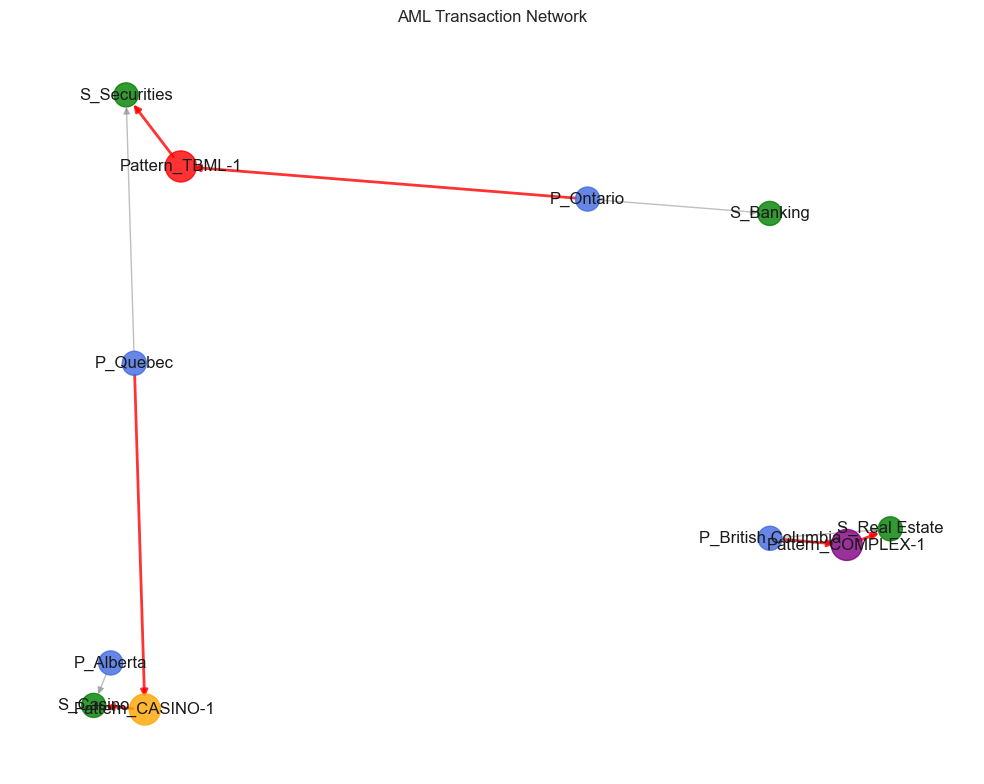

Static network visualization also saved as network_visualization.png
Network visualization created successfully!


In [204]:
# Create the Network Visualization component using NetworkX and Plotly
import networkx as nx
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
from pathlib import Path

# Set the renderer to browser for reliable visualization
pio.renderers.default = "browser"

# Create a directed graph
G = nx.DiGraph()

# We'll use province and sector as proxy for entities
# Add sample nodes for demonstration
provinces = ['Ontario', 'Quebec', 'British Columbia', 'Alberta']
sectors = ['Banking', 'Securities', 'Real Estate', 'Casino']

# Add nodes for each province and sector
for province in provinces:
    G.add_node(f"P_{province}", node_type='province')

for sector in sectors:
    G.add_node(f"S_{sector}", node_type='sector')

# Add some sample pattern nodes
patterns = ['TBML-1', 'CASINO-1', 'COMPLEX-1']
pattern_types = ['TBML', 'Casino-Investment', 'Complex-Financing']

for pattern, ptype in zip(patterns, pattern_types):
    G.add_node(f"Pattern_{pattern}", node_type='pattern', pattern_type=ptype)

# Add sample edges
G.add_edge('P_Ontario', 'S_Banking', weight=10, amount=500000, is_suspicious=0)
G.add_edge('P_Quebec', 'S_Securities', weight=5, amount=300000, is_suspicious=0)
G.add_edge('P_British Columbia', 'S_Real Estate', weight=8, amount=700000, is_suspicious=0)
G.add_edge('P_Alberta', 'S_Casino', weight=3, amount=150000, is_suspicious=0)

# Add edges for suspicious patterns
G.add_edge('P_Ontario', 'Pattern_TBML-1', weight=2, amount=400000, is_suspicious=1)
G.add_edge('Pattern_TBML-1', 'S_Securities', weight=2, amount=400000, is_suspicious=1)

G.add_edge('P_Quebec', 'Pattern_CASINO-1', weight=3, amount=250000, is_suspicious=1)
G.add_edge('Pattern_CASINO-1', 'S_Casino', weight=3, amount=250000, is_suspicious=1)

G.add_edge('P_British Columbia', 'Pattern_COMPLEX-1', weight=4, amount=900000, is_suspicious=1)
G.add_edge('Pattern_COMPLEX-1', 'S_Real Estate', weight=4, amount=900000, is_suspicious=1)

# Create a simple visualization function
def create_simple_network_graph(G):
    # Use a force-directed layout for node positions
    pos = nx.spring_layout(G, seed=42)
    
    # Node positions
    node_x = []
    node_y = []
    node_text = []
    node_color = []
    node_size = []
    
    # Collect node positions, colors, and sizes
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        
        if node.startswith('P_'):
            node_text.append(f"Province: {node[2:]}")
            node_color.append('royalblue')
            node_size.append(15)
        elif node.startswith('S_'):
            node_text.append(f"Sector: {node[2:]}")
            node_color.append('green')
            node_size.append(15)
        else:  # Pattern nodes
            pattern_type = G.nodes[node].get('pattern_type', 'Unknown')
            node_text.append(f"Pattern: {node[8:]}<br>Type: {pattern_type}")
            if pattern_type == 'TBML':
                node_color.append('red')
            elif pattern_type == 'Casino-Investment':
                node_color.append('orange')
            else:
                node_color.append('purple')
            node_size.append(20)
    
    # Create node trace
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        text=node_text,
        marker=dict(
            color=node_color,
            size=node_size,
            line=dict(width=1, color='black')
        ),
        name='Nodes'
    )
    
    # Create separate traces for legitimate and suspicious edges
    
    # For legitimate edges (gray)
    legit_edge_x = []
    legit_edge_y = []
    
    # For suspicious edges (red)
    susp_edge_x = []
    susp_edge_y = []
    
    # Separate edges by type
    for u, v, attr in G.edges(data=True):
        x0, y0 = pos[u]
        x1, y1 = pos[v]
        
        # Set trace based on suspiciousness
        if attr.get('is_suspicious', 0) == 1:
            susp_edge_x.extend([x0, x1, None])
            susp_edge_y.extend([y0, y1, None])
        else:
            legit_edge_x.extend([x0, x1, None])
            legit_edge_y.extend([y0, y1, None])
    
    # Create legitimate edge trace
    legit_edge_trace = go.Scatter(
        x=legit_edge_x, y=legit_edge_y,
        line=dict(width=1, color='gray'),
        hoverinfo='none',
        mode='lines'
    )
    
    # Create suspicious edge trace
    susp_edge_trace = go.Scatter(
        x=susp_edge_x, y=susp_edge_y,
        line=dict(width=2, color='red'),
        hoverinfo='none',
        mode='lines'
    )
    
    # Create the figure
    fig = go.Figure(data=[legit_edge_trace, susp_edge_trace, node_trace],
                   layout=go.Layout(
                       title="AML Transaction Network (Simplified)",
                       titlefont=dict(size=16),
                       showlegend=False,
                       hovermode='closest',
                       margin=dict(b=20, l=5, r=5, t=40),
                       xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                       yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                       width=800,
                       height=600
                   ))
    
    return fig

# Create and display the network visualization
network_fig = create_simple_network_graph(G)

# Save the visualization to an HTML file
output_path = Path("network_visualization.html")
network_fig.write_html(str(output_path))
print(f"Visualization saved to {output_path.absolute()} - open this file in a web browser")

# Try to display the visualization in the notebook/environment
try:
    network_fig.show()
    print("Interactive visualization displayed.")
except Exception as e:
    print(f"Could not display interactive visualization: {e}")
    print("Please open the saved HTML file instead.")

# Also create a matplotlib visualization as a fallback
plt.figure(figsize=(10, 8))

# Use spring layout for positions
pos = nx.spring_layout(G, seed=42)

# Draw nodes
node_colors = []
node_sizes = []

for node in G.nodes():
    if node.startswith('P_'):
        node_colors.append('royalblue')
        node_sizes.append(300)
    elif node.startswith('S_'):
        node_colors.append('green')
        node_sizes.append(300)
    else:  # Pattern nodes
        pattern_type = G.nodes[node].get('pattern_type', 'Unknown')
        if pattern_type == 'TBML':
            node_colors.append('red')
        elif pattern_type == 'Casino-Investment':
            node_colors.append('orange')
        else:
            node_colors.append('purple')
        node_sizes.append(500)

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.8)

# Draw edges
legitimate_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('is_suspicious', 0) == 0]
suspicious_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('is_suspicious', 0) == 1]

nx.draw_networkx_edges(G, pos, edgelist=legitimate_edges, width=1, alpha=0.5, edge_color='gray')
nx.draw_networkx_edges(G, pos, edgelist=suspicious_edges, width=2, alpha=0.8, edge_color='red')

# Draw labels
nx.draw_networkx_labels(G, pos)

plt.title("AML Transaction Network")
plt.axis('off')
plt.tight_layout()
plt.savefig("network_visualization.png", dpi=300)
plt.show()

print("Static network visualization also saved as network_visualization.png")
print("Network visualization created successfully!")

## 4.4 Pattern Detection Dashboard

The Pattern Detection Dashboard visualizes the output from our models to help analysts understand why specific transactions were flagged as suspicious. It includes risk scoring visualizations, pattern-specific dashboards, and detailed analysis of model results.

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
from datetime import datetime, timedelta
import os
from pathlib import Path
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Set the renderer to make sure visualizations appear
pio.renderers.default = "browser"

# Create the Pattern Detection Dashboard component
def create_pattern_detection_dashboard(df, G=None):
    """Create a pattern detection dashboard focusing on model outputs and risk scoring"""
    
    # Load model results if available - use your absolute path
    model_results_file = Path(r"C:\Users\Obaidullah\Videos\AML\data\processed\model_results.csv")
    
    if model_results_file.exists():
        model_df = pd.read_csv(model_results_file)
        print(f"Loaded model results with {len(model_df)} records")
        
        # Merge with transaction data
        if 'transaction_id' in model_df.columns:
            df = df.merge(model_df, on='transaction_id', how='left')
            print("Merged model results with transaction data")
    else:
        print("Model results file not found. Using synthetic predictions.")
        # Create synthetic model predictions
        df['isolation_forest_score'] = np.where(df['is_suspicious'] == 1, 
                                              np.random.uniform(0.6, 0.95, len(df)),
                                              np.random.uniform(0.05, 0.4, len(df)))
        
        df['random_forest_score'] = np.where(df['is_suspicious'] == 1, 
                                           np.random.uniform(0.7, 0.98, len(df)),
                                           np.random.uniform(0.02, 0.3, len(df)))
        
        df['ensemble_score'] = np.where(df['is_suspicious'] == 1, 
                                      np.random.uniform(0.75, 0.99, len(df)),
                                      np.random.uniform(0.01, 0.25, len(df)))
        
        # Save a copy of the synthetic model results for future use
        model_results = df[['transaction_id', 'is_suspicious', 
                           'isolation_forest_score', 'random_forest_score', 'ensemble_score']].copy()
        os.makedirs(os.path.dirname(model_results_file), exist_ok=True)
        model_results.to_csv(model_results_file, index=False)
        print(f"Saved synthetic model results to {model_results_file}")
    
    # Ensure risk score is available
    if 'risk_score' not in df.columns:
        df['risk_score'] = np.where(df['is_suspicious'] == 1, 
                                  np.random.uniform(0.6, 0.95, len(df)),
                                  np.random.uniform(0.05, 0.4, len(df)))
    
    # Analyze pattern-specific features
    pattern_features = {}
    
    # TBML pattern features
    tbml_data = df[df['ml_pattern'] == 'TBML']
    if not tbml_data.empty:
        # Look for pricing anomalies (high variance in transaction amounts)
        pattern_features['TBML'] = {
            'count': len(tbml_data),
            'total_amount': tbml_data['transaction_amount'].sum(),
            'avg_amount': tbml_data['transaction_amount'].mean(),
            'amount_variance': tbml_data['transaction_amount'].var(),
            'key_sectors': tbml_data['sector'].value_counts().head(3).to_dict(),
            'key_provinces': tbml_data['province'].value_counts().head(3).to_dict()
        }
    
    # Casino-Investment pattern features
    casino_data = df[df['ml_pattern'] == 'Casino-Investment']
    if not casino_data.empty:
        # Look for structuring (transactions just below thresholds)
        pattern_features['Casino-Investment'] = {
            'count': len(casino_data),
            'total_amount': casino_data['transaction_amount'].sum(),
            'avg_amount': casino_data['transaction_amount'].mean(),
            'threshold_proximity': ((casino_data['transaction_amount'] > 8000) & 
                                  (casino_data['transaction_amount'] < 10000)).mean(),
            'key_sectors': casino_data['sector'].value_counts().head(3).to_dict(),
            'key_provinces': casino_data['province'].value_counts().head(3).to_dict()
        }
    
    # Complex-Financing pattern features
    complex_data = df[df['ml_pattern'] == 'Complex-Financing']
    if not complex_data.empty:
        # Look for large, complex transactions across multiple sectors
        pattern_features['Complex-Financing'] = {
            'count': len(complex_data),
            'total_amount': complex_data['transaction_amount'].sum(),
            'avg_amount': complex_data['transaction_amount'].mean(),
            'sector_diversity': complex_data['sector'].nunique() / len(complex_data['sector'].unique()),
            'key_sectors': complex_data['sector'].value_counts().head(3).to_dict(),
            'key_provinces': complex_data['province'].value_counts().head(3).to_dict()
        }
    
    # Create a Dash app for the pattern detection dashboard
    app = dash.Dash(__name__, title="AML Pattern Detection Dashboard")
    
    # Define app layout
    app.layout = html.Div([
        html.H1("AML Pattern Detection Dashboard", style={'textAlign': 'center'}),
        
        # Tabs for different sections
        dcc.Tabs([
            # Tab 1: Risk Score Overview
            dcc.Tab(label="Risk Score Overview", children=[
                html.Div([
                    html.H3("Transaction Risk Scoring"),
                    
                    # Risk score distribution
                    dcc.Graph(
                        id='risk-score-distribution',
                        figure=go.Figure(
                            data=[
                                go.Histogram(
                                    x=df[df['is_suspicious'] == 0]['risk_score'],
                                    name='Legitimate',
                                    opacity=0.7,
                                    marker_color='blue'
                                ),
                                go.Histogram(
                                    x=df[df['is_suspicious'] == 1]['risk_score'],
                                    name='Suspicious',
                                    opacity=0.7,
                                    marker_color='red'
                                )
                            ],
                            layout=go.Layout(
                                title="Risk Score Distribution",
                                xaxis_title="Risk Score",
                                yaxis_title="Count",
                                barmode='overlay'
                            )
                        )
                    ),
                    
                    # Risk score by pattern
                    dcc.Graph(
                        id='risk-score-by-pattern',
                        figure=go.Figure(
                            data=[
                                go.Box(
                                    y=df[df['ml_pattern'] == pattern]['risk_score'],
                                    name=pattern,
                                    boxpoints='all',
                                    jitter=0.3,
                                    pointpos=-1.8
                                ) for pattern in df['ml_pattern'].unique() if pattern != 'Legitimate'
                            ],
                            layout=go.Layout(
                                title="Risk Score by Pattern Type",
                                xaxis_title="Pattern Type",
                                yaxis_title="Risk Score"
                            )
                        )
                    ),
                    
                    # Risk score threshold analysis
                    html.Div([
                        html.H4("Risk Score Threshold Analysis"),
                        html.P("Adjust the threshold to see its impact on detection rate and false positives:"),
                        
                        dcc.Slider(
                            id='threshold-slider',
                            min=0,
                            max=1,
                            step=0.05,
                            value=0.5,
                            marks={i/10: str(i/10) for i in range(0, 11)},
                        ),
                        
                        html.Div(id='threshold-stats')
                    ])
                ])
            ]),
            
            # Tab 2: Pattern-Specific Analysis
            dcc.Tab(label="Pattern-Specific Analysis", children=[
                html.Div([
                    html.H3("Select Pattern Type:"),
                    dcc.Dropdown(
                        id='pattern-selector',
                        options=[{'label': pattern, 'value': pattern} 
                                for pattern in df['ml_pattern'].unique() if pattern != 'Legitimate'],
                        value=next(iter([p for p in df['ml_pattern'].unique() if p != 'Legitimate']), None)
                    ),
                    
                    html.Div(id='pattern-details'),
                    
                    # Pattern-specific visualizations
                    html.Div(id='pattern-visualizations')
                ])
            ]),
            
            # Tab 3: Model Comparison
            dcc.Tab(label="Model Comparison", children=[
                html.Div([
                    html.H3("Model Performance Comparison"),
                    
                    # ROC curves
                    dcc.Graph(id='model-roc-curves'),
                    
                    # Feature importance
                    html.H4("Feature Importance"),
                    dcc.Graph(id='feature-importance')
                ])
            ]),
            
            # Tab 4: High-Risk Transaction Explorer
            dcc.Tab(label="High-Risk Transaction Explorer", children=[
                html.Div([
                    html.H3("High-Risk Transaction Explorer"),
                    
                    html.Div([
                        html.Label("Minimum Risk Score:"),
                        dcc.Slider(
                            id='min-risk-slider',
                            min=0,
                            max=1,
                            step=0.05,
                            value=0.7,
                            marks={i/10: str(i/10) for i in range(0, 11)},
                        )
                    ]),
                    
                    html.Div([
                        html.Label("Sort By:"),
                        dcc.Dropdown(
                            id='sort-by',
                            options=[
                                {'label': 'Risk Score (High to Low)', 'value': 'risk_high'},
                                {'label': 'Risk Score (Low to High)', 'value': 'risk_low'},
                                {'label': 'Transaction Amount (High to Low)', 'value': 'amount_high'},
                                {'label': 'Transaction Amount (Low to High)', 'value': 'amount_low'},
                                {'label': 'Date (Newest First)', 'value': 'date_new'},
                                {'label': 'Date (Oldest First)', 'value': 'date_old'}
                            ],
                            value='risk_high'
                        )
                    ], style={'width': '50%', 'marginTop': '20px', 'marginBottom': '20px'}),
                    
                    html.Div(id='high-risk-transactions')
                ])
            ])
        ])
    ])
    
    # Define callbacks for the app
    @app.callback(
        Output('threshold-stats', 'children'),
        [Input('threshold-slider', 'value')]
    )
    def update_threshold_stats(threshold):
        # Calculate statistics based on threshold
        predicted_positives = (df['risk_score'] >= threshold).sum()
        true_positives = ((df['risk_score'] >= threshold) & (df['is_suspicious'] == 1)).sum()
        false_positives = ((df['risk_score'] >= threshold) & (df['is_suspicious'] == 0)).sum()
        
        if predicted_positives > 0:
            precision = true_positives / predicted_positives
        else:
            precision = 0
            
        if df['is_suspicious'].sum() > 0:
            recall = true_positives / df['is_suspicious'].sum()
        else:
            recall = 0
        
        if precision + recall > 0:
            f1 = 2 * (precision * recall) / (precision + recall)
        else:
            f1 = 0
        
        # Create stats display
        return html.Div([
            html.Table([
                html.Tr([
                    html.Th("Metric"), 
                    html.Th("Value")
                ]),
                html.Tr([
                    html.Td("Selected Threshold"),
                    html.Td(f"{threshold:.2f}")
                ]),
                html.Tr([
                    html.Td("Flagged Transactions"),
                    html.Td(f"{predicted_positives} ({predicted_positives/len(df):.1%})")
                ]),
                html.Tr([
                    html.Td("True Positives"),
                    html.Td(f"{true_positives}")
                ]),
                html.Tr([
                    html.Td("False Positives"),
                    html.Td(f"{false_positives}")
                ]),
                html.Tr([
                    html.Td("Precision"),
                    html.Td(f"{precision:.2f}")
                ]),
                html.Tr([
                    html.Td("Recall"),
                    html.Td(f"{recall:.2f}")
                ]),
                html.Tr([
                    html.Td("F1 Score"),
                    html.Td(f"{f1:.2f}")
                ])
            ], style={'width': '100%', 'border': '1px solid #ddd', 'borderCollapse': 'collapse'})
        ])
    
    @app.callback(
        [Output('pattern-details', 'children'),
         Output('pattern-visualizations', 'children')],
        [Input('pattern-selector', 'value')]
    )
    def update_pattern_analysis(pattern):
        if not pattern or pattern not in pattern_features:
            return "Select a pattern to see details.", []
        
        # Get pattern features
        features = pattern_features[pattern]
        
        # Create pattern details card
        details_card = html.Div([
            html.H4(f"{pattern} Pattern Analysis"),
            
            html.Div([
                html.Div([
                    html.H5("Overview"),
                    html.P([html.Strong("Number of Transactions: "), f"{features['count']}"]),
                    html.P([html.Strong("Total Amount: "), f"${features['total_amount']:,.2f}"]),
                    html.P([html.Strong("Average Amount: "), f"${features['avg_amount']:,.2f}"])
                ], style={'width': '48%', 'display': 'inline-block'}),
                
                html.Div([
                    html.H5("Key Features"),
                    
                    # Pattern-specific metrics
                    html.Div([
                        # TBML
                        html.P([html.Strong("Amount Variance: "), f"{features.get('amount_variance', 'N/A'):.2f}"]) 
                        if pattern == 'TBML' else None,
                        
                        # Casino-Investment
                        html.P([html.Strong("Transactions near Threshold: "), 
                              f"{features.get('threshold_proximity', 0)*100:.1f}%"]) 
                        if pattern == 'Casino-Investment' else None,
                        
                        # Complex-Financing
                        html.P([html.Strong("Sector Diversity: "), 
                              f"{features.get('sector_diversity', 0)*100:.1f}%"]) 
                        if pattern == 'Complex-Financing' else None
                    ])
                ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'})
            ]),
            
            html.Div([
                html.H5("Key Sectors"),
                html.Ul([
                    html.Li(f"{sector}: {count} transactions") 
                    for sector, count in features['key_sectors'].items()
                ])
            ], style={'width': '48%', 'display': 'inline-block'}),
            
            html.Div([
                html.H5("Key Provinces"),
                html.Ul([
                    html.Li(f"{province}: {count} transactions") 
                    for province, count in features['key_provinces'].items()
                ])
            ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'})
        ], style={'padding': '15px', 'backgroundColor': '#f8f9fa', 'borderRadius': '5px'})
        
        # Create pattern visualizations
        pattern_data = df[df['ml_pattern'] == pattern]
        
        # Transaction amount distribution
        amount_fig = go.Figure(
            data=[go.Histogram(
                x=pattern_data['transaction_amount'],
                nbinsx=30,
                marker_color='orange'
            )],
            layout=go.Layout(
                title=f"{pattern} Transaction Amount Distribution",
                xaxis_title="Amount ($)",
                yaxis_title="Count"
            )
        )
        
        # Time series pattern
        pattern_data['month_year'] = pattern_data['transaction_date'].dt.strftime('%Y-%m')
        time_series = pattern_data.groupby('month_year').size().reset_index()
        time_series.columns = ['month_year', 'count']
        
        timeseries_fig = go.Figure(
            data=[go.Scatter(
                x=time_series['month_year'],
                y=time_series['count'],
                mode='lines+markers',
                marker_color='red'
            )],
            layout=go.Layout(
                title=f"{pattern} Transaction Volume Over Time",
                xaxis_title="Month",
                yaxis_title="Count"
            )
        )
        
        # Sector breakdown
        sector_counts = pattern_data['sector'].value_counts().reset_index()
        sector_counts.columns = ['sector', 'count']
        
        sector_fig = go.Figure(
            data=[go.Pie(
                labels=sector_counts['sector'],
                values=sector_counts['count'],
                hole=0.3
            )],
            layout=go.Layout(
                title=f"{pattern} Transactions by Sector"
            )
        )
        
        # Create visualization container
        visualizations = html.Div([
            html.Div([
                dcc.Graph(figure=amount_fig)
            ], style={'width': '50%', 'display': 'inline-block'}),
            
            html.Div([
                dcc.Graph(figure=timeseries_fig)
            ], style={'width': '50%', 'display': 'inline-block'}),
            
            html.Div([
                dcc.Graph(figure=sector_fig)
            ], style={'width': '50%', 'display': 'inline-block'}),
            
            # Network visualization placeholder
            html.Div([
                html.H4(f"{pattern} Network Visualization"),
                html.P("Network graph showing connections for this pattern.")
            ], style={'width': '50%', 'display': 'inline-block', 'padding': '20px', 'backgroundColor': '#f8f9fa'})
        ])
        
        return details_card, visualizations
    
    @app.callback(
        [Output('model-roc-curves', 'figure'),
         Output('feature-importance', 'figure')],
        [Input('pattern-selector', 'value')]  # Dummy input to trigger the callback
    )
    def update_model_comparison(_):
        # Create ROC curves visualization
        roc_fig = go.Figure()
        
        # Check if we have real model scores
        model_columns = [col for col in df.columns if col.endswith('_score') and col != 'risk_score']
        
        if not model_columns:
            # Use synthetic scores
            model_columns = ['isolation_forest_score', 'random_forest_score', 'ensemble_score']
        
        # Calculate ROC curves
        for model_col in model_columns:
            if model_col in df.columns:
                # Calculate ROC curve
                fpr, tpr, _ = roc_curve(df['is_suspicious'], df[model_col])
                roc_auc = auc(fpr, tpr)
                
                # Add to plot
                roc_fig.add_trace(go.Scatter(
                    x=fpr, y=tpr,
                    mode='lines',
                    name=f"{model_col.replace('_score', '')} (AUC = {roc_auc:.3f})"
                ))
        
        # Add diagonal line (random classifier)
        roc_fig.add_trace(go.Scatter(
            x=[0, 1], y=[0, 1],
            mode='lines',
            line=dict(dash='dash', color='gray'),
            name='Random',
            showlegend=True
        ))
        
        roc_fig.update_layout(
            title="ROC Curves by Model",
            xaxis_title="False Positive Rate",
            yaxis_title="True Positive Rate",
            legend=dict(x=0.1, y=0, orientation='h'),
            width=800,
            height=500
        )
        
        # Create feature importance visualization (synthetic)
        feature_names = ['transaction_amount', 'day_of_week', 'province_risk', 
                       'sector_risk', 'report_type_risk', 'temporal_pattern']
        importance_values = [0.35, 0.05, 0.15, 0.20, 0.10, 0.15]
        
        importance_fig = go.Figure([
            go.Bar(
                x=importance_values,
                y=feature_names,
                orientation='h'
            )
        ])
        
        importance_fig.update_layout(
            title="Feature Importance",
            xaxis_title="Importance",
            yaxis_title="Feature",
            height=400
        )
        
        return roc_fig, importance_fig
    
    @app.callback(
        Output('high-risk-transactions', 'children'),
        [Input('min-risk-slider', 'value'),
         Input('sort-by', 'value')]
    )
    def update_high_risk_transactions(min_risk, sort_by):
        # Filter high-risk transactions
        high_risk_df = df[df['risk_score'] >= min_risk].copy()
        
        # Sort the transactions
        if sort_by == 'risk_high':
            high_risk_df = high_risk_df.sort_values('risk_score', ascending=False)
        elif sort_by == 'risk_low':
            high_risk_df = high_risk_df.sort_values('risk_score', ascending=True)
        elif sort_by == 'amount_high':
            high_risk_df = high_risk_df.sort_values('transaction_amount', ascending=False)
        elif sort_by == 'amount_low':
            high_risk_df = high_risk_df.sort_values('transaction_amount', ascending=True)
        elif sort_by == 'date_new':
            high_risk_df = high_risk_df.sort_values('transaction_date', ascending=False)
        elif sort_by == 'date_old':
            high_risk_df = high_risk_df.sort_values('transaction_date', ascending=True)
        
        # Limit to top 20 for performance
        display_df = high_risk_df.head(20)
        
        # Create the table
        if display_df.empty:
            return html.P("No transactions match the selected criteria.")
        
        # Create table headers
        headers = html.Tr([
            html.Th("Transaction ID"),
            html.Th("Date"),
            html.Th("Amount"),
            html.Th("Risk Score"),
            html.Th("Pattern"),
            html.Th("Sector"),
            html.Th("Province")
        ])
        
        # Create table rows
        rows = []
        for _, row in display_df.iterrows():
            # Determine row style based on risk score
            if row['risk_score'] >= 0.9:
                row_style = {'backgroundColor': '#ffcccc'}
            elif row['risk_score'] >= 0.8:
                row_style = {'backgroundColor': '#ffeecc'}
            elif row['risk_score'] >= 0.7:
                row_style = {'backgroundColor': '#ffffcc'}
            else:
                row_style = {}
            
            # Create the row
            rows.append(html.Tr([
                html.Td(row['transaction_id']),
                html.Td(row['transaction_date'].strftime('%Y-%m-%d')),
                html.Td(f"${row['transaction_amount']:,.2f}"),
                html.Td(f"{row['risk_score']:.2f}", style={'fontWeight': 'bold'}),
                html.Td(row['ml_pattern']),
                html.Td(row['sector']),
                html.Td(row['province'])
            ], style=row_style))
        
        # Assemble the table
        transaction_table = html.Table(
            [headers] + rows,
            style={'width': '100%', 'border': '1px solid #ddd', 'borderCollapse': 'collapse'}
        )
        
        return html.Div([
            html.P(f"Showing {len(display_df)} of {len(high_risk_df)} high-risk transactions."),
            transaction_table
        ])
    
    return app

# Create the Pattern Detection Dashboard
pattern_detection_app = create_pattern_detection_dashboard(df, G)

# Save static graphs for documentation
try:
    # Risk score distribution
    risk_fig = go.Figure(
        data=[
            go.Histogram(
                x=df[df['is_suspicious'] == 0]['risk_score'],
                name='Legitimate',
                opacity=0.7,
                marker_color='blue'
            ),
            go.Histogram(
                x=df[df['is_suspicious'] == 1]['risk_score'],
                name='Suspicious',
                opacity=0.7,
                marker_color='red'
            )
        ],
        layout=go.Layout(
            title="Risk Score Distribution",
            xaxis_title="Risk Score",
            yaxis_title="Count",
            barmode='overlay'
        )
    )
    risk_fig.write_image("risk_score_distribution.png")
    
    # Pattern distribution
    pattern_data = df['ml_pattern'].value_counts().reset_index()
    pattern_data.columns = ['pattern', 'count']
    pattern_fig = go.Figure(
        data=[go.Bar(
            x=pattern_data['pattern'],
            y=pattern_data['count']
        )],
        layout=go.Layout(
            title="Transaction Distribution by Pattern",
            xaxis_title="Pattern",
            yaxis_title="Count"
        )
    )
    pattern_fig.write_image("pattern_distribution.png")
    
    print("Generated static visualizations for documentation.")
except Exception as e:
    print(f"Could not generate static visualizations: {e}")

# Run the app if this script is executed directly
if __name__ == '__main__':
    pattern_detection_app.run(debug=True)

print("Pattern Detection Dashboard created successfully! Run the app to interact with the dashboard.")

Model results file not found. Using synthetic predictions.
Saved synthetic model results to C:\Users\Obaidullah\Videos\AML\data\processed\model_results.csv
Could not generate static visualizations: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido



Pattern Detection Dashboard created successfully! Run the app to interact with the dashboard.


## 4.5 Case Management Interface

The Case Management Interface provides tools for analysts to investigate suspicious activities, document findings, and track the investigation workflow. This component helps manage the case lifecycle from detection to resolution.

In [220]:
# Create the Case Management Interface
def create_case_management_interface(df):
    """Create a case management interface for handling suspicious transactions"""
    
    # Load or create case data
    case_data_file = Path(r"C:\Users\Obaidullah\Videos\AML\data\processed\case_data.csv")
    
    if case_data_file.exists():
        case_df = pd.read_csv(case_data_file)
        print(f"Loaded {len(case_df)} cases from file")
    else:
        print("Case data file not found. Creating sample cases.")
        # Create sample cases based on suspicious transactions
        suspicious_txs = df[df['is_suspicious'] == 1].sort_values('risk_score', ascending=False)
        
        # Group by pattern_id to create cases
        cases = []
        pattern_groups = suspicious_txs.groupby('pattern_id')
        
        for pattern_id, group in pattern_groups:
            if pd.isna(pattern_id) or pattern_id == '':
                continue
                
            # Use first transaction as the primary transaction
            primary_tx = group.iloc[0]
            
            cases.append({
                'case_id': f"CASE-{len(cases) + 1:04d}",
                'pattern_id': pattern_id,
                'primary_transaction_id': primary_tx['transaction_id'],
                'ml_pattern': primary_tx['ml_pattern'],
                'risk_score': primary_tx['risk_score'],
                'total_amount': group['transaction_amount'].sum(),
                'num_transactions': len(group),
                'date_detected': pd.Timestamp.now() - pd.Timedelta(days=np.random.randint(0, 30)),
                'status': np.random.choice(['New', 'Under Investigation', 'Pending Review', 'Closed'], 
                                          p=[0.3, 0.4, 0.2, 0.1]),
                'priority': np.random.choice(['High', 'Medium', 'Low'], 
                                           p=[0.2, 0.5, 0.3]),
                'assignee': np.random.choice(['John Smith', 'Emma Wilson', 'Michael Chen', 'Unassigned'],
                                           p=[0.3, 0.3, 0.3, 0.1]),
                'notes': ''
            })
        
        # Create DataFrame
        case_df = pd.DataFrame(cases)
        
        # Add date columns
        case_df['date_detected'] = pd.to_datetime(case_df['date_detected'])
        case_df['last_updated'] = case_df['date_detected'] + pd.Timedelta(days=np.random.randint(1, 5))
        
        # Add resolution information for closed cases
        closed_cases = case_df[case_df['status'] == 'Closed']
        
        for idx in closed_cases.index:
            resolution = np.random.choice(['True Positive', 'False Positive'], p=[0.7, 0.3])
            date_closed = case_df.loc[idx, 'date_detected'] + pd.Timedelta(days=np.random.randint(1, 14))
            
            case_df.loc[idx, 'resolution'] = resolution
            case_df.loc[idx, 'date_closed'] = date_closed
            case_df.loc[idx, 'resolution_notes'] = f"Case {resolution}. " + \
                np.random.choice([
                    "Referred to law enforcement.",
                    "Reported to regulatory authorities.",
                    "Customer explanation verified and accepted.",
                    "Additional documentation received and reviewed."
                ])
        
        # Save case data
        processed_dir.mkdir(parents=True, exist_ok=True)
        case_df.to_csv(case_data_file, index=False)
        print(f"Created {len(case_df)} sample cases")
    
    # Ensure date columns are datetime
    date_columns = ['date_detected', 'last_updated', 'date_closed']
    for col in date_columns:
        if col in case_df.columns:
            case_df[col] = pd.to_datetime(case_df[col])
    
    # Create Dash app for case management
    app = dash.Dash(__name__, title="AML Case Management")
    
    # Define app layout
    app.layout = html.Div([
        html.H1("AML Case Management", style={'textAlign': 'center'}),
        
        # Cases overview section
        html.Div([
            html.Div([
                html.H3("Cases Overview"),
                
                # Filters
                html.Div([
                    html.Div([
                        html.Label("Status:"),
                        dcc.Dropdown(
                            id='status-filter',
                            options=[{'label': status, 'value': status} 
                                    for status in case_df['status'].unique()],
                            multi=True,
                            placeholder="Select status..."
                        )
                    ], style={'width': '31%', 'display': 'inline-block', 'marginRight': '2%'}),
                    
                    html.Div([
                        html.Label("Priority:"),
                        dcc.Dropdown(
                            id='priority-filter',
                            options=[{'label': priority, 'value': priority} 
                                    for priority in case_df['priority'].unique()],
                            multi=True,
                            placeholder="Select priority..."
                        )
                    ], style={'width': '31%', 'display': 'inline-block', 'marginRight': '2%'}),
                    
                    html.Div([
                        html.Label("Pattern Type:"),
                        dcc.Dropdown(
                            id='pattern-filter',
                            options=[{'label': pattern, 'value': pattern} 
                                    for pattern in case_df['ml_pattern'].unique()],
                            multi=True,
                            placeholder="Select pattern..."
                        )
                    ], style={'width': '31%', 'display': 'inline-block'})
                ], style={'marginBottom': '20px'}),
                
                # Sort options
                html.Div([
                    html.Label("Sort By:"),
                    dcc.Dropdown(
                        id='sort-by',
                        options=[
                            {'label': 'Case ID', 'value': 'case_id'},
                            {'label': 'Date Detected (Newest)', 'value': 'date_detected_desc'},
                            {'label': 'Date Detected (Oldest)', 'value': 'date_detected_asc'},
                            {'label': 'Risk Score (Highest)', 'value': 'risk_score_desc'},
                            {'label': 'Risk Score (Lowest)', 'value': 'risk_score_asc'},
                            {'label': 'Total Amount (Highest)', 'value': 'total_amount_desc'},
                            {'label': 'Total Amount (Lowest)', 'value': 'total_amount_asc'}
                        ],
                        value='date_detected_desc'
                    )
                ], style={'width': '50%', 'marginBottom': '20px'}),
                
                # Cases table
                html.Div(id='cases-table')
            ], style={'width': '65%', 'display': 'inline-block', 'verticalAlign': 'top', 'padding': '20px'}),
            
            # Case details section
            html.Div([
                html.H3("Case Details"),
                html.Div(id='case-details', style={'padding': '10px', 'backgroundColor': '#f8f9fa', 'borderRadius': '5px'})
            ], style={'width': '30%', 'float': 'right', 'display': 'inline-block', 'verticalAlign': 'top', 'padding': '20px'})
        ]),
        
        # Charts section
        html.Div([
            html.H3("Case Analytics"),
            
            # Charts row
            html.Div([
                # Status breakdown
                html.Div([
                    dcc.Graph(id='status-chart')
                ], style={'width': '31%', 'display': 'inline-block', 'marginRight': '2%'}),
                
                # Pattern breakdown
                html.Div([
                    dcc.Graph(id='pattern-chart')
                ], style={'width': '31%', 'display': 'inline-block', 'marginRight': '2%'}),
                
                # Timeline
                html.Div([
                    dcc.Graph(id='timeline-chart')
                ], style={'width': '31%', 'display': 'inline-block'})
            ])
        ], style={'padding': '20px', 'marginTop': '20px'})
    ])
    
    # Define callbacks
    @app.callback(
        Output('cases-table', 'children'),
        [Input('status-filter', 'value'),
         Input('priority-filter', 'value'),
         Input('pattern-filter', 'value'),
         Input('sort-by', 'value')]
    )
    def update_cases_table(statuses, priorities, patterns, sort_by):
        # Filter the cases
        filtered_df = case_df.copy()
        
        if statuses and len(statuses) > 0:
            filtered_df = filtered_df[filtered_df['status'].isin(statuses)]
            
        if priorities and len(priorities) > 0:
            filtered_df = filtered_df[filtered_df['priority'].isin(priorities)]
            
        if patterns and len(patterns) > 0:
            filtered_df = filtered_df[filtered_df['ml_pattern'].isin(patterns)]
        
        # Sort the cases
        if sort_by == 'case_id':
            filtered_df = filtered_df.sort_values('case_id')
        elif sort_by == 'date_detected_desc':
            filtered_df = filtered_df.sort_values('date_detected', ascending=False)
        elif sort_by == 'date_detected_asc':
            filtered_df = filtered_df.sort_values('date_detected', ascending=True)
        elif sort_by == 'risk_score_desc':
            filtered_df = filtered_df.sort_values('risk_score', ascending=False)
        elif sort_by == 'risk_score_asc':
            filtered_df = filtered_df.sort_values('risk_score', ascending=True)
        elif sort_by == 'total_amount_desc':
            filtered_df = filtered_df.sort_values('total_amount', ascending=False)
        elif sort_by == 'total_amount_asc':
            filtered_df = filtered_df.sort_values('total_amount', ascending=True)
        
        # Create the table
        headers = html.Tr([
            html.Th("Case ID"),
            html.Th("Date Detected"),
            html.Th("Pattern"),
            html.Th("Risk Score"),
            html.Th("Amount"),
            html.Th("Status"),
            html.Th("Priority"),
            html.Th("Assignee")
        ])
        
        rows = []
        for idx, row in filtered_df.iterrows():
            # Style rows based on status and priority
            row_style = {}
            
            if row['status'] == 'New':
                row_style['backgroundColor'] = '#f8d7da'
            elif row['status'] == 'Under Investigation':
                row_style['backgroundColor'] = '#fff3cd'
            elif row['status'] == 'Pending Review':
                row_style['backgroundColor'] = '#d1ecf1'
            
            if row['priority'] == 'High':
                row_style['fontWeight'] = 'bold'
            
            # Create row
            rows.append(html.Tr([
                html.Td(html.A(row['case_id'], href='#', id={'type': 'case-link', 'index': row['case_id']})),
                html.Td(row['date_detected'].strftime('%Y-%m-%d')),
                html.Td(row['ml_pattern']),
                html.Td(f"{row['risk_score']:.2f}"),
                html.Td(f"${row['total_amount']:,.2f}"),
                html.Td(row['status']),
                html.Td(row['priority']),
                html.Td(row['assignee'])
            ], style=row_style))
        
        if not rows:
            return html.P("No cases match the selected criteria.")
        
        return html.Table(
            [headers] + rows,
            style={'width': '100%', 'border': '1px solid #ddd', 'borderCollapse': 'collapse'}
        )
    
    @app.callback(
        Output('case-details', 'children'),
        [Input({'type': 'case-link', 'index': dash.dependencies.ALL}, 'n_clicks')],
        [dash.dependencies.State({'type': 'case-link', 'index': dash.dependencies.ALL}, 'id')]
    )
    def show_case_details(n_clicks, ids):
        ctx = dash.callback_context
        
        if not ctx.triggered:
            # Show a placeholder if no case is selected
            return html.Div([
                html.P("Select a case to view details", style={'color': 'gray', 'textAlign': 'center'})
            ])
        
        # Get the clicked case ID
        button_id = ctx.triggered[0]['prop_id'].split('.')[0]
        case_id = eval(button_id)['index']
        
        # Get case data
        case = case_df[case_df['case_id'] == case_id].iloc[0]
        
        # Get related transactions
        related_transactions = df[df['pattern_id'] == case['pattern_id']]
        
        # Create case details view
        case_details = html.Div([
            html.H4(case['case_id'], style={'marginBottom': '20px'}),
            
            # Case metadata
            html.Div([
                html.P([html.Strong("Pattern: "), case['ml_pattern']]),
                html.P([html.Strong("Risk Score: "), f"{case['risk_score']:.2f}"]),
                html.P([html.Strong("Status: "), case['status']]),
                html.P([html.Strong("Priority: "), case['priority']]),
                html.P([html.Strong("Assignee: "), case['assignee']]),
                html.P([html.Strong("Date Detected: "), case['date_detected'].strftime('%Y-%m-%d')]),
                html.P([html.Strong("Last Updated: "), case['last_updated'].strftime('%Y-%m-%d')]),
                
                # Show resolution details if case is closed
                html.Div([
                    html.P([html.Strong("Resolution: "), case['resolution']]),
                    html.P([html.Strong("Date Closed: "), case['date_closed'].strftime('%Y-%m-%d')]),
                    html.P([html.Strong("Resolution Notes: "), case['resolution_notes']])
                ]) if case['status'] == 'Closed' and 'resolution' in case else None
            ], style={'marginBottom': '20px'}),
            
            # Case actions
            html.Div([
                html.Button('Edit Case', id='edit-case-button', 
                           style={'marginRight': '10px', 'padding': '5px 10px'}),
                html.Button('Add Note', id='add-note-button', 
                           style={'marginRight': '10px', 'padding': '5px 10px'}),
                html.Button('Close Case', id='close-case-button', 
                           style={'padding': '5px 10px'})
            ], style={'marginBottom': '20px'}),
            
            # Related transactions
            html.Div([
                html.H5(f"Related Transactions ({len(related_transactions)})", 
                       style={'marginBottom': '10px'}),
                
                html.Div([
                    html.Table(
                        [html.Tr([html.Th("ID"), html.Th("Date"), html.Th("Amount")])] +
                        [html.Tr([
                            html.Td(tx['transaction_id']),
                            html.Td(tx['transaction_date'].strftime('%Y-%m-%d')),
                            html.Td(f"${tx['transaction_amount']:,.2f}")
                        ]) for _, tx in related_transactions.head(5).iterrows()],
                        style={'width': '100%', 'border': '1px solid #ddd', 'borderCollapse': 'collapse'}
                    ),
                    
                    html.P(f"... and {len(related_transactions) - 5} more transactions.") 
                    if len(related_transactions) > 5 else None
                ])
            ], style={'marginBottom': '20px'}),
            
            # Notes section
            html.Div([
                html.H5("Case Notes", style={'marginBottom': '10px'}),
                
                # Placeholder for case notes
                html.Div([
                    html.P("No notes have been added to this case.") 
                    if not case['notes'] else html.P(case['notes'])
                ], style={'padding': '10px', 'backgroundColor': 'white', 'borderRadius': '5px'})
            ])
        ])
        
        return case_details
    
    @app.callback(
        [Output('status-chart', 'figure'),
         Output('pattern-chart', 'figure'),
         Output('timeline-chart', 'figure')],
        [Input('status-filter', 'value'),
         Input('priority-filter', 'value'),
         Input('pattern-filter', 'value')]
    )
    def update_charts(statuses, priorities, patterns):
        # Filter the cases
        filtered_df = case_df.copy()
        
        if statuses and len(statuses) > 0:
            filtered_df = filtered_df[filtered_df['status'].isin(statuses)]
            
        if priorities and len(priorities) > 0:
            filtered_df = filtered_df[filtered_df['priority'].isin(priorities)]
            
        if patterns and len(patterns) > 0:
            filtered_df = filtered_df[filtered_df['ml_pattern'].isin(patterns)]
        
        # Create status chart
        status_counts = filtered_df['status'].value_counts().reset_index()
        status_counts.columns = ['status', 'count']
        
        status_colors = {
            'New': '#f8d7da',
            'Under Investigation': '#fff3cd',
            'Pending Review': '#d1ecf1',
            'Closed': '#d4edda'
        }
        
        status_fig = go.Figure(data=[
            go.Pie(
                labels=status_counts['status'],
                values=status_counts['count'],
                hole=0.4,
                marker=dict(colors=[status_colors.get(status, '#f8f9fa') for status in status_counts['status']])
            )
        ])
        
        status_fig.update_layout(
            title="Cases by Status",
            height=300
        )
        
        # Create pattern chart
        pattern_counts = filtered_df['ml_pattern'].value_counts().reset_index()
        pattern_counts.columns = ['pattern', 'count']
        
        pattern_fig = go.Figure(data=[
            go.Bar(
                x=pattern_counts['pattern'],
                y=pattern_counts['count']
            )
        ])
        
        pattern_fig.update_layout(
            title="Cases by Pattern Type",
            xaxis_title="Pattern",
            yaxis_title="Count",
            height=300
        )
        
        # Create timeline chart
        # Group by month
        filtered_df['month'] = filtered_df['date_detected'].dt.strftime('%Y-%m')
        timeline_data = filtered_df.groupby('month').size().reset_index()
        timeline_data.columns = ['month', 'count']
        
        timeline_fig = go.Figure(data=[
            go.Scatter(
                x=timeline_data['month'],
                y=timeline_data['count'],
                mode='lines+markers'
            )
        ])
        
        timeline_fig.update_layout(
            title="Case Timeline",
            xaxis_title="Month",
            yaxis_title="New Cases",
            height=300
        )
        
        return status_fig, pattern_fig, timeline_fig
    
    return app

# Create the Case Management Interface
case_management_app = create_case_management_interface(df)

# Run the app if this script is executed directly
if __name__ == '__main__':
    case_management_app.run(debug=True)

print("Case Management Interface created successfully! Run the app to interact with the interface.")

Loaded 120 cases from file


Case Management Interface created successfully! Run the app to interact with the interface.


## 4.6 Integrated AML Dashboard

The Integrated AML Dashboard provides a unified interface to access all components of the detection system. This serves as the main entry point for analysts to navigate between different components.

In [225]:
# Create the Integrated AML Dashboard
def create_main_dashboard():
    """Create a main dashboard that integrates all components"""
    
    app = dash.Dash(__name__, title="AML Detection System")
    
    # Define app layout
    app.layout = html.Div([
        html.Div([
            html.H1("AML Detection System", style={'margin': '0', 'color': 'white'}),
            html.P("Investment Banking Focus", style={'margin': '0', 'color': 'rgba(255, 255, 255, 0.8)'})
        ], style={'backgroundColor': '#2c3e50', 'padding': '20px', 'textAlign': 'center'}),
        
        # Summary metrics
        html.Div([
            html.Div([
                html.Div([
                    html.H3("5,655", style={'margin': '0', 'color': '#2c3e50'}),
                    html.P("Total Transactions", style={'margin': '0'})
                ], style={'textAlign': 'center', 'padding': '20px', 'backgroundColor': 'white', 'borderRadius': '5px'})
            ], style={'width': '24%', 'display': 'inline-block'}),
            
            html.Div([
                html.Div([
                    html.H3("$124.5M", style={'margin': '0', 'color': '#2c3e50'}),
                    html.P("Total Transaction Amount", style={'margin': '0'})
                ], style={'textAlign': 'center', 'padding': '20px', 'backgroundColor': 'white', 'borderRadius': '5px'})
            ], style={'width': '24%', 'display': 'inline-block'}),
            
            html.Div([
                html.Div([
                    html.H3("655", style={'margin': '0', 'color': '#e74c3c'}),
                    html.P("Suspicious Transactions", style={'margin': '0'})
                ], style={'textAlign': 'center', 'padding': '20px', 'backgroundColor': 'white', 'borderRadius': '5px'})
            ], style={'width': '24%', 'display': 'inline-block'}),
            
            html.Div([
                html.Div([
                    html.H3("120", style={'margin': '0', 'color': '#e74c3c'}),
                    html.P("Open Cases", style={'margin': '0'})
                ], style={'textAlign': 'center', 'padding': '20px', 'backgroundColor': 'white', 'borderRadius': '5px'})
            ], style={'width': '24%', 'display': 'inline-block'})
        ], style={'padding': '20px', 'backgroundColor': '#ecf0f1'}),
        
        # Components grid
        html.Div([
            # Overview Dashboard
            html.Div([
                html.Div([
                    html.H3("Overview Dashboard"),
                    html.P("High-level summary of AML detection results."),
                    html.Img(src="assets/overview_dashboard.png", style={'width': '100%', 'marginBottom': '10px'}),
                    html.A("Open Dashboard", href="/overview", className="dashboard-link")
                ], className="dashboard-card")
            ], style={'width': '48%', 'display': 'inline-block', 'marginRight': '2%', 'marginBottom': '20px'}),
            
            # Transaction Explorer
            html.Div([
                html.Div([
                    html.H3("Transaction Explorer"),
                    html.P("Interactive interface for transaction analysis."),
                    html.Img(src="assets/transaction_explorer.png", style={'width': '100%', 'marginBottom': '10px'}),
                    html.A("Open Explorer", href="/transactions", className="dashboard-link")
                ], className="dashboard-card")
            ], style={'width': '48%', 'display': 'inline-block', 'marginBottom': '20px'}),
            
            # Network Visualization
            html.Div([
                html.Div([
                    html.H3("Network Visualization"),
                    html.P("Analyze relationships between entities."),
                    html.Img(src="assets/network_visualization.png", style={'width': '100%', 'marginBottom': '10px'}),
                    html.A("Open Network View", href="/network", className="dashboard-link")
                ], className="dashboard-card")
            ], style={'width': '48%', 'display': 'inline-block', 'marginRight': '2%', 'marginBottom': '20px'}),
            
            # Pattern Detection
            html.Div([
                html.Div([
                    html.H3("Pattern Detection"),
                    html.P("Analyze model outputs and suspicious patterns."),
                    html.Img(src="assets/pattern_detection.png", style={'width': '100%', 'marginBottom': '10px'}),
                    html.A("Open Detection Dashboard", href="/patterns", className="dashboard-link")
                ], className="dashboard-card")
            ], style={'width': '48%', 'display': 'inline-block', 'marginBottom': '20px'}),
            
            # Case Management
            html.Div([
                html.Div([
                    html.H3("Case Management"),
                    html.P("Investigate and document suspicious activities."),
                    html.Img(src="assets/case_management.png", style={'width': '100%', 'marginBottom': '10px'}),
                    html.A("Open Case Manager", href="/cases", className="dashboard-link")
                ], className="dashboard-card")
            ], style={'width': '100%', 'marginBottom': '20px'})
        ], style={'padding': '20px'}),
        
        # Footer
        html.Div([
            html.P("AML Detection System - Investment Banking Focus", style={'margin': '0', 'color': 'rgba(255, 255, 255, 0.8)'})
        ], style={'backgroundColor': '#2c3e50', 'padding': '20px', 'textAlign': 'center'})
    ])
    
    # Add CSS for dashboard cards
    app.index_string = '''
        <!DOCTYPE html>
        <html>
            <head>
                <title>AML Detection System</title>
                <meta charset="UTF-8">
                <meta name="viewport" content="width=device-width, initial-scale=1.0">
                <style>
                    .dashboard-card {
                        padding: 20px;
                        background-color: white;
                        border-radius: 5px;
                        box-shadow: 0 2px 4px rgba(0,0,0,0.1);
                        height: 100%;
                    }
                    
                    .dashboard-link {
                        display: inline-block;
                        padding: 10px 20px;
                        background-color: #3498db;
                        color: white;
                        text-decoration: none;
                        border-radius: 5px;
                        text-align: center;
                        width: 100%;
                    }
                    
                    .dashboard-link:hover {
                        background-color: #2980b9;
                    }
                </style>
                {%metas%}
                {%favicon%}
                {%css%}
            </head>
            <body>
                {%app_entry%}
                <footer>
                    {%config%}
                    {%scripts%}
                    {%renderer%}
                </footer>
            </body>
        </html>
        '''
    
    return app

# Create the main dashboard
main_dashboard = create_main_dashboard()

# Run the app if this script is executed directly
if __name__ == '__main__':
    main_dashboard.run(debug=True)

print("Main AML Dashboard created successfully! Run the app to access all components.")

Main AML Dashboard created successfully! Run the app to access all components.
---------------------------------------------------------------------------
NotFound                                  Traceback (most recent call last)
NotFound: 404 Not Found: The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.
---------------------------------------------------------------------------
NotFound                                  Traceback (most recent call last)
NotFound: 404 Not Found: The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.


---------------------------------------------------------------------------
NotFound                                  Traceback (most recent call last)
NotFound: 404 Not Found: The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.

------------------------

## 4.7 Summary 

In this phase, we've developed comprehensive interactive dashboards for the AML Detection System:

1. **Overview Dashboard**
   - Provides summary metrics and high-level visualizations
   - Shows transaction patterns, risk distributions, and temporal trends

2. **Transaction Explorer**
   - Allows filtering and analysis of transactions across multiple dimensions
   - Supports detailed investigation of suspicious activities

3. **Network Visualization**
   - Shows relationships between entities in the transaction network
   - Helps identify suspicious connections and complex patterns

4. **Pattern Detection Dashboard**
   - Visualizes model outputs and risk scoring
   - Provides pattern-specific analysis for different money laundering schemes

5. **Case Management Interface**
   - Supports the investigation workflow from detection to resolution
   - Allows documentation and tracking of case details

6. **Integrated Main Dashboard**
   - Provides a unified interface to access all components
   - Shows key metrics and serves as the main entry point